# 04 Exploring Relationships & Correlation Visualizations

# Contents

## 01. Import Visualization Libraries and Data

## 02. Prepare gsearch_st

## 03. Explore Relationships: gsearch_st
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots
        Suggested next steps

## 04. Prepare song_stream_alb

## 05. Explore Relationships: song_stream_alb
## Subset: song_info
       Correlations
        Scatterplots
        Pair Plots
        Categorical Plots
        Suggested next steps
## Subset: song_meas
       Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## 06. Prepare top_stream_songs

## 07.  Explore Relationships: top_stream_songs
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## 08. Prepare alb_aggs

## 09. Explore Relationships: alb_aggs
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## 10. Review new Taylor's Versions and Matching Original df: tv_matching_alb_aggs

## 11. Explore Relationships: tv_matching_alb_aggs
         Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## 12. Analysis Key Questions Review and Hypotheses

## 13. Export Data

# Questions from Initial Data Report

1.What is the most reliable measure of album success? Are different measures related? (album sales, streams, Billboard chart data, etc.)

2.Are there regional differences across states in album preference and popularity across time?

3.Is there a relationship between which states have the highest google search score and where Taylor Swift chose to tour for the 2023-2024 Era’s tour?

4.Are there patterns in album announcements and release dates that could help predict future release dates?

5.What song characteristics make songs and albums most popular on Billboard charts?

6.Are there song and/or album differences regarding Spotify streams vs. Billboard charts? What patterns, if any, are there?

7.How do Taylor’s original albums compare to her re-releases in terms of streaming popularity, album sales, and regional preferences?

8.Is time or popularity the greatest predictor of album and song success?

9.How can we predict the success, popularity, timing, and other outcomes of the “Reputation” and “Debut” re-recording “Taylor’s Versions” based on the data we have for her prior re-recordings?

# 01. Import Visualization Libaries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Will allow charts to display automatically

%matplotlib inline

In [3]:
# Create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import wrangled gsearch_st dataframe

gsearch_st = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'gsearch_st_wrangled.csv'), index_col = 0)

In [5]:
# Import merged song_stream_alb dataframe

song_stream_alb = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'song_stream_alb_merged.csv'), index_col = 0)

In [6]:
# Import top song subset of song_stream_alb_merged

top_stream_songs = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'top_stream_songs.csv'), index_col = 0)

In [7]:
# Import not top song subset of song_stream_alb_merged
# No plan to explore correlations, but here in case want to compare with top songs

not_top_stream_songs = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'not_top_stream_songs.csv'), index_col = 0)

In [8]:
# Import aggregated song_stream_alb dataframe

alb_aggs = pd.read_csv(os.path.join(path,'02 Manipulated Data', 'alb_aggs.csv'), index_col = 0)

# 02. Prepare gsearch_st

In [9]:
# Review df

gsearch_st.shape

(3672, 19)

In [10]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num'],
      dtype='object')

In [11]:
gsearch_st.dtypes

period_state            object
period                  object
period_start_date       object
state                   object
g_search_score           int64
album_event             object
album_id                object
album_release_date      object
album_release_day       object
periods_from_release     int64
us_search_avg            int64
us_peak_search          object
global_search_avg        int64
global_peak_search      object
wk1_alb_sales            int64
streams_normal           int64
alb_num                  int64
tv                      object
state_num                int64
dtype: object

## Add genres to the dataframe

In [12]:
# Add for lop for album genre to the alb_aggs df

gsearch_st_genre = []

for value in gsearch_st['album_id']:
    if value == "1989":
        gsearch_st_genre.append("Synth/Dream/Dance pop")
    elif value == "DEBUT":
        gsearch_st_genre.append("Country pop")
    elif value == "REP":
        gsearch_st_genre.append("Synth/Dream/Dance pop")
    elif value == "FEAR":
        gsearch_st_genre.append("Country pop")
    elif value == "LOVE":
        gsearch_st_genre.append('Synth/Dream/Dance pop')
    elif value == "SPEAK":
        gsearch_st_genre.append("Pop rock")
    elif value == "RED":
        gsearch_st_genre.append("Pop rock")
    elif value == "FOLK":
        gsearch_st_genre.append("Alternative/Folk/Indie")
    elif value == "EVER":
        gsearch_st_genre.append("Alternative/Folk/Indie")
    elif value == "FEARTV":
        gsearch_st_genre.append("Country pop")
    elif value == "REDTV":
        gsearch_st_genre.append("Pop rock")
    elif value == "MIDN":
        gsearch_st_genre.append("Synth/Dream/Dance pop")
    elif value == "SPEAKTV":
        gsearch_st_genre.append("Pop rock")
    elif value == "1989TV":
        gsearch_st_genre.append("Synth/Dream/Dance pop")
    else:
        gsearch_st_genre.append("unknown")

In [13]:
gsearch_st['alb_genre'] = gsearch_st_genre

In [14]:
gsearch_st['alb_genre'].value_counts(dropna=False)

alb_genre
Synth/Dream/Dance pop     1377
Pop rock                  1020
Country pop                765
Alternative/Folk/Indie     510
Name: count, dtype: int64

Correctly added genre, can be used as hue for relationships below.

In [15]:
# Define only numerical columns

gsearch_num = gsearch_st.select_dtypes(include='number')

In [16]:
gsearch_num.columns

Index(['g_search_score', 'periods_from_release', 'us_search_avg',
       'global_search_avg', 'wk1_alb_sales', 'streams_normal', 'alb_num',
       'state_num'],
      dtype='object')

In [17]:
# Rename columns with long names

gsearch_num.rename(columns = {'g_search_score':'st_g_score', 
      'periods_from_release':'periods_frm_r', 'us_search_avg':'us_s_avg',
       'global_search_avg':'glob_s_avg','wk1_alb_sales':'wk1_sales', 'streams_normal':'streams_n', 'state_num':'st_num'},
          inplace=True)

In [18]:
gsearch_num.columns

Index(['st_g_score', 'periods_frm_r', 'us_s_avg', 'glob_s_avg', 'wk1_sales',
       'streams_n', 'alb_num', 'st_num'],
      dtype='object')

In [19]:
gsearch_num.head()

st_g_score  periods_frm_r  us_s_avg  glob_s_avg  wk1_sales  streams_n  \
0           0             -2        69          69      39000     187127   
1           0             -2        69          69      39000     187127   
2           8             -2        69          69      39000     187127   
3          46             -2        69          69      39000     187127   
4           3             -2        69          69      39000     187127   

   alb_num  st_num  
0        1       1  
1        1       2  
2        1       3  
3        1       4  
4        1       5

## Check for duplicates

In [20]:
# Find full duplicates

gsearch_num_dups = gsearch_num[gsearch_num.duplicated()]

In [21]:
gsearch_num_dups.shape # No duplicates, added in st_num to ensure no duplicates

(0, 8)

## Check for mixed type data

In [22]:
for col in gsearch_num.columns.tolist():
      weird = (gsearch_num[[col]].applymap(type) != gsearch_num[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (gsearch_num[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\479400405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (gsearch_num[[col]].applymap(type) != gsearch_num[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\479400405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (gsearch_num[[col]].applymap(type) != gsearch_num[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\479400405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (gsearch_num[[col]].applymap(type) != gsearch_num[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\479400405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (gsearch_num[[col]].applymap(type) != gsearch_num[[col]].iloc[0].apply(type)).any(axis = 1)


No mixed-type columns

# 03 Explore relationships gsearch_st

In [23]:
gsearch_num.shape

(3672, 8)

In [24]:
gsearch_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   st_g_score     3672 non-null   int64
 1   periods_frm_r  3672 non-null   int64
 2   us_s_avg       3672 non-null   int64
 3   glob_s_avg     3672 non-null   int64
 4   wk1_sales      3672 non-null   int64
 5   streams_n      3672 non-null   int64
 6   alb_num        3672 non-null   int64
 7   st_num         3672 non-null   int64
dtypes: int64(8)
memory usage: 258.2 KB


# Correlations

In [25]:
# Create a correlation matrix using pandas

gsearch_num.corr()

st_g_score  periods_frm_r      us_s_avg    glob_s_avg  \
st_g_score       1.000000   2.285023e-02  3.038570e-02  9.373464e-02   
periods_frm_r    0.022850   1.000000e+00  1.903965e-01  2.646772e-01   
us_s_avg         0.030386   1.903965e-01  1.000000e+00  9.299797e-01   
glob_s_avg       0.093735   2.646772e-01  9.299797e-01  1.000000e+00   
wk1_sales        0.386352  -1.163141e-01 -4.884650e-02 -6.986393e-03   
streams_n        0.046170  -1.018362e-01 -1.419215e-01 -1.244651e-01   
alb_num          0.013808  -1.426446e-01 -2.498702e-01 -2.855026e-01   
st_num           0.060726   1.757493e-16 -9.261751e-18 -4.468209e-17   

                  wk1_sales     streams_n       alb_num        st_num  
st_g_score     3.863520e-01  4.616997e-02  1.380775e-02  6.072639e-02  
periods_frm_r -1.163141e-01 -1.018362e-01 -1.426446e-01  1.757493e-16  
us_s_avg      -4.884650e-02 -1.419215e-01 -2.498702e-01 -9.261751e-18  
glob_s_avg    -6.986393e-03 -1.244651e-01 -2.855026e-01 -4.468209e-17  
wk1_sales      1.000000e+00  3.688920e-01  5.643057e-02 -6.508825e-16  
streams_n      3.688920e-01  1.000000e+00  5.431100e-01  1.896044e-16  
alb_num        5.643057e-02  5.431100e-01  1.000000e+00  6.089632e-16  
st_num        -6.508825e-16  1.896044e-16  6.089632e-16  1.000000e+00

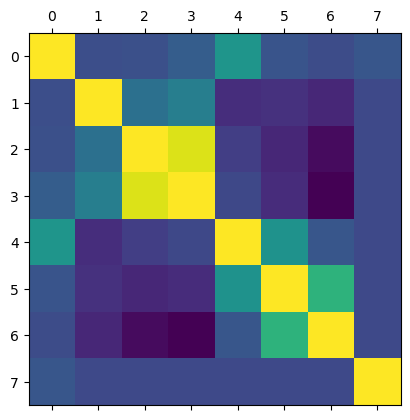

In [26]:
# Create correlation heatmap with matplotlib

gsearch_num_corrmat = plt.matshow(gsearch_num.corr())
plt.show()

In [27]:
# Export viz

gsearch_num_corrmat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_corrmat.png'))

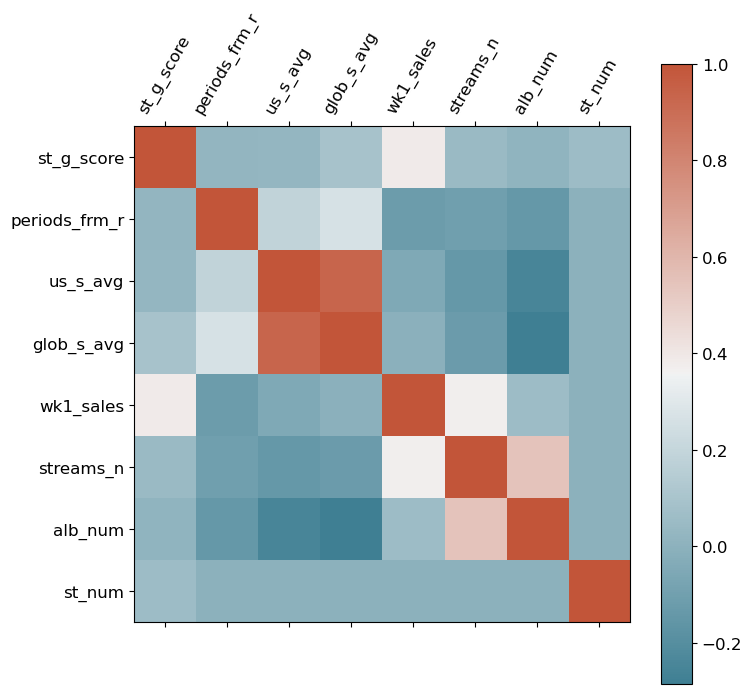

In [28]:
# Add formatting to and increase clarity of the matplotlib heatmap

f = plt.figure(figsize=(8, 8)) # figure size 

cmap = sns.diverging_palette(220, 20, as_cmap=True) # Set diverging color palette

heatmap_gsearch_num = plt.matshow(gsearch_num.corr(), fignum=f.number, cmap=cmap) 

plt.xticks(range(gsearch_num.shape[1]), gsearch_num.columns, fontsize=12, rotation=60) 
plt.yticks(range(gsearch_num.shape[1]), gsearch_num.columns, fontsize=12) 
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12) 

plt.show()

## Observations: 
There are some correlations, want to explore all variables from above except for st_num. Will reserve state/geographical exploration for future steps.

'st_g_score', 'periods_frm_r', 'us_g_avg', 'glob_s_avg', 'wk1_sales', 'streams_n', 'alb_num'


In [29]:
# Create a subset to focus on for seaborn correlation heatmap

sub_gsearch_plot = gsearch_num[['st_g_score', 'periods_frm_r', 'us_s_avg', 'glob_s_avg', 'wk1_sales', 'streams_n', 'alb_num']]

In [30]:
sub_gsearch_plot

st_g_score  periods_frm_r  us_s_avg  glob_s_avg  wk1_sales  streams_n  \
0              0             -2        69          69      39000     187127   
1              0             -2        69          69      39000     187127   
2              8             -2        69          69      39000     187127   
3             46             -2        69          69      39000     187127   
4              3             -2        69          69      39000     187127   
...          ...            ...       ...         ...        ...        ...   
3667          59              1        69          69    1359000  112484136   
3668          63              1        69          69    1359000  112484136   
3669          63              1        69          69    1359000  112484136   
3670          56              1        69          69    1359000  112484136   
3671          58              1        69          69    1359000  112484136   

      alb_num  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
3667       14  
3668       14  
3669       14  
3670       14  
3671       14  

[3672 rows x 7 columns]

<Axes: >

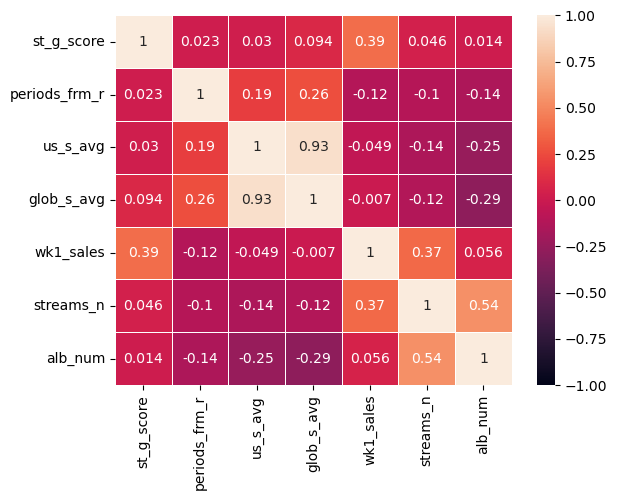

In [31]:
sns.heatmap(sub_gsearch_plot.corr(), annot=True, linewidth=.5, vmin=-1, vmax=1)

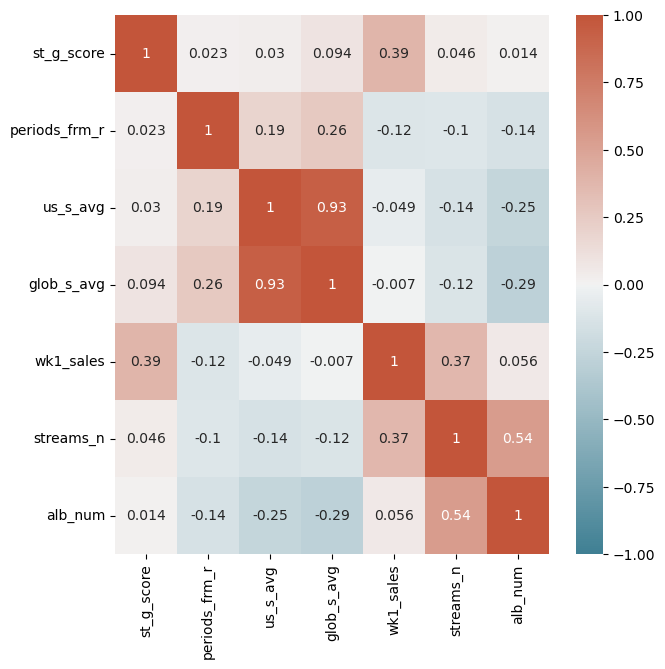

In [32]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 20, as_cmap=True) # Set diverging color palette

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
gsearch_corrmat= sns.heatmap(sub_gsearch_plot.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1, ax=ax) #add correlation coefficients onto the heatmap.



In [33]:
gsearch_corrmat= sns.heatmap(sub_gsearch_plot.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1, ax=ax) #add correlation coefficients onto the heatmap.

In [34]:
# Export figure

gsearch_corrmat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_corrmat.png'))

# Observations

Weak Positive: 
us_s_avg and periods_frm_r

Moderate Positive: 
st_g_score and wk1_sales, , wk1_sales and streams_n alb_num and both us and global s_avg

Strong Positive: glob_s_avg and us_s_avg, alb_num and streams_n

Weak Negative: periods_frm_r and us_s_avg, periods_frm_r and global_s_avg

Moderate Negative: us_s_avg and alb_num, glob_s_avg and alb_num, streams_n and us_s_avg

Strong Negative: 

Noteworthy lack of correlations: st_g_score and the us and global averages (based on how the values are created, this could just be because they measure different geographical zones and have different touch points)

-Want to save the streams_n and wk1_sales for the song information dataframe

# Scatterplots

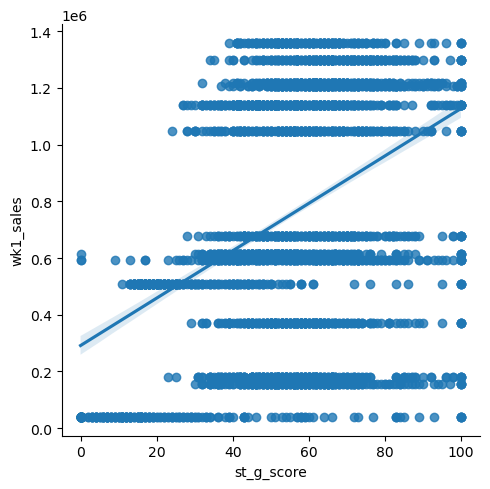

In [35]:
# Create scatterplot for the "st_g_score" and "wk1_sales"

gsearch_scatt_stg_sales = sns.lmplot(x = 'st_g_score', y = 'wk1_sales', data = sub_gsearch_plot)

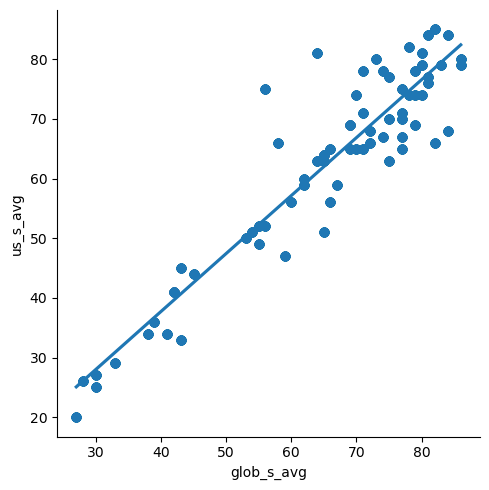

In [36]:
# Create scatterplot for the glob_s_avg and us_s_avg

gsearch_scatt_glob_us_avg = sns.lmplot(x = 'glob_s_avg', y = 'us_s_avg', data = sub_gsearch_plot)

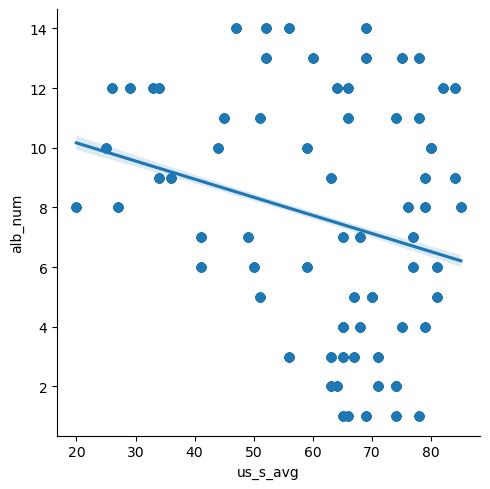

In [37]:
# Create scatterplot for the "glob_s_avg" and "alb_num" columns 

gsearch_scatt_us_avg_alb_num= sns.lmplot(x = 'us_s_avg', y = 'alb_num', data = sub_gsearch_plot)

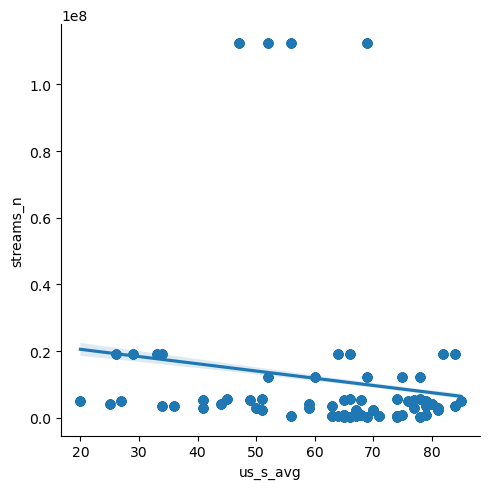

In [38]:
# Create scatterplot for the "us_s_avg" and "streams_n" columns 

gsearch_scatt_us_avg_streams_n = sns.lmplot(x = 'us_s_avg', y = 'streams_n', data = sub_gsearch_plot)

There are major outliers between the us_s_avg and total streams normalized

In [39]:
sub_gsearch_plot['streams_n'].value_counts(dropna=False)

streams_n
19032283     408
187127       255
630440       255
2204522      255
2989259      255
12195506     255
3584268      255
4000902      255
5119556      255
5217324      255
5588619      255
794044       255
473068       255
112484136    204
Name: count, dtype: int64

In [40]:
sub_gsearch_plot['streams_n'].describe()

count    3.672000e+03
mean     1.134886e+07
std      2.517557e+07
min      1.871270e+05
25%      7.940440e+05
50%      4.000902e+06
75%      5.588619e+06
max      1.124841e+08
Name: streams_n, dtype: float64

In [41]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre'],
      dtype='object')

In [42]:
# See if outliers are due to Taylor's Versions

gsearch_st.groupby('tv').agg({'streams_normal': ['mean']})

streams_normal
                           mean
tv                             
Taylor's Version   2.941377e+07
original           4.872760e+06

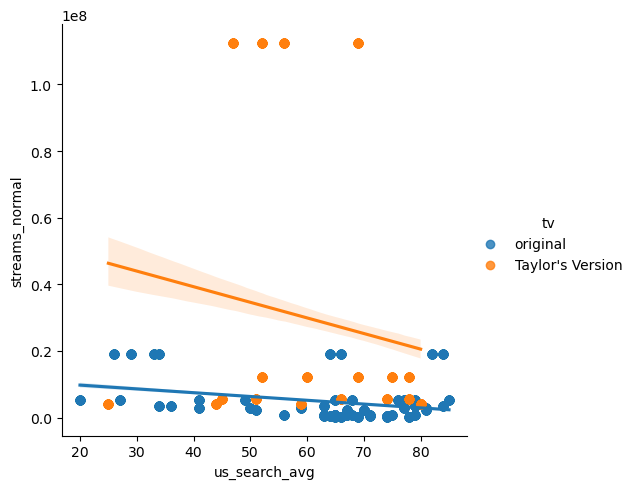

In [43]:
# Taylors version has much higher normalized streams
#Create scattplot from above but with the hue of taylor's version

# Create scatterplot for the "us_s_avg" and "streams_n" columns, hue taylor's version

us_avg_vs_streams_n_tv_hue = sns.lmplot(x = 'us_search_avg', y = 'streams_normal', hue= 'tv', data = gsearch_st)

All outliers from streams normalized are from Taylor's versions

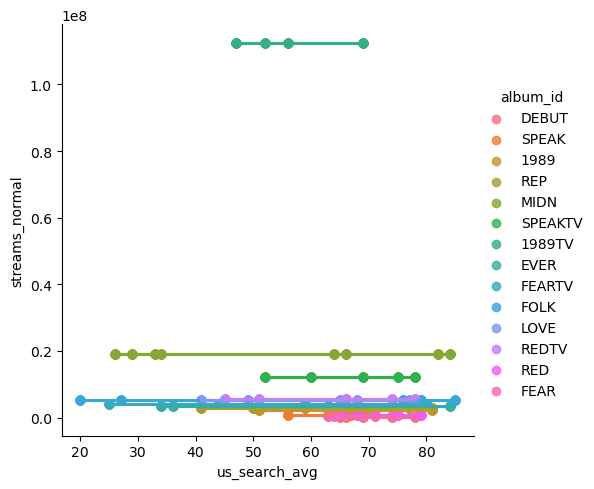

In [44]:
# Identify specific album outliers

# Create scatterplot for the "us_s_avg" and "streams_n" columns, hue album_id

us_avg_vs_streams_n_album_id_hue = sns.lmplot(x = 'us_search_avg', y = 'streams_normal', hue= 'album_id', data = gsearch_st)

1989 TV is the major outlier for streams_normal, with Midnights being the second biggest outlier (by much less). Both show little relationshp with us_search_avg.

## Observations gsearch

st_g_score and wk1_sales 0.39
Moderate correlation with clear groupings. Want to explore difference that TV makes and/or outliers in week_1 sales.

glob_s_avg and us_s_avg 0.93 
Strong positive correlation, implying that global and U.S. have similar googling patterns for Taylor Swift across time. 

alb_num and us_search avg -.25
Weak correlation with a lot of clusters. Want to explore impact of other variables and groupings on this relationship.

streams_n and us_s_avg -.25
Weak negative correlation with streams_n and us_avg- is it bad vs good googling? Based on the scatterplot, there appear to be major outliers. Are there variations between states? Which data points are the outliers? 

Interesting note that these relationships are not stronger:
periods_frm_r and us_s_avg 0.19, , periods_frm_r and global_s_avg 0.26

us_s_avg and alb_num -.25 abd glob_s_avg and alb_num -.29
These figures could hint that more recent albums are more popular for google

Unexpected NOTE! 
wk1_sales does not show correlation with and us.s.avg -0.049 and global_s_avg -.007. This is surprising since there is a correlation between state’s google scores and the wk1_sales. I am curious if certain states show stronger correlations.


alb_num and streams_n 0.54  (EXPLORE BELOW)
wk1_sales and streams_n 0.37  (explore below)
Will explore both of these relationships below in a separate df.


In [45]:
# Export plot

gsearch_scatt_stg_sales.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_scatt_stg_sales.png'))

In [46]:
# Export plot

gsearch_scatt_glob_us_avg.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_scatt_glob_us_avg.png'))

In [47]:
# Export plot

gsearch_scatt_us_avg_alb_num.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_scatt_us_avg_alb_num.png'))

In [48]:
# Export plot

gsearch_scatt_us_avg_streams_n.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_scatt_us_avg_streams_n.png'))

# Pair Plots

In [49]:
sub_gsearch_plot.columns

Index(['st_g_score', 'periods_frm_r', 'us_s_avg', 'glob_s_avg', 'wk1_sales',
       'streams_n', 'alb_num'],
      dtype='object')

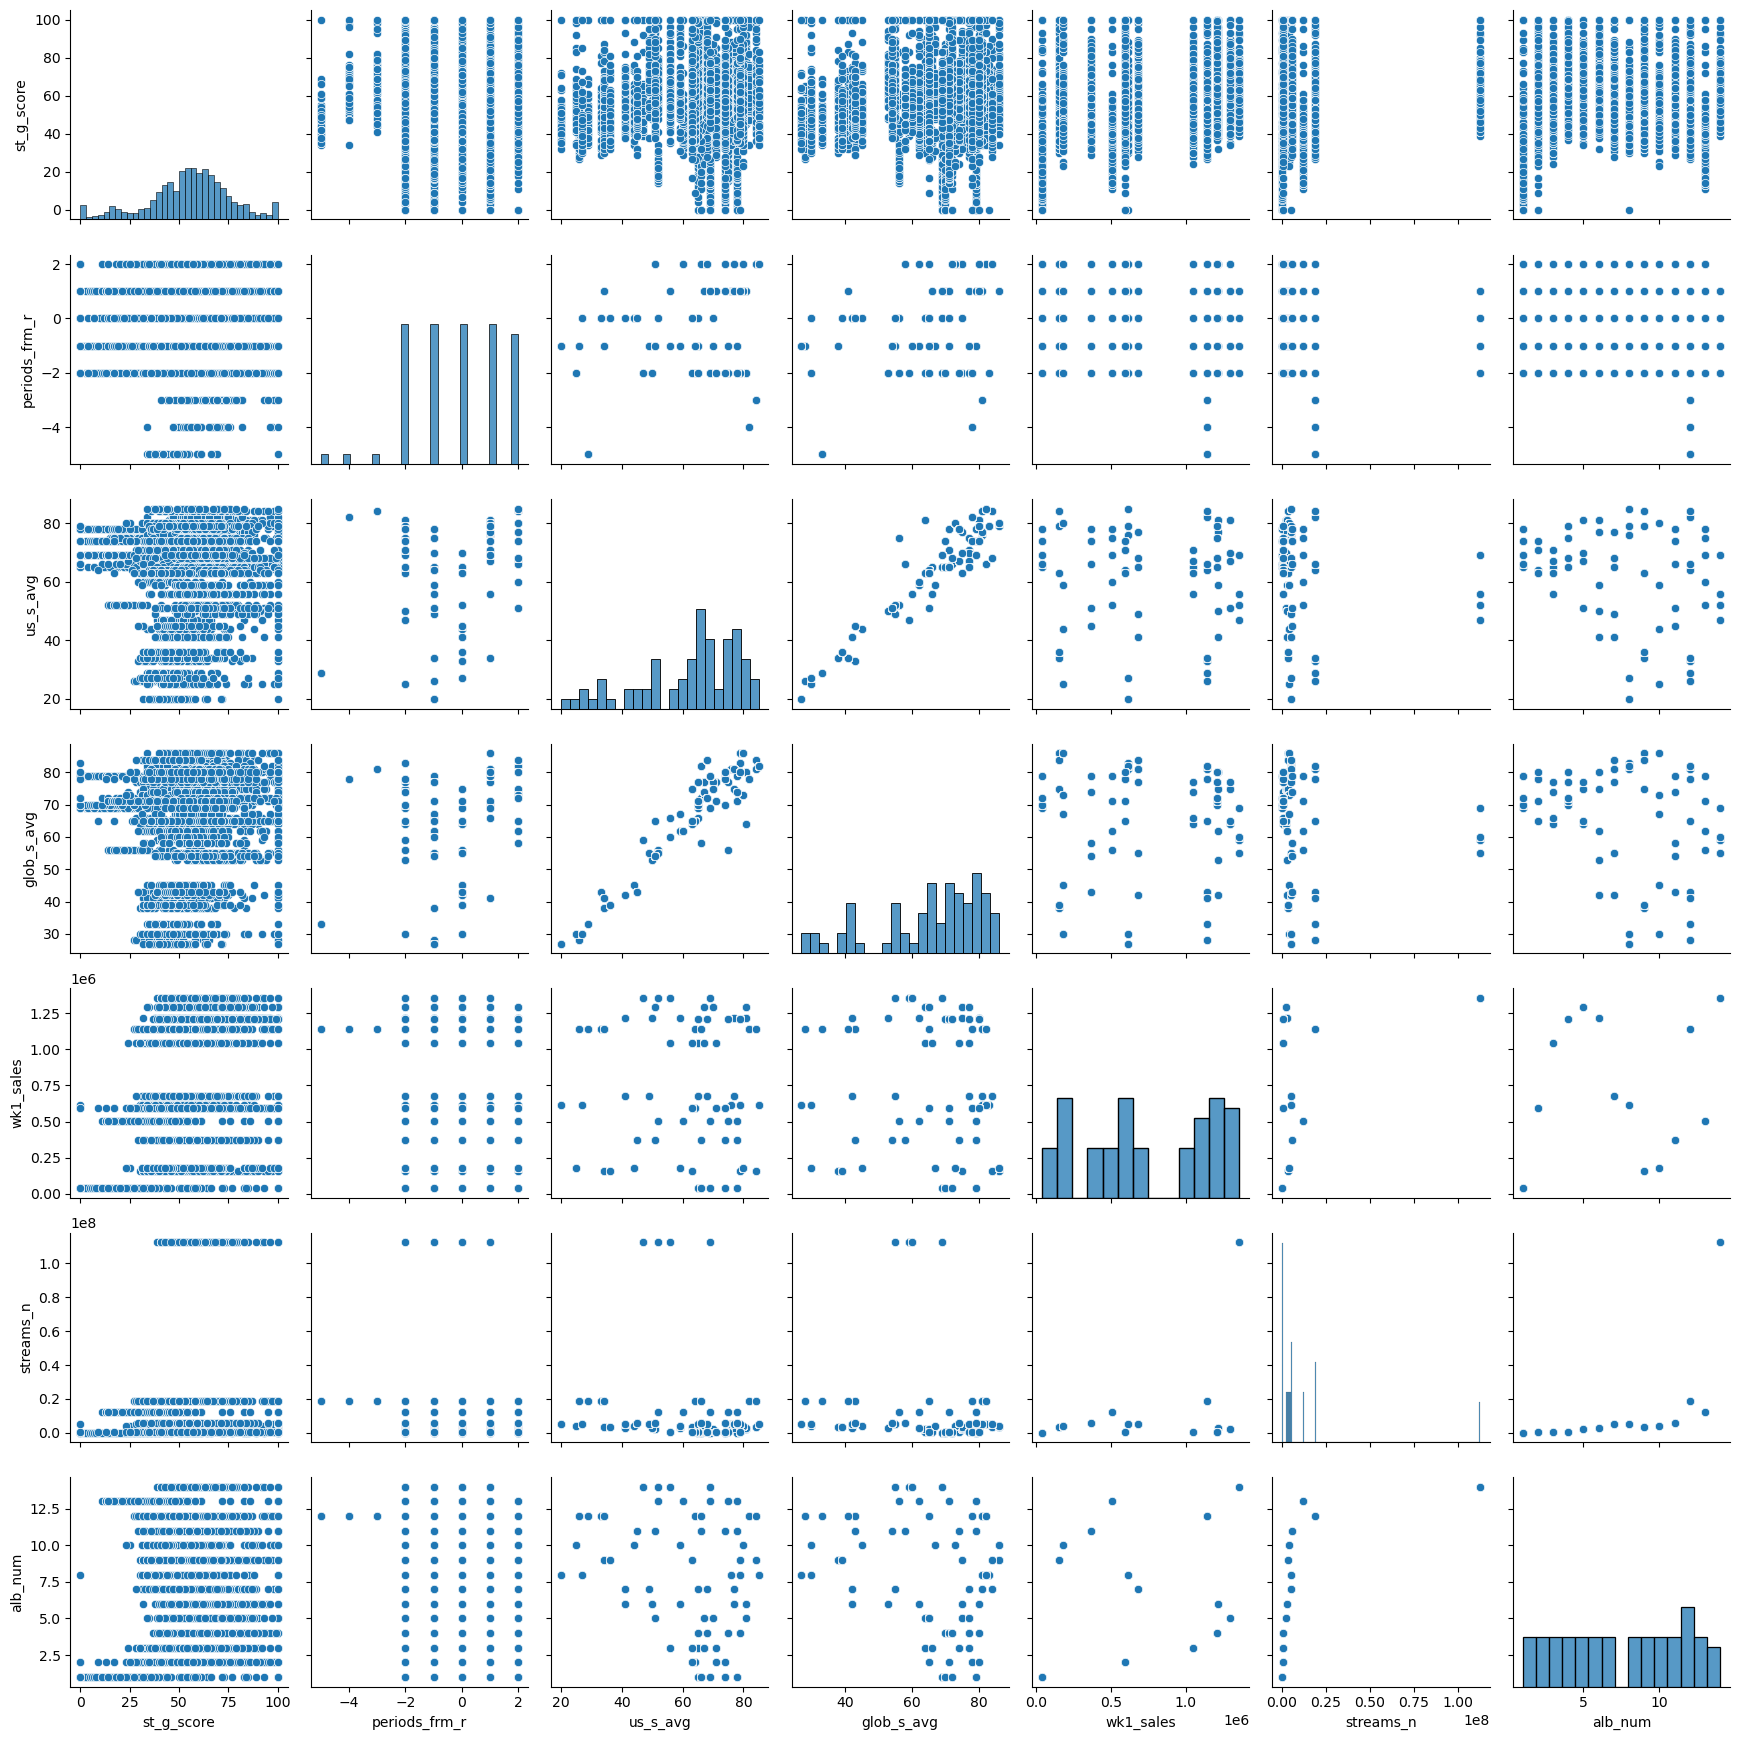

In [50]:
# Create pair plot

gsearch_pairplot = sns.pairplot(sub_gsearch_plot)
plt.tight_layout()

In [51]:
# Export viz

gsearch_pairplot.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_pairplot.png'))

# Categorical plot

## 'st_g_score' and 'wk1_sales'

<Axes: xlabel='st_g_score', ylabel='Count'>

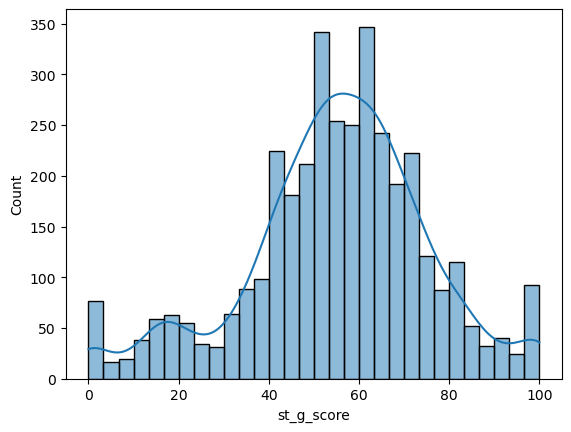

In [52]:
# Create histogram of variable to visualize distribution

sns.histplot(sub_gsearch_plot['st_g_score'],bins = 30, kde = True)


In [53]:
sub_gsearch_plot['st_g_score'].describe()

count    3672.000000
mean       54.990741
std        20.353841
min         0.000000
25%        44.000000
50%        56.000000
75%        67.000000
max       100.000000
Name: st_g_score, dtype: float64

In [54]:
# Apply flags based on categorical plot

sub_gsearch_plot.loc[sub_gsearch_plot['st_g_score'] < 45, 'search_pop_group'] = 'Low Search Score'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\764436485.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Search Score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sub_gsearch_plot.loc[sub_gsearch_plot['st_g_score'] < 45, 'search_pop_group'] = 'Low Search Score'


In [55]:
sub_gsearch_plot.loc[(sub_gsearch_plot['st_g_score'] >= 45) & (sub_gsearch_plot['st_g_score'] < 67 ), 'search_pop_group'] = 'Middle Search Score'

In [56]:
sub_gsearch_plot.loc[sub_gsearch_plot['st_g_score'] >= 67, 'search_pop_group'] = 'High Search Score'

In [57]:
sub_gsearch_plot['search_pop_group'].value_counts(dropna = False)

search_pop_group
Middle Search Score    1773
High Search Score       978
Low Search Score        921
Name: count, dtype: int64

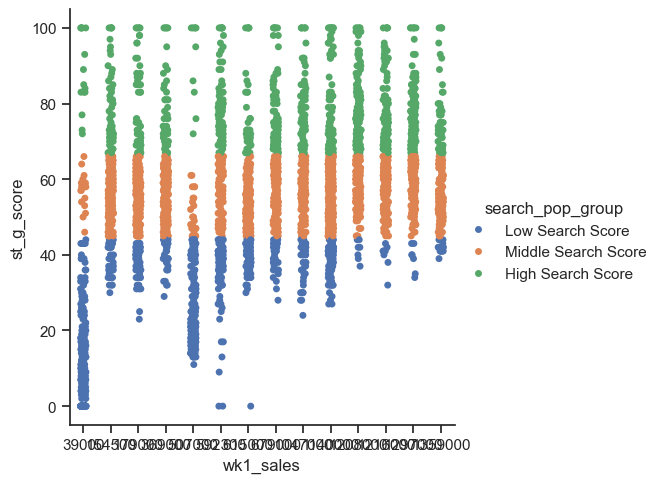

In [58]:
# Create Categorical Plot

sns.set(style = "ticks")
gsearch_catplot_st_score_wk1_sales = sns.catplot(x = 'wk1_sales', y = 'st_g_score', hue = 'search_pop_group', data = sub_gsearch_plot)


## Observations: The majority of low search scores have low wk1_sales and have a lot of variance, while middle search scores are more evenly distributed across st_g_scores. High search scores are skewed towards higher wk1_sales but do show less variation than low search scores.

In [59]:
# Save figure

gsearch_catplot_st_score_wk1_sales.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'gsearch_catplot_st_score_wk1_sales.png'))

In [60]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre'],
      dtype='object')

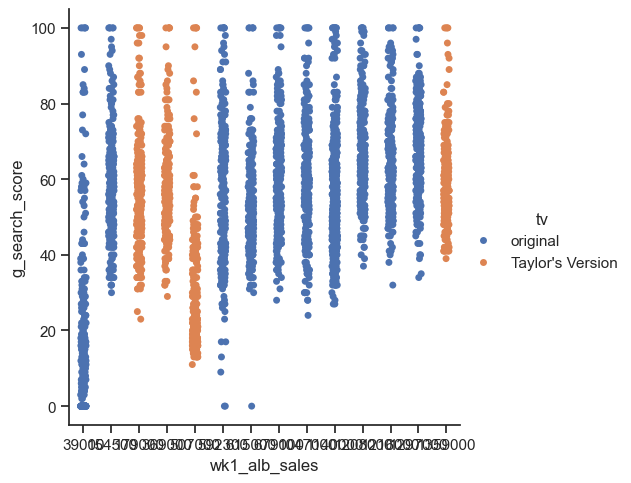

In [61]:
# Create another categorical chart checking for if Taylor's Version shows a pattern, using original df with all variables

# Create Categorical Plot

sns.set(style = "ticks")
gsearch_catplot_state_clust = sns.catplot(x = 'wk1_alb_sales', y = 'g_search_score', hue = 'tv', data = gsearch_st)


## Explore sub groups based on state averages/aggregates by state

## the g_search measure above crosses all states and multiple album periods. I

## want to create state specific search scores across albums as well as album specific average state google scores. 

I will conduct further geospatial analysis in the next task, but this is a start to exploring relationships between states, week_1_alb sales, album number/genre/id

In [62]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre'],
      dtype='object')

In [63]:
gsearch_st.dtypes

period_state            object
period                  object
period_start_date       object
state                   object
g_search_score           int64
album_event             object
album_id                object
album_release_date      object
album_release_day       object
periods_from_release     int64
us_search_avg            int64
us_peak_search          object
global_search_avg        int64
global_peak_search      object
wk1_alb_sales            int64
streams_normal           int64
alb_num                  int64
tv                      object
state_num                int64
alb_genre               object
dtype: object

In [64]:
state_goog_groups = gsearch_st.groupby('state')['g_search_score'].agg('mean')

In [65]:
state_goog_groups.astype(int).sort_values(ascending=False)

state
Rhode Island            79
Utah                    71
Massachusetts           70
District of Columbia    68
New Hampshire           67
Pennsylvania            63
Connecticut             63
Nebraska                62
Tennessee               62
Maine                   62
Kentucky                61
Minnesota               60
Vermont                 60
Kansas                  59
Ohio                    59
Indiana                 59
Missouri                57
Iowa                    57
Idaho                   57
North Dakota            57
West Virginia           56
Wisconsin               56
South Dakota            55
Michigan                55
Delaware                54
Colorado                54
Arkansas                54
Washington              53
New Jersey              53
North Carolina          52
South Carolina          52
Oklahoma                52
Alabama                 52
Illinois                52
Montana                 50
Arizona                 49
Oregon                

## Observations: There are regional differences across states in average google search score. 

Top 3 Highest Google Scores : Rhode Island, Utah, Massachusetts, District of Coluumbia, and New Hampshire

Bottom 5 Lowest Google Scores: Mississippi, New Mexico, Florida, Nevada, Hawaii


<Axes: ylabel='Frequency'>

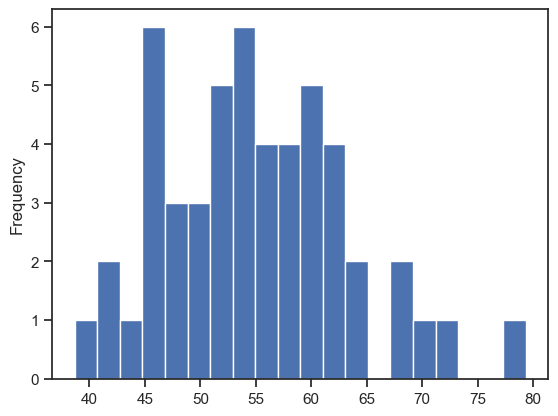

In [66]:
state_goog_groups.plot.hist(bins=20)

In [67]:
state_goog_groups.describe()

count    51.000000
mean     54.990741
std       8.387969
min      38.680556
25%      48.826389
50%      54.333333
75%      59.875000
max      79.333333
Name: g_search_score, dtype: float64

In [68]:
# Create new column in gsearch_st to list the average search score for states within each period.
# This allows for more data points and album specific data

gsearch_st['alb_group_st_search_avg'] = gsearch_st.groupby(['album_id'])['g_search_score'].transform(np.mean)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2141565100.py:4: FutureWarning: The provided callable <function mean at 0x0000014C1AAEA050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gsearch_st['alb_group_st_search_avg'] = gsearch_st.groupby(['album_id'])['g_search_score'].transform(np.mean)


In [69]:
gsearch_st['alb_group_st_search_avg'] = gsearch_st['alb_group_st_search_avg'].astype(int)

In [70]:
gsearch_st['alb_group_st_search_avg'].value_counts(dropna=False)

alb_group_st_search_avg
60    714
56    663
67    510
57    510
19    255
65    255
29    255
58    255
52    255
Name: count, dtype: int64

<Axes: xlabel='alb_group_st_search_avg', ylabel='wk1_alb_sales'>

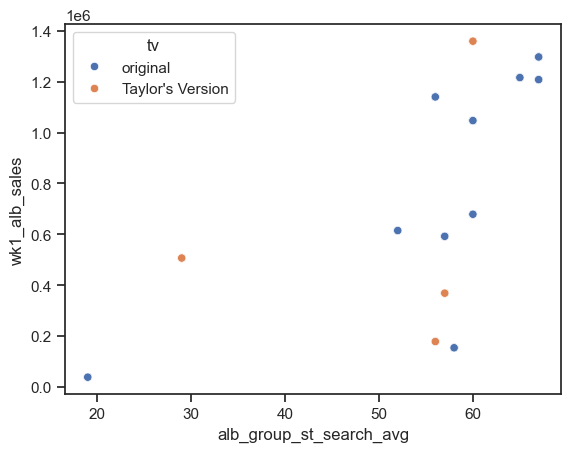

In [71]:
sns.scatterplot(x='alb_group_st_search_avg', y= 'wk1_alb_sales', hue='tv', data = gsearch_st)

## Observations: 
Original albums/versions have a more linear correlation to week 1 album sales and an albums’ state google search average than Taylor’s Versions. Taylor’s Versions are outliers to the correlation between these variables, while the main original version outlier is Debut. 

## See variations for each state across albums

In [72]:
states_search_across_albums = gsearch_st.groupby(['state', 'album_id', 'album_release_date', 'alb_num']).agg({'g_search_score': ['mean']})

In [73]:
states_search_across_albums

g_search_score
                                                      mean
state   album_id album_release_date alb_num               
Alabama 1989     2014-10-27         5                 67.6
        1989TV   2023-10-27         14                48.5
        DEBUT    2006-10-24         1                 21.6
        EVER     2020-12-11         9                 51.4
        FEAR     2008-11-11         2                 70.8
...                                                    ...
Wyoming RED      2012-10-22         4                 51.2
        REDTV    2021-11-12         11                52.8
        REP      2017-11-10         6                 47.6
        SPEAK    2010-10-25         3                 45.8
        SPEAKTV  2023-07-07         13                24.2

[714 rows x 1 columns]

Will add this aggregate as a column variable below.

## Exported as df to use for geo analysis

## Create new variable for each states overall average search score

In [74]:
# Create new column in gsearch_st to list the average search score for states across all albums and periods

gsearch_st['st_overall_search_avg'] = gsearch_st.groupby(['state'])['g_search_score'].transform(np.mean)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2398629456.py:3: FutureWarning: The provided callable <function mean at 0x0000014C1AAEA050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gsearch_st['st_overall_search_avg'] = gsearch_st.groupby(['state'])['g_search_score'].transform(np.mean)


In [75]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg'],
      dtype='object')

In [76]:
gsearch_st.head()

period_state                 period period_start_date  \
0     2006/09/28-2006/10/10, Alabama  2006/09/28-2006/10/10        2006-09-28   
1      2006/09/28-2006/10/10, Alaska  2006/09/28-2006/10/10        2006-09-28   
2     2006/09/28-2006/10/10, Arizona  2006/09/28-2006/10/10        2006-09-28   
3    2006/09/28-2006/10/10, Arkansas  2006/09/28-2006/10/10        2006-09-28   
4  2006/09/28-2006/10/10, California  2006/09/28-2006/10/10        2006-09-28   

        state  g_search_score album_event album_id album_release_date  \
0     Alabama               0       Debut    DEBUT         2006-10-24   
1      Alaska               0       Debut    DEBUT         2006-10-24   
2     Arizona               8       Debut    DEBUT         2006-10-24   
3    Arkansas              46       Debut    DEBUT         2006-10-24   
4  California               3       Debut    DEBUT         2006-10-24   

  album_release_day  periods_from_release  ...  global_search_avg  \
0           Tuesday                    -2  ...                 69   
1           Tuesday                    -2  ...                 69   
2           Tuesday                    -2  ...                 69   
3           Tuesday                    -2  ...                 69   
4           Tuesday                    -2  ...                 69   

  global_peak_search  wk1_alb_sales streams_normal  alb_num        tv  \
0         2006-10-07          39000         187127        1  original   
1         2006-10-07          39000         187127        1  original   
2         2006-10-07          39000         187127        1  original   
3         2006-10-07          39000         187127        1  original   
4         2006-10-07          39000         187127        1  original   

   state_num    alb_genre  alb_group_st_search_avg st_overall_search_avg  
0          1  Country pop                       19             52.500000  
1          2  Country pop                       19             46.416667  
2          3  Country pop                       19             49.250000  
3          4  Country pop                       19             54.291667  
4          5  Country pop                       19             46.541667  

[5 rows x 22 columns]

In [77]:
gsearch_st['st_overall_search_avg'] = gsearch_st['st_overall_search_avg'].astype(int)

In [78]:
gsearch_st.head(10)

period_state                 period  \
0               2006/09/28-2006/10/10, Alabama  2006/09/28-2006/10/10   
1                2006/09/28-2006/10/10, Alaska  2006/09/28-2006/10/10   
2               2006/09/28-2006/10/10, Arizona  2006/09/28-2006/10/10   
3              2006/09/28-2006/10/10, Arkansas  2006/09/28-2006/10/10   
4            2006/09/28-2006/10/10, California  2006/09/28-2006/10/10   
5              2006/09/28-2006/10/10, Colorado  2006/09/28-2006/10/10   
6           2006/09/28-2006/10/10, Connecticut  2006/09/28-2006/10/10   
7              2006/09/28-2006/10/10, Delaware  2006/09/28-2006/10/10   
8  2006/09/28-2006/10/10, District of Columbia  2006/09/28-2006/10/10   
9               2006/09/28-2006/10/10, Florida  2006/09/28-2006/10/10   

  period_start_date                 state  g_search_score album_event  \
0        2006-09-28               Alabama               0       Debut   
1        2006-09-28                Alaska               0       Debut   
2        2006-09-28               Arizona               8       Debut   
3        2006-09-28              Arkansas              46       Debut   
4        2006-09-28            California               3       Debut   
5        2006-09-28              Colorado               7       Debut   
6        2006-09-28           Connecticut               0       Debut   
7        2006-09-28              Delaware               0       Debut   
8        2006-09-28  District of Columbia               0       Debut   
9        2006-09-28               Florida               6       Debut   

  album_id album_release_date album_release_day  periods_from_release  ...  \
0    DEBUT         2006-10-24           Tuesday                    -2  ...   
1    DEBUT         2006-10-24           Tuesday                    -2  ...   
2    DEBUT         2006-10-24           Tuesday                    -2  ...   
3    DEBUT         2006-10-24           Tuesday                    -2  ...   
4    DEBUT         2006-10-24           Tuesday                    -2  ...   
5    DEBUT         2006-10-24           Tuesday                    -2  ...   
6    DEBUT         2006-10-24           Tuesday                    -2  ...   
7    DEBUT         2006-10-24           Tuesday                    -2  ...   
8    DEBUT         2006-10-24           Tuesday                    -2  ...   
9    DEBUT         2006-10-24           Tuesday                    -2  ...   

   global_search_avg global_peak_search  wk1_alb_sales streams_normal  \
0                 69         2006-10-07          39000         187127   
1                 69         2006-10-07          39000         187127   
2                 69         2006-10-07          39000         187127   
3                 69         2006-10-07          39000         187127   
4                 69         2006-10-07          39000         187127   
5                 69         2006-10-07          39000         187127   
6                 69         2006-10-07          39000         187127   
7                 69         2006-10-07          39000         187127   
8                 69         2006-10-07          39000         187127   
9                 69         2006-10-07          39000         187127   

   alb_num        tv  state_num    alb_genre  alb_group_st_search_avg  \
0        1  original          1  Country pop                       19   
1        1  original          2  Country pop                       19   
2        1  original          3  Country pop                       19   
3        1  original          4  Country pop                       19   
4        1  original          5  Country pop                       19   
5        1  original          6  Country pop                       19   
6        1  original          7  Country pop                       19   
7        1  original          8  Country pop                       19   
8        1  original          9  Country pop                       19   
9        1  original         10  

## Create new column for state average google search score

In [79]:
# Create new column that lists each states average search score for all the periods of each album- therefore specific to albums
# This will help show album preferences for each state (variations in average score all albums vs. album avg)

gsearch_st['st_group_alb_search_avg'] = gsearch_st.groupby(['state', 'album_id'])['g_search_score'].transform(np.mean)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\264984938.py:4: FutureWarning: The provided callable <function mean at 0x0000014C1AAEA050> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gsearch_st['st_group_alb_search_avg'] = gsearch_st.groupby(['state', 'album_id'])['g_search_score'].transform(np.mean)


In [80]:
gsearch_st['st_group_alb_search_avg'] = gsearch_st['st_group_alb_search_avg'].astype(int)

In [81]:
gsearch_st.head()

period_state                 period period_start_date  \
0     2006/09/28-2006/10/10, Alabama  2006/09/28-2006/10/10        2006-09-28   
1      2006/09/28-2006/10/10, Alaska  2006/09/28-2006/10/10        2006-09-28   
2     2006/09/28-2006/10/10, Arizona  2006/09/28-2006/10/10        2006-09-28   
3    2006/09/28-2006/10/10, Arkansas  2006/09/28-2006/10/10        2006-09-28   
4  2006/09/28-2006/10/10, California  2006/09/28-2006/10/10        2006-09-28   

        state  g_search_score album_event album_id album_release_date  \
0     Alabama               0       Debut    DEBUT         2006-10-24   
1      Alaska               0       Debut    DEBUT         2006-10-24   
2     Arizona               8       Debut    DEBUT         2006-10-24   
3    Arkansas              46       Debut    DEBUT         2006-10-24   
4  California               3       Debut    DEBUT         2006-10-24   

  album_release_day  periods_from_release  ...  global_peak_search  \
0           Tuesday                    -2  ...          2006-10-07   
1           Tuesday                    -2  ...          2006-10-07   
2           Tuesday                    -2  ...          2006-10-07   
3           Tuesday                    -2  ...          2006-10-07   
4           Tuesday                    -2  ...          2006-10-07   

  wk1_alb_sales  streams_normal alb_num        tv  state_num    alb_genre  \
0         39000          187127       1  original          1  Country pop   
1         39000          187127       1  original          2  Country pop   
2         39000          187127       1  original          3  Country pop   
3         39000          187127       1  original          4  Country pop   
4         39000          187127       1  original          5  Country pop   

  alb_group_st_search_avg  st_overall_search_avg st_group_alb_search_avg  
0                      19                     52                      21  
1                      19                     46                      16  
2                      19                     49                      15  
3                      19                     54                      30  
4                      19                     46                       6  

[5 rows x 23 columns]

In [82]:
# Check with example subset

check_state_averages_by_period = gsearch_st.loc[gsearch_st['state'] == "Rhode Island"]

In [83]:
check_state_averages_by_period

period_state                 period  \
39    2006/09/28-2006/10/10, Rhode Island  2006/09/28-2006/10/10   
90    2006/10/11-2006/10/23, Rhode Island  2006/10/11-2006/10/23   
141   2006/10/24-2006/11/05, Rhode Island  2006/10/24-2006/11/05   
192   2006/11/06-2006/11/18, Rhode Island  2006/11/06-2006/11/18   
243   2006/11/19-2006/12/01, Rhode Island  2006/11/19-2006/12/01   
...                                   ...                    ...   
3456  2008/10/29-2008/11/10, Rhode Island  2008/10/29-2008/11/10   
3507  2008/11/11-2008/11/23, Rhode Island  2008/11/11-2008/11/23   
3558  2008/11/24-2008/12/06, Rhode Island  2008/11/24-2008/12/06   
3609  2008/12/07-2008/12/19, Rhode Island  2008/12/07-2008/12/19   
3660  2023/11/08-2023/11/21, Rhode Island  2023/11/08-2023/11/21   

     period_start_date         state  g_search_score              album_event  \
39          2006-09-28  Rhode Island               0                    Debut   
90          2006-10-11  Rhode Island               0                    Debut   
141         2006-10-24  Rhode Island             100                    Debut   
192         2006-11-06  Rhode Island               0                    Debut   
243         2006-11-19  Rhode Island              72                    Debut   
...                ...           ...             ...                      ...   
3456        2008-10-29  Rhode Island              70                 Fearless   
3507        2008-11-11  Rhode Island              69                 Fearless   
3558        2008-11-24  Rhode Island              73                 Fearless   
3609        2008-12-07  Rhode Island              69                 Fearless   
3660        2023-11-09  Rhode Island              77  1989 (Taylor's Version)   

     album_id album_release_date album_release_day  periods_from_release  ...  \
39      DEBUT         2006-10-24           Tuesday                    -2  ...   
90      DEBUT         2006-10-24           Tuesday                    -1  ...   
141     DEBUT         2006-10-24           Tuesday                     0  ...   
192     DEBUT         2006-10-24           Tuesday                     1  ...   
243     DEBUT         2006-10-24           Tuesday                     2  ...   
...       ...                ...               ...                   ...  ...   
3456     FEAR         2008-11-11           Tuesday                    -1  ...   
3507     FEAR         2008-11-11           Tuesday                     0  ...   
3558     FEAR         2008-11-11           Tuesday                     1  ...   
3609     FEAR         2008-11-11           Tuesday                     2  ...   
3660   1989TV         2023-10-27            Friday                     1  ...   

      global_peak_search wk1_alb_sales  streams_normal alb_num  \
39            2006-10-07         39000          187127       1   
90            2006-10-23         39000          187127       1   
141           2006-10-29         39000          187127       1   
192           2006-11-07         39000          187127       1   
243           2006-11-26         39000          187127       1   
...                  ...           ...             ...     ...   
3456          2008-11-08        592300          473068       2   
3507          2008-11-13        592300          473068       2   
3558          2008-11-24        592300          473068       2   
3609          2008-12-07        592300          473068       2   
3660          2023-11-18       1359000       112484136      14   

                    tv  state_num              alb_genre  \
39            original         40            Country pop   
90            original         40            Country pop   
141           original         40            Country pop   
192           original         40            Country pop   
243           original         40            Country pop   
...                ...        ...                    ...   
3456          original         40            Country 

## Create boolean value for Taylor's version

In [84]:
gsearch_st['tv'].value_counts(dropna=False)

tv
original            2703
Taylor's Version     969
Name: count, dtype: int64

In [85]:
gsearch_st['tvflag'] = gsearch_st['tv'] == "Taylor's Version"

In [86]:
gsearch_st['tvflag'].value_counts(dropna=False)

tvflag
False    2703
True      969
Name: count, dtype: int64

In [87]:
gsearch_st.dtypes

period_state               object
period                     object
period_start_date          object
state                      object
g_search_score              int64
album_event                object
album_id                   object
album_release_date         object
album_release_day          object
periods_from_release        int64
us_search_avg               int64
us_peak_search             object
global_search_avg           int64
global_peak_search         object
wk1_alb_sales               int64
streams_normal              int64
alb_num                     int64
tv                         object
state_num                   int64
alb_genre                  object
alb_group_st_search_avg     int32
st_overall_search_avg       int32
st_group_alb_search_avg     int32
tvflag                       bool
dtype: object

## Complete another heatmap with added measures

In [88]:
gsearch_aggs = gsearch_st[['alb_num', 'tvflag',
                                    'wk1_alb_sales', 'streams_normal', 'alb_group_st_search_avg',
                                    'us_search_avg',
                                    'state_num',
                                    'st_overall_search_avg',
                                    'st_group_alb_search_avg']] 

In [89]:
gsearch_aggs.shape

(3672, 9)

In [90]:
gsearch_aggs.dtypes

alb_num                    int64
tvflag                      bool
wk1_alb_sales              int64
streams_normal             int64
alb_group_st_search_avg    int32
us_search_avg              int64
state_num                  int64
st_overall_search_avg      int32
st_group_alb_search_avg    int32
dtype: object

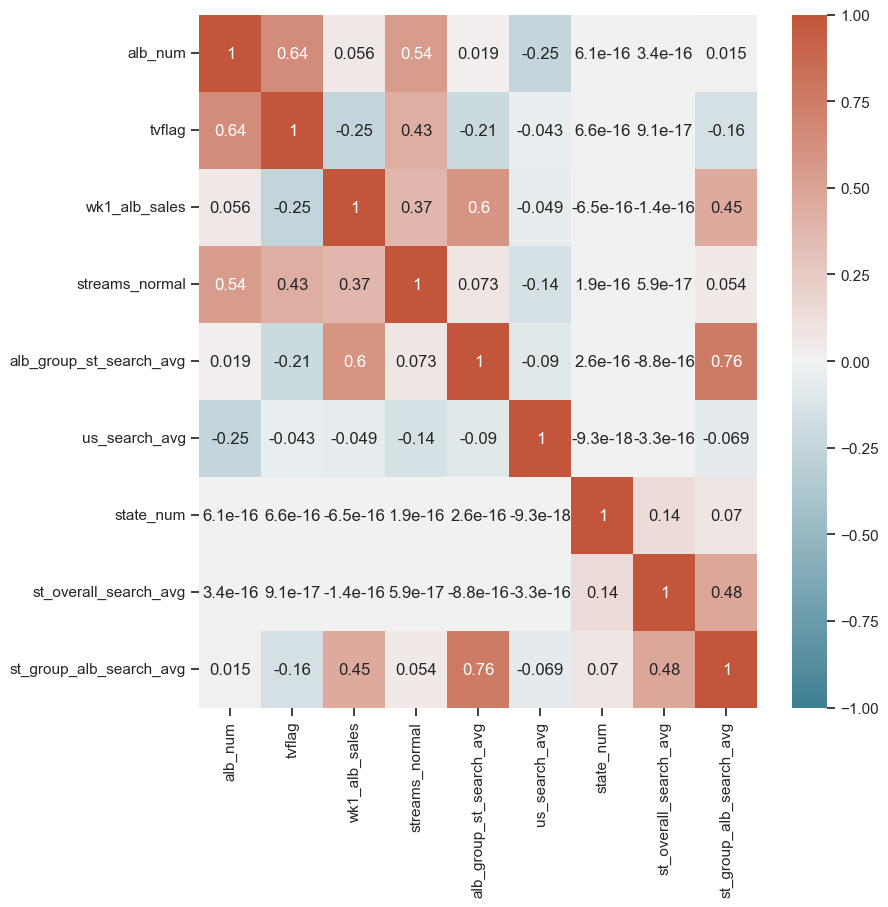

In [91]:
# Create a heatmap

f,ax = plt.subplots(figsize=(9, 9))

cmap = sns.diverging_palette(220, 20, as_cmap=True) # Set diverging color palette

gsearch_aggs_corrmat= sns.heatmap(gsearch_aggs.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1, ax=ax) 



In [92]:
# save fig 

gsearch_aggs_corrmat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'heatmap_gsearch_aggs.png'))

## Observations 
The state search average overall is not very handy because it is the same value for each state across all albums and periods, which is why I broke google search figures down by both state averages as well as album groups averages.  Google search figures more closely related to week one album sales rather than normalized Spotify streams.

I would like to focus on these relationships:
## wk1 alb sales and alb_group_st_search_avg 0.6
## wk1 album sales and st_group_alb_search_average .45


This relationship is also noteworthy:
wk1 alb sales and (state) gsearch_score 0.39
but is less precise since all of the album information repeats for each state google search score and only the periods shift. 


WHY SO LOW?: alb_group_st_search_avg and streams_normal 0.073
wk1 alb sales and streams_normal .37 (will explore in another df)


# Create scatterplots and cattplots

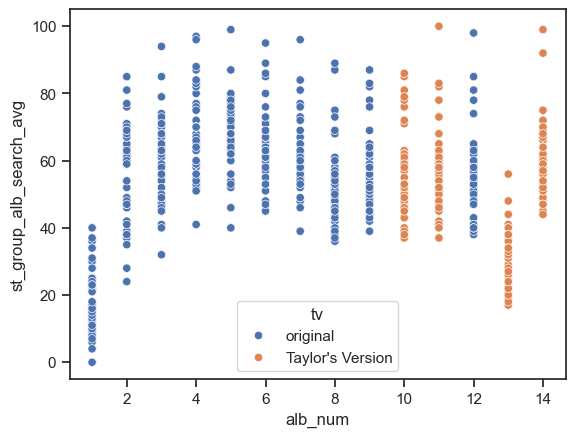

In [93]:
# View relationship with scatterplot 

gsearch_scatt_st_group_alb_avg  = sns.scatterplot(x='alb_num', y= 'st_group_alb_search_avg', hue='tv', data = gsearch_st)

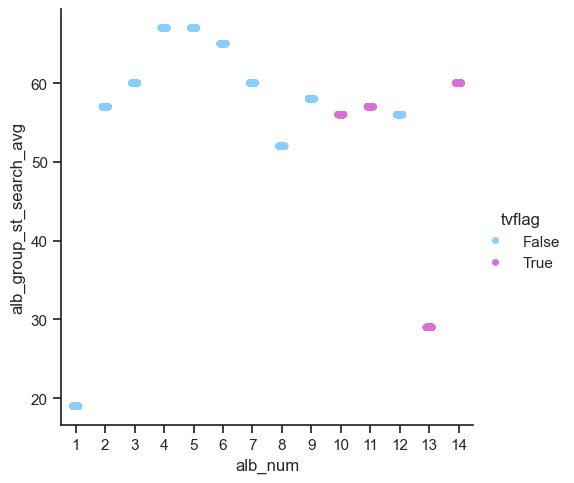

In [94]:
# Create a catplot for alb_num and alb_group_search_avg, with TV vs. OG

catplot_gsearch_alb_num_alb_group_st_search_avg = sns.catplot(x='alb_num', y='alb_group_st_search_avg', hue='tvflag', data=gsearch_aggs, palette=sns.color_palette(['lightskyblue', 'orchid']))

plt.show()

In [95]:
# Export viz

catplot_gsearch_alb_num_alb_group_st_search_avg.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_gsearch_alb_num_alb_group_st_search_avg.png'))

In [96]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag'],
      dtype='object')

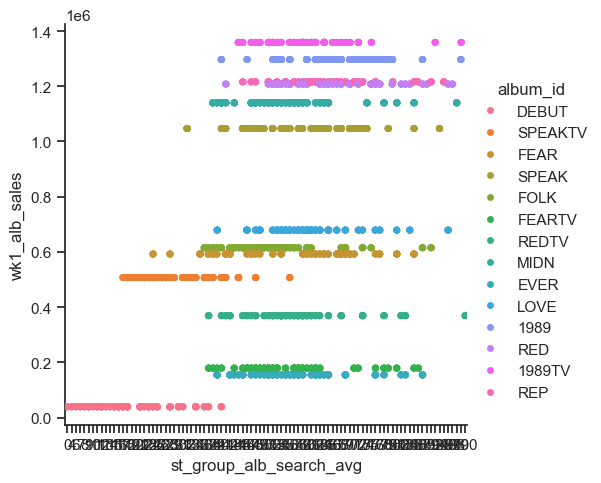

In [97]:
sns.catplot(x='st_group_alb_search_avg', y='wk1_alb_sales', hue='album_id', data=gsearch_st)

## Debut is a major outlier for wk1_sales and state's searches for each album, otherwise there are 4 main clusters. Curious about genres.

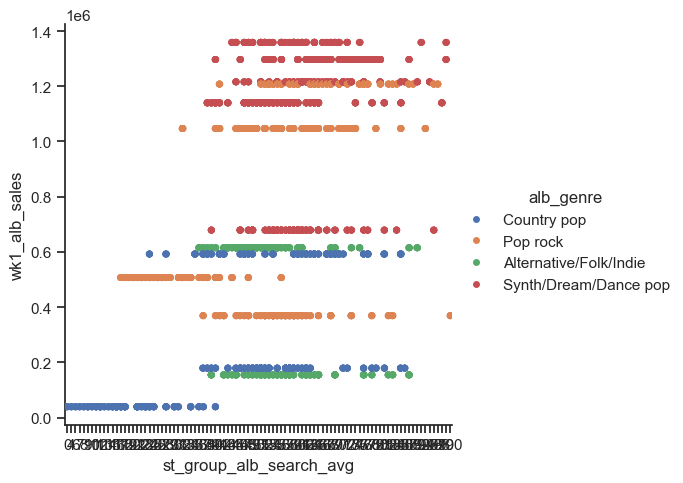

In [98]:
sns.catplot(x='st_group_alb_search_avg', y='wk1_alb_sales', hue='alb_genre', data=gsearch_st)

In [99]:
gsearch_st['st_group_alb_search_avg'].value_counts(dropna=False)

st_group_alb_search_avg
63     133
58     126
59     121
60     120
52     118
      ... 
100      5
97       5
88       5
33       5
92       4
Name: count, Length: 94, dtype: int64

In [100]:
gsearch_st['st_group_alb_search_avg'].describe()

count    3672.000000
mean       54.592865
std        17.296100
min         0.000000
25%        46.000000
50%        56.000000
75%        65.000000
max       100.000000
Name: st_group_alb_search_avg, dtype: float64

In [101]:
# Conver st_group_alb_search_avg to int

gsearch_st['st_group_alb_search_avg'] = gsearch_st['st_group_alb_search_avg'].astype(int)

<Axes: xlabel='st_group_alb_search_avg', ylabel='Count'>

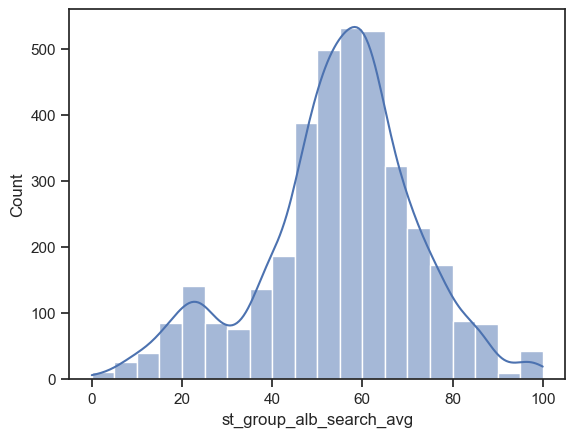

In [102]:
# Create a histogram to see the distribution of state search album averages

sns.histplot(gsearch_st['st_group_alb_search_avg'], bins=20, kde=True)

In [103]:
# Create a value grouping for st_search_alb_avg, which is each state's average search score for that album

gsearch_st.loc[gsearch_st['st_group_alb_search_avg'] < 51, 'state alb popularity group'] = 'Low search popularity'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\1125659850.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low search popularity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  gsearch_st.loc[gsearch_st['st_group_alb_search_avg'] < 51, 'state alb popularity group'] = 'Low search popularity'


In [104]:
gsearch_st.loc[(gsearch_st['st_group_alb_search_avg'] >= 51) & (gsearch_st['st_group_alb_search_avg'] < 64), 'state alb popularity group'] = 'Medium search popularity'

In [105]:
gsearch_st.loc[gsearch_st['st_group_alb_search_avg'] >= 64, 'state alb popularity group'] = 'High search popularity'

In [106]:
# Check for column add

gsearch_st['state alb popularity group'].value_counts(dropna=False)

state alb popularity group
Medium search popularity    1410
Low search popularity       1239
High search popularity      1023
Name: count, dtype: int64

In [107]:
# Check shape

gsearch_st.shape

(3672, 25)

In [108]:
gsearch_st['wk1_alb_sales'].value_counts(dropna=False)

wk1_alb_sales
1140000    408
39000      255
1047000    255
1297000    255
1216000    255
507000     255
154500     255
179000     255
615000     255
679000     255
369000     255
1208000    255
592300     255
1359000    204
Name: count, dtype: int64

Text(0.5, 1.02, 'State Search Averages by Album vs. Week 1 Album Sales')

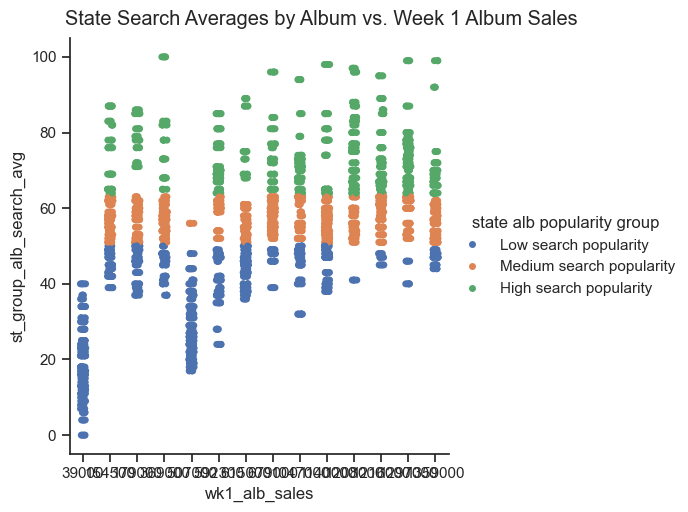

In [109]:
# Create a catplot of alb_st_search avg and streams_normal, with a hue based on state album popularity
# Corr coeff 0.45

cat_plot_st_alb_pop_group_wk1_sales = sns.catplot(x='wk1_alb_sales', y='st_group_alb_search_avg', hue='state alb popularity group', data=gsearch_st)

cat_plot_st_alb_pop_group_wk1_sales.fig.suptitle("State Search Averages by Album vs. Week 1 Album Sales", y=1.02)  



## Observations 
States with low search popularity are heavily skewed towards lower week 1 album sales. States with medium search popularity are more evenly distributed, while states with high search popularity are skewed towards high week 1 album sales. There is a cluster of outliers for state search averages less than 400,000.

In [110]:
# Export viz

cat_plot_st_alb_pop_group_wk1_sales.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_plot_st_alb_pop_group_wk1_sales.png'))

## Create value groupings for week 1 album sales and compare to album search groups

In [111]:
gsearch_st.columns

Index(['period_state', 'period', 'period_start_date', 'state',
       'g_search_score', 'album_event', 'album_id', 'album_release_date',
       'album_release_day', 'periods_from_release', 'us_search_avg',
       'us_peak_search', 'global_search_avg', 'global_peak_search',
       'wk1_alb_sales', 'streams_normal', 'alb_num', 'tv', 'state_num',
       'alb_genre', 'alb_group_st_search_avg', 'st_overall_search_avg',
       'st_group_alb_search_avg', 'tvflag', 'state alb popularity group'],
      dtype='object')

<Axes: ylabel='Frequency'>

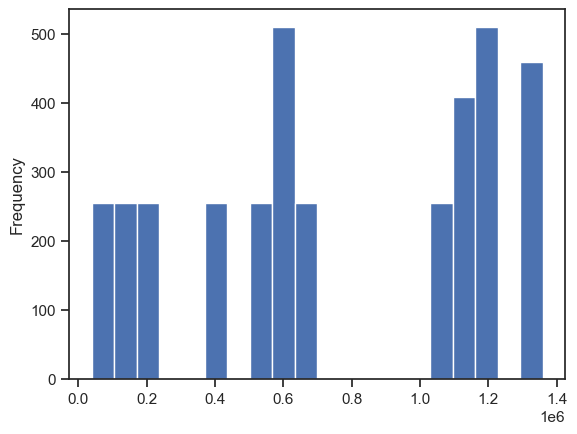

In [112]:
# Make value groupings based on week 1 sales (appears to be 3 groupings)

gsearch_st['wk1_alb_sales'].plot.hist(bins=20)

In [113]:
gsearch_st['wk1_alb_sales'].dtype

dtype('int64')

In [114]:
gsearch_st['wk1_alb_sales'].value_counts(dropna=False)

wk1_alb_sales
1140000    408
39000      255
1047000    255
1297000    255
1216000    255
507000     255
154500     255
179000     255
615000     255
679000     255
369000     255
1208000    255
592300     255
1359000    204
Name: count, dtype: int64

In [115]:
# Make flag for week 1 album sales group

gsearch_st.loc[gsearch_st['wk1_alb_sales'] <500000, 'sales_group'] = 'Low first week sales'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3693575826.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low first week sales' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  gsearch_st.loc[gsearch_st['wk1_alb_sales'] <500000, 'sales_group'] = 'Low first week sales'


In [116]:
gsearch_st.loc[(gsearch_st['wk1_alb_sales'] >=500000) & (gsearch_st['wk1_alb_sales'] <1000000), 'sales_group'] = 'Medium first week sales'

In [117]:
gsearch_st.loc[gsearch_st['wk1_alb_sales'] >=1000000, 'sales_group'] = 'High first week sales'

In [118]:
gsearch_st['sales_group'].value_counts(dropna=False)

sales_group
High first week sales      1632
Low first week sales       1020
Medium first week sales    1020
Name: count, dtype: int64

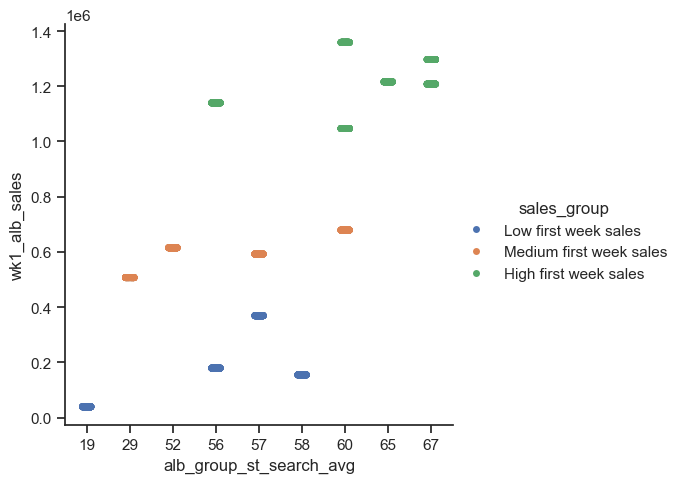

In [119]:
# Create a caplot using the week one sales groups and each album's state search average
# cor coef 0.6

sns.set(style = "ticks")
cat_plot_wk1_sales_alb_st_search_avg_sales_group = sns.catplot(x = 'alb_group_st_search_avg', y = 'wk1_alb_sales', hue = 'sales_group', data = gsearch_st)

## Observations:

There appears to be one major outlier for low sales and one major outlier for high sales. The medium first week sales have a weaker relationship between alb group state search average and week 1 album sales.

In [120]:
# save figure

cat_plot_wk1_sales_alb_st_search_avg_sales_group.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_plot_wk1_sales_alb_st_search_avg_sales_group.png'))

# 04. Prepare song_stream_alb df

Dataframe already cleaned, but reviewing df after wrangling and merges

## Review dataframe

In [121]:
song_stream_alb.shape

(285, 41)

In [122]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal', 'alb_track_cnt'],
      dtype='object')

In [123]:
song_stream_alb.head()

song_title  \
0         Welcome To New York (Taylor's Version)   
1                 Blank Space (Taylor's Version)   
2                       Style (Taylor's Version)   
3            Out Of The Woods (Taylor's Version)   
4  All You Had To Do Was Stay (Taylor's Version)   

                       album_title song_release_date  track_number  \
0  1989 (Taylor's Version)[Deluxe]        10/27/2023             1   
1  1989 (Taylor's Version)[Deluxe]        10/27/2023             2   
2  1989 (Taylor's Version)[Deluxe]        10/27/2023             3   
3  1989 (Taylor's Version)[Deluxe]        10/27/2023             4   
4  1989 (Taylor's Version)[Deluxe]        10/27/2023             5   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.009420         0.757   0.610          0.000037    0.3670    -4.840   
1      0.088500         0.733   0.733          0.000000    0.1680    -5.376   
2      0.000421         0.511   0.822          0.019700    0.0899    -4.785   
3      0.000537         0.545   0.885          0.000056    0.3850    -5.968   
4      0.000656         0.588   0.721          0.000000    0.1310    -5.579   

   ...  album_announce_yr  album_announce_date  album_release_mo  \
0  ...               2023           2023-08-09           October   
1  ...               2023           2023-08-09           October   
2  ...               2023           2023-08-09           October   
3  ...               2023           2023-08-09           October   
4  ...               2023           2023-08-09           October   

   album_release_day  album_release_year  album_release_date  \
0                 27                2023          2023-10-27   
1                 27                2023          2023-10-27   
2                 27                2023          2023-10-27   
3                 27                2023          2023-10-27   
4                 27                2023          2023-10-27   

  w1_trad_album_sales top_alb_count  top_alb_normal  alb_track_cnt  
0             1359000             1        0.076923             22  
1             1359000             1        0.076923             22  
2             1359000             1        0.076923             22  
3             1359000             1        0.076923             22  
4             1359000             1        0.076923             22  

[5 rows x 41 columns]

In [124]:
song_stream_alb.dtypes

song_title              object
album_title             object
song_release_date       object
track_number             int64
acousticness           float64
danceability           float64
energy                 float64
instrumentalness       float64
liveness               float64
loudness               float64
speechiness            float64
tempo                  float64
valence                float64
song_popularity          int64
duration_ms              int64
track_number_str         int64
album_id                object
song_id                 object
days_since_release       int64
tot_spot_plays_song      int64
track_length_secs        int64
last_stream_update      object
streams_normal           int64
top_song                object
top_song_flag             bool
top_song_value           int64
top_s_cnt                int64
tv                      object
alb_num                  int64
album_announce_mo       object
album_announce_day       int64
album_announce_yr        int64
album_an

In [125]:
song_stream_alb.drop(columns = ['track_number_str','track_length_secs', 'top_song_value'], axis=1, inplace=True)

In [126]:
# Rename columns whose names are too long, for purpose of correlations

song_stream_alb.rename(columns = {'track_number':'track', 
                                  'acousticness':'acou', 
                                  'danceability':'dance', 
                                  'energy':'ener',
                                  'instrumentalness': 'instru', 
                                  'liveness':'live', 
                                  'loudness': 'loud', 
                                  'speechiness':'speech', 
                                  'tempo':'temp',
                                   'valence':'val', 
                                  'song_popularity':'pop', 
                                  'duration_ms': 'dur', 
                                 'days_since_release':'days', 
                                  'tot_spot_plays_song':'tot_streams', 
                                   'streams_normal':'streams_n',
                                  'album_announce_day':'alb_ann_day', 
                                  'album_announce_yr':'alb_ann_yr', 
                                  'album_release_day': 'alb_r_day',
                                  'album_release_year': 'alb_r_yr', 
                                  'w1_trad_album_sales':'w1_sales'}, 
                        inplace=True)

# Add variables: Taylor's version column and create a flag for taylor's version


In [127]:
song_stream_alb['tv'].value_counts(dropna=False)

tv
original            185
Taylor's Version    100
Name: count, dtype: int64

In [128]:
song_stream_alb['tvflag'] = song_stream_alb['tv'] == "Taylor's Version"

In [129]:
song_stream_alb['tvflag'].value_counts(dropna=False)

tvflag
False    185
True     100
Name: count, dtype: int64

In [130]:
# Check for flag and new column variable

song_stream_alb.tail()

song_title album_title song_release_date  \
280                              Our Song       Debut        10/24/2006   
281         I'm Only Me When I'm With You       Debut        10/24/2006   
282                             Invisible       Debut        10/24/2006   
283                A Perfectly Good Heart       Debut        10/24/2006   
284  Teardrops on My Guitar - Pop Version       Debut        10/24/2006   

     track     acou  dance   ener    instru    live   loud  ...  \
280     11  0.11100  0.668  0.672  0.000000  0.3290 -4.931  ...   
281     12  0.00452  0.563  0.934  0.000807  0.1030 -3.629  ...   
282     13  0.63700  0.612  0.394  0.000000  0.1470 -5.723  ...   
283     14  0.00349  0.483  0.751  0.000000  0.1280 -5.726  ...   
284     15  0.04020  0.459  0.753  0.000000  0.0863 -3.827  ...   

     album_announce_date  album_release_mo  alb_r_day  alb_r_yr  \
280           2006-06-19           October         24      2006   
281           2006-06-19           October         24      2006   
282           2006-06-19           October         24      2006   
283           2006-06-19           October         24      2006   
284           2006-06-19           October         24      2006   

     album_release_date w1_sales top_alb_count  top_alb_normal  alb_track_cnt  \
280          2006-10-24    39000           284        0.045622             15   
281          2006-10-24    39000           284        0.045622             15   
282          2006-10-24    39000           284        0.045622             15   
283          2006-10-24    39000           284        0.045622             15   
284          2006-10-24    39000           284        0.045622             15   

    tvflag  
280  False  
281  False  
282  False  
283  False  
284  False  

[5 rows x 39 columns]

In [131]:
song_stream_alb.shape

(285, 39)

In [132]:
song_stream_alb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 284
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   song_title           285 non-null    object 
 1   album_title          285 non-null    object 
 2   song_release_date    285 non-null    object 
 3   track                285 non-null    int64  
 4   acou                 285 non-null    float64
 5   dance                285 non-null    float64
 6   ener                 285 non-null    float64
 7   instru               285 non-null    float64
 8   live                 285 non-null    float64
 9   loud                 285 non-null    float64
 10  speech               285 non-null    float64
 11  temp                 285 non-null    float64
 12  val                  285 non-null    float64
 13  pop                  285 non-null    int64  
 14  dur                  285 non-null    int64  
 15  album_id             285 non-null    object 


## Check for missing values 

In [133]:

song_stream_alb.isnull().sum() #none found

song_title             0
album_title            0
song_release_date      0
track                  0
acou                   0
dance                  0
ener                   0
instru                 0
live                   0
loud                   0
speech                 0
temp                   0
val                    0
pop                    0
dur                    0
album_id               0
song_id                0
days                   0
tot_streams            0
last_stream_update     0
streams_n              0
top_song               0
top_song_flag          0
top_s_cnt              0
tv                     0
alb_num                0
album_announce_mo      0
alb_ann_day            0
alb_ann_yr             0
album_announce_date    0
album_release_mo       0
alb_r_day              0
alb_r_yr               0
album_release_date     0
w1_sales               0
top_alb_count          0
top_alb_normal         0
alb_track_cnt          0
tvflag                 0
dtype: int64

## Check for duplicates

In [134]:
# Check for duplicates 

song_stream_alb_dups = song_stream_alb[song_stream_alb.duplicated()]

In [135]:
song_stream_alb_dups.shape #none found

(0, 39)

## Mixed data types

In [136]:
# check for mixed type data

for col in song_stream_alb.columns.tolist():
      weird = (song_stream_alb[[col]].applymap(type) != song_stream_alb[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (song_stream_alb[weird]) > 0:
        print (col)
        


C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2448106372.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (song_stream_alb[[col]].applymap(type) != song_stream_alb[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2448106372.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (song_stream_alb[[col]].applymap(type) != song_stream_alb[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2448106372.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (song_stream_alb[[col]].applymap(type) != song_stream_alb[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2448106372.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (song_stream_alb[[col]].applymap(type) != song_stream_alb[[col]]

Dataframe cleaned and ready for exploring

# 05. Exploring Relationships: song_stream_alb
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots
        Suggested next steps

In [137]:
song_stream_alb.shape

(285, 39)

In [138]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag'],
      dtype='object')

## Correlations

In [139]:
#Isolate numerical variables

song_stream_alb_num = song_stream_alb.select_dtypes(include='number')

In [140]:
song_stream_alb_num.columns

Index(['track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud', 'speech',
       'temp', 'val', 'pop', 'dur', 'days', 'tot_streams', 'streams_n',
       'top_s_cnt', 'alb_num', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr', 'w1_sales', 'top_alb_count', 'top_alb_normal',
       'alb_track_cnt'],
      dtype='object')

In [141]:
#create subset that includes all numerical plus taylor's version and top song booleans
song_stream_alb_corr = song_stream_alb[['tvflag','top_song_flag', 'track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud', 'speech',
       'temp', 'val', 'pop', 'dur', 'days', 'tot_streams', 'streams_n',
       'top_s_cnt', 'alb_num', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr', 'w1_sales', 'top_alb_count', 'top_alb_normal',
       'alb_track_cnt']]

In [142]:
song_stream_alb_corr.corr()

tvflag  top_song_flag     track      acou     dance  \
tvflag          1.000000       0.025584  0.239018 -0.256095 -0.100658   
top_song_flag   0.025584       1.000000 -0.299657 -0.102406  0.059821   
track           0.239018      -0.299657  1.000000  0.162762 -0.037213   
acou           -0.256095      -0.102406  0.162762  1.000000 -0.115169   
dance          -0.100658       0.059821 -0.037213 -0.115169  1.000000   
ener            0.179913       0.115097 -0.103154 -0.697194  0.030465   
instru         -0.076304       0.063592 -0.040061  0.157630 -0.069636   
live           -0.024133      -0.101427  0.003717 -0.070554 -0.003571   
loud            0.233515       0.079853 -0.181543 -0.709854 -0.044975   
speech         -0.141411      -0.064009  0.036444  0.123597  0.187526   
temp            0.080755      -0.069040  0.055894 -0.094232 -0.271033   
val             0.040930       0.111510 -0.063633 -0.175339  0.322925   
pop             0.417745       0.181163 -0.079275 -0.014763  0.038456   
dur             0.213031      -0.010551  0.107374  0.028629 -0.298578   
days           -0.603461      -0.163892 -0.149398 -0.125539 -0.011085   
tot_streams    -0.295513       0.225989 -0.343689 -0.029559  0.096125   
streams_n       0.199539       0.126199 -0.024242 -0.078871  0.017191   
top_s_cnt       0.713402       0.192939  0.175419  0.033988 -0.011175   
alb_num         0.713402       0.192939  0.175419  0.033988 -0.011175   
alb_ann_day    -0.377649      -0.075695 -0.029585  0.138237  0.131404   
alb_ann_yr      0.612328       0.159357  0.148719  0.122879  0.007232   
alb_r_day      -0.376141       0.172318 -0.091221  0.039577  0.111263   
alb_r_yr        0.612328       0.159357  0.148719  0.122879  0.007232   
w1_sales       -0.284692       0.121111 -0.051742 -0.166198  0.288104   
top_alb_count  -0.629796      -0.237102 -0.164930  0.007816  0.088747   
top_alb_normal  0.224279      -0.000072  0.114069  0.255446  0.017810   
alb_track_cnt   0.737248       0.012296  0.324203 -0.215184 -0.036442   

                    ener    instru      live      loud    speech  ...  \
tvflag          0.179913 -0.076304 -0.024133  0.233515 -0.141411  ...   
top_song_flag   0.115097  0.063592 -0.101427  0.079853 -0.064009  ...   
track          -0.103154 -0.040061  0.003717 -0.181543  0.036444  ...   
acou           -0.697194  0.157630 -0.070554 -0.709854  0.123597  ...   
dance           0.030465 -0.069636 -0.003571 -0.044975  0.187526  ...   
ener            1.000000 -0.071019  0.088522  0.781243 -0.153323  ...   
instru         -0.071019  1.000000 -0.040378 -0.179001 -0.022708  ...   
live            0.088522 -0.040378  1.000000  0.083696  0.263374  ...   
loud            0.781243 -0.179001  0.083696  1.000000 -0.355841  ...   
speech         -0.153323 -0.022708  0.263374 -0.355841  1.000000  ...   
temp            0.148677 -0.004415 -0.012126  0.111320 -0.001050  ...   
val             0.467342 -0.055276 -0.060420  0.304661  0.087632  ...   
pop             0.053140  0.001122 -0.103059 -0.046836  0.018712  ...   
dur            -0.111259 -0.030318 -0.126142  0.093525 -0.349132  ...   
days            0.112890 -0.067084  0.084410  0.263770 -0.040494  ...   
tot_streams     0.034232 -0.002821 -0.073593 -0.014524  0.054268  ...   
streams_n       0.037669 -0.007492 -0.033771 -0.028023 -0.004662  ...   
top_s_cnt      -0.048338  0.059882 -0.055187 -0.167885 -0.002744  ...   
alb_num        -0.048338  0.059882 -0.055187 -0.167885 -0.002744  ...   
alb_ann_day    -0.247246  0.054186  0.018408 -0.409935  0.167521  ...   
alb_ann_yr     -0.109767  0.063741 -0.085282 -0.256514  0.037413  ...   
alb_r_day      -0.051086 -0.004600  0.009553 -0.130741  0.011210  ...   
alb_r_yr       -0.109767  0.063741 -0.085282 -0.256514  0.037413  ...   
w1_sales        0.010484 -0.011160  0.110343 -0.143671  0.211833  ...   
top_alb_count   0.018555 -0.050987  0.103557  0.007274  0.233394  ...   
top_alb_normal -0.191473  0.065638 -0.010514 -0.331459  0.173789  ...   
al

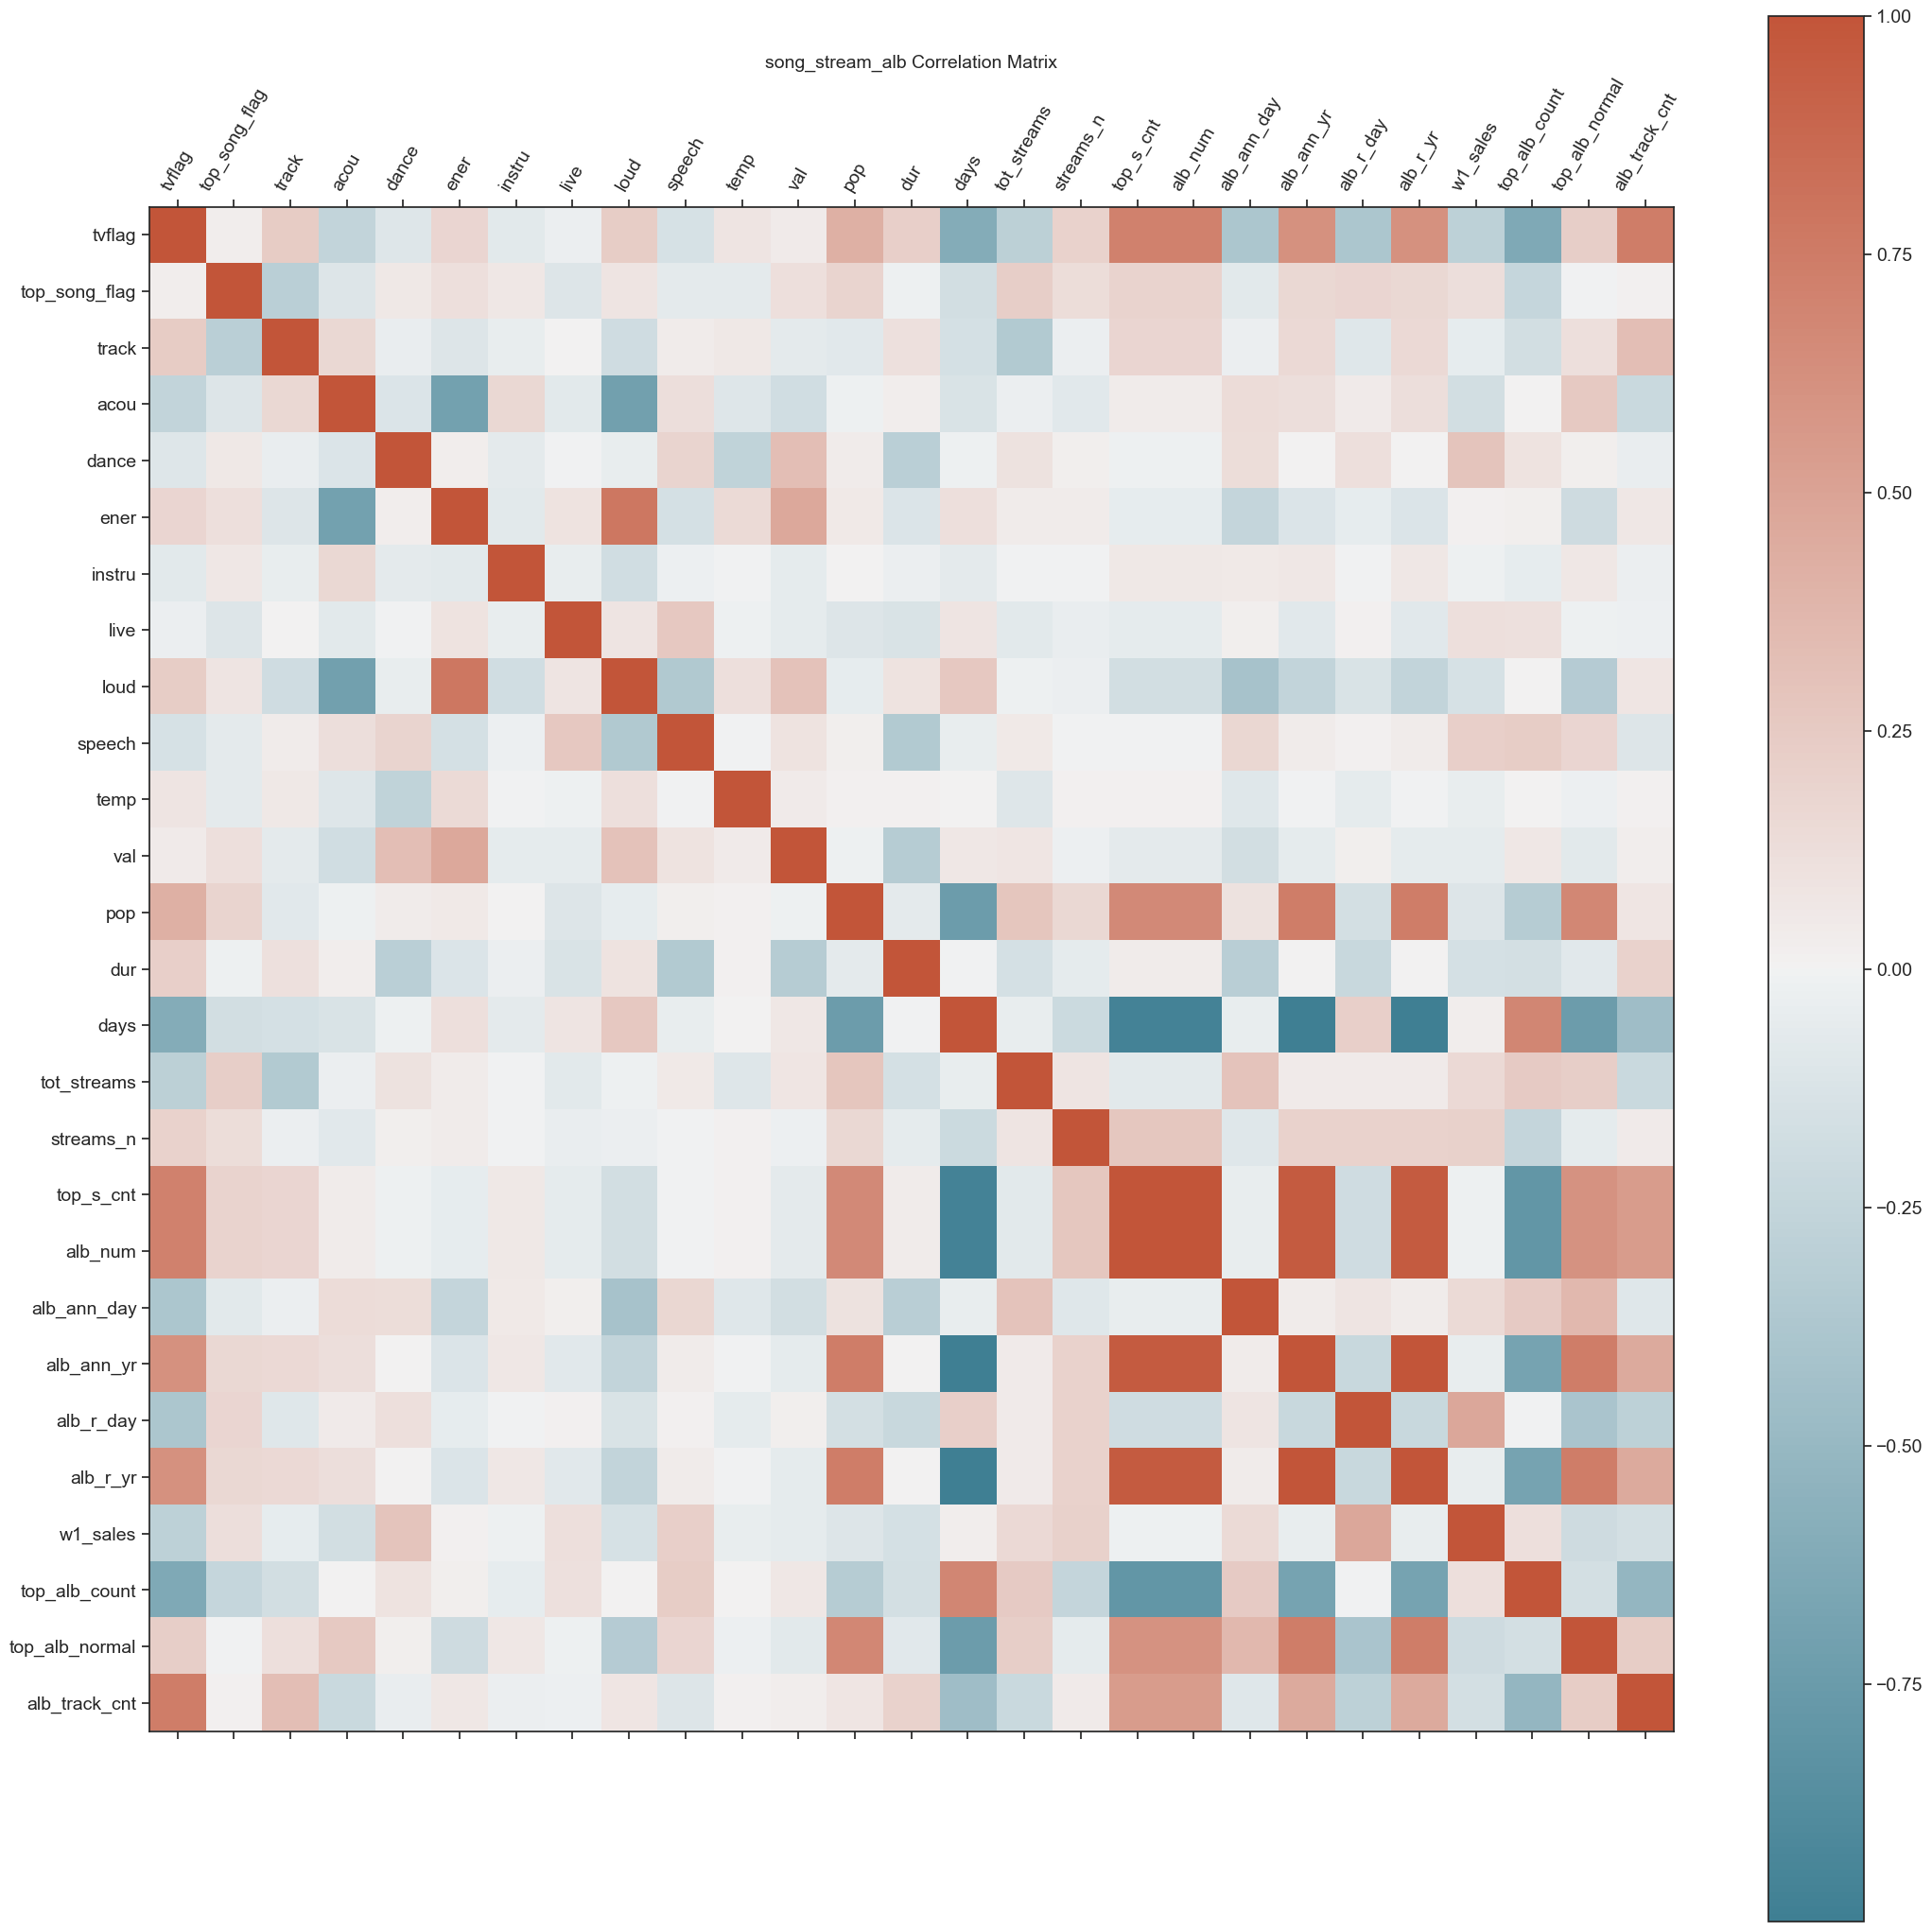

In [143]:
# Make heatmap with matplot

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

f = plt.figure(figsize=(26, 26)) 
plt.matshow(song_stream_alb_corr.corr(), fignum=f.number, cmap=cmap) 
plt.xticks(range(song_stream_alb_corr.shape[1]), song_stream_alb_corr.columns, fontsize=14, rotation=60) # x axis labels
plt.yticks(range(song_stream_alb_corr.shape[1]), song_stream_alb_corr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14) 
plt.title('song_stream_alb Correlation Matrix', fontsize=14)

plt.savefig("song_stream_alb.corr.png") 

plt.show()

## Create correlation heatmap using seaborn

In [144]:
song_stream_alb_corr.columns

Index(['tvflag', 'top_song_flag', 'track', 'acou', 'dance', 'ener', 'instru',
       'live', 'loud', 'speech', 'temp', 'val', 'pop', 'dur', 'days',
       'tot_streams', 'streams_n', 'top_s_cnt', 'alb_num', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt'],
      dtype='object')

In [145]:
# song information subset with bth flags

song_info = song_stream_alb_corr[['tvflag','top_song_flag', 'streams_n', 'tot_streams','pop','w1_sales','track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud', 'speech',
       'temp', 'val', 'dur', 'days', 'top_s_cnt']]

In [146]:
song_info

tvflag  top_song_flag  streams_n  tot_streams  pop  w1_sales  track  \
0      True           True    2732439     35521714   80   1359000      1   
1      True           True    3150620     40958068   80   1359000      2   
2      True           True    3668238     47687102   81   1359000      3   
3      True           True    2888086     37545128   80   1359000      4   
4      True           True    2385271     31008534   79   1359000      5   
..      ...            ...        ...          ...  ...       ...    ...   
280   False           True      45070    280561783   77     39000     11   
281   False          False       6928     43132276   62     39000     12   
282   False          False       4768     29681361   58     39000     13   
283   False          False       3432     21365584   57     39000     14   
284   False          False       4534     28224285   57     39000     15   

         acou  dance   ener    instru    live   loud  speech     temp    val  \
0    0.009420  0.757  0.610  0.000037  0.3670 -4.840  0.0327  116.998  0.685   
1    0.088500  0.733  0.733  0.000000  0.1680 -5.376  0.0670   96.057  0.701   
2    0.000421  0.511  0.822  0.019700  0.0899 -4.785  0.0397   94.868  0.305   
3    0.000537  0.545  0.885  0.000056  0.3850 -5.968  0.0447   92.021  0.206   
4    0.000656  0.588  0.721  0.000000  0.1310 -5.579  0.0317   96.997  0.520   
..        ...    ...    ...       ...     ...    ...     ...      ...    ...   
280  0.111000  0.668  0.672  0.000000  0.3290 -4.931  0.0303   89.011  0.539   
281  0.004520  0.563  0.934  0.000807  0.1030 -3.629  0.0646  143.964  0.518   
282  0.637000  0.612  0.394  0.000000  0.1470 -5.723  0.0243   96.001  0.233   
283  0.003490  0.483  0.751  0.000000  0.1280 -5.726  0.0365  156.092  0.268   
284  0.040200  0.459  0.753  0.000000  0.0863 -3.827  0.0537  199.997  0.483   

        dur  days  top_s_cnt  
0    212600    13         14  
1    231833    13         14  
2    231000    13         14  
3    235800    13         14  
4    193289    13         14  
..      ...   ...        ...  
280  201106  6225          1  
281  213053  6225          1  
282  203226  6225          1  
283  220146  6225          1  
284  179066  6225          1  

[285 rows x 19 columns]

In [147]:
song_info.corr()

tvflag  top_song_flag  streams_n  tot_streams       pop  \
tvflag         1.000000       0.025584   0.199539    -0.295513  0.417745   
top_song_flag  0.025584       1.000000   0.126199     0.225989  0.181163   
streams_n      0.199539       0.126199   1.000000     0.085093  0.161880   
tot_streams   -0.295513       0.225989   0.085093     1.000000  0.277045   
pop            0.417745       0.181163   0.161880     0.277045  1.000000   
w1_sales      -0.284692       0.121111   0.207476     0.149814 -0.107003   
track          0.239018      -0.299657  -0.024242    -0.343689 -0.079275   
acou          -0.256095      -0.102406  -0.078871    -0.029559 -0.014763   
dance         -0.100658       0.059821   0.017191     0.096125  0.038456   
ener           0.179913       0.115097   0.037669     0.034232  0.053140   
instru        -0.076304       0.063592  -0.007492    -0.002821  0.001122   
live          -0.024133      -0.101427  -0.033771    -0.073593 -0.103059   
loud           0.233515       0.079853  -0.028023    -0.014524 -0.046836   
speech        -0.141411      -0.064009  -0.004662     0.054268  0.018712   
temp           0.080755      -0.069040   0.015827    -0.098651  0.014652   
val            0.040930       0.111510  -0.017413     0.075659 -0.007948   
dur            0.213031      -0.010551  -0.060617    -0.152814 -0.065471   
days          -0.603461      -0.163892  -0.204315    -0.040420 -0.734954   
top_s_cnt      0.713402       0.192939   0.266742    -0.076175  0.658188   

               w1_sales     track      acou     dance      ener    instru  \
tvflag        -0.284692  0.239018 -0.256095 -0.100658  0.179913 -0.076304   
top_song_flag  0.121111 -0.299657 -0.102406  0.059821  0.115097  0.063592   
streams_n      0.207476 -0.024242 -0.078871  0.017191  0.037669 -0.007492   
tot_streams    0.149814 -0.343689 -0.029559  0.096125  0.034232 -0.002821   
pop           -0.107003 -0.079275 -0.014763  0.038456  0.053140  0.001122   
w1_sales       1.000000 -0.051742 -0.166198  0.288104  0.010484 -0.011160   
track         -0.051742  1.000000  0.162762 -0.037213 -0.103154 -0.040061   
acou          -0.166198  0.162762  1.000000 -0.115169 -0.697194  0.157630   
dance          0.288104 -0.037213 -0.115169  1.000000  0.030465 -0.069636   
ener           0.010484 -0.103154 -0.697194  0.030465  1.000000 -0.071019   
instru        -0.011160 -0.040061  0.157630 -0.069636 -0.071019  1.000000   
live           0.110343  0.003717 -0.070554 -0.003571  0.088522 -0.040378   
loud          -0.143671 -0.181543 -0.709854 -0.044975  0.781243 -0.179001   
speech         0.211833  0.036444  0.123597  0.187526 -0.153323 -0.022708   
temp          -0.040151  0.055894 -0.094232 -0.271033  0.148677 -0.004415   
val           -0.060035 -0.063633 -0.175339  0.322925  0.467342 -0.055276   
dur           -0.154139  0.107374  0.028629 -0.298578 -0.111259 -0.030318   
days           0.029862 -0.149398 -0.125539 -0.011085  0.112890 -0.067084   
top_s_cnt     -0.011910  0.175419  0.033988 -0.011175 -0.048338  0.059882   

                   live      loud    speech      temp       val       dur  \
tvflag        -0.024133  0.233515 -0.141411  0.080755  0.040930  0.213031   
top_song_flag -0.101427  0.079853 -0.064009 -0.069040  0.111510 -0.010551   
streams_n     -0.033771 -0.028023 -0.004662  0.015827 -0.017413 -0.060617   
tot_streams   -0.073593 -0.014524  0.054268 -0.098651  0.075659 -0.152814   
pop           -0.103059 -0.046836  0.018712  0.014652 -0.007948 -0.065471   
w1_sales       0.110343 -0.143671  0.211833 -0.040151 -0.060035 -0.154139   
track          0.003717 -0.181543  0.036444  0.055894 -0.063633  0.107374   
acou          -0.070554 -0.709854  0.123597 -0.094232 -0.175339  0.028629   
dance         -0.003571 -0.044975  0.187526 -0.271033  0.322925 -0.298578   
ener           0.088522  0.781243 -0.153323  0.148677  0.467342 -0.111259   
instru        -0.040378 -0.179001 -0.022708 -0.004415 -0.055276 -0.030318   
live           1.000000  0.0836

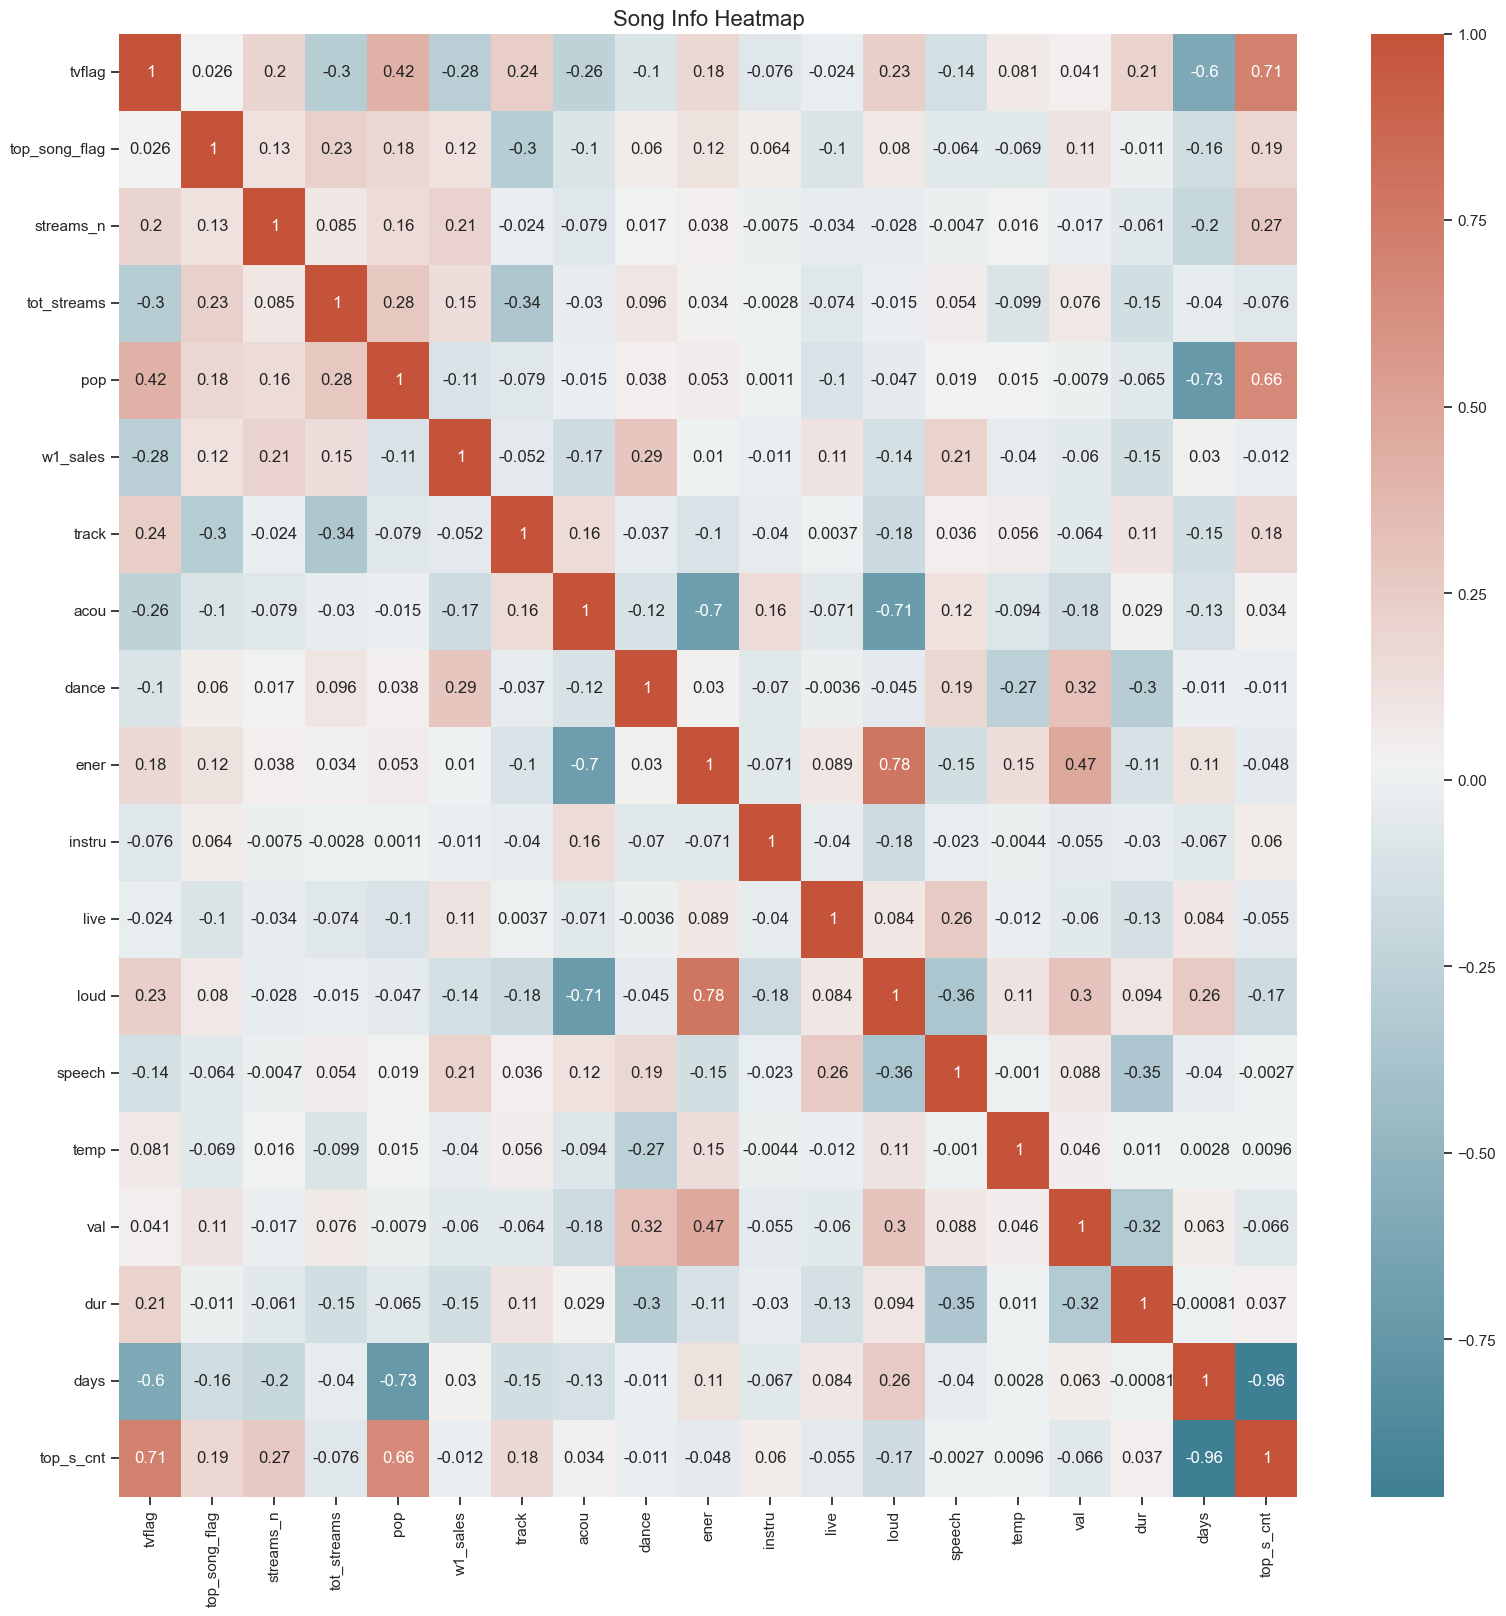

In [148]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(19,19))

cmap = sns.diverging_palette(2020, 19, as_cmap=True) 

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
song_info_heatmap= sns.heatmap(song_info.corr(), annot = True, cmap=cmap, ax = ax)
plt.title('Song Info Heatmap', fontsize=16)
cb.ax.tick_params(labelsize=14) 
plt.show()

In [149]:
# Save figure

song_info_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_heatmap.png'))

## Observations for song_info subset

song_info subset
within song characteristics
energy and acou -0.7
loud and energy 0.78
streams and song characteristics: no strong values that show song characteristics and streams!
highest measure is track and total_streams -0.34 
(but not streams normalized?? with a -0.024 coefficient)
Track is also important for top_song and track -0.3

week 1 album sales and song info
wk1_sales and dur 0.21
wk1_sales and dance 0.29

UNEXPECTED:  days and tot_streams -0.04: time perhaps isn’t a main in factor in song stream totals 

pop correlations speak to how Spotify makes algorithm
pop and top_song_cnt 0.66 (likely from billboard factor)
Total_streams_n and pop only 0.28 (spotify includes a time measure)
pop and days -0.78 (spotify weighs song pop based on days since last played etc.)
choice to have less emphasis on pop value for this analysis, since it id tied to so many other variables

Correlations to focus on 
top_song and track -0.3
wk1_sales and dance 0.29
track and total_streams -0.34
days and total_streams -0.04 (why?)


# Scatterplots

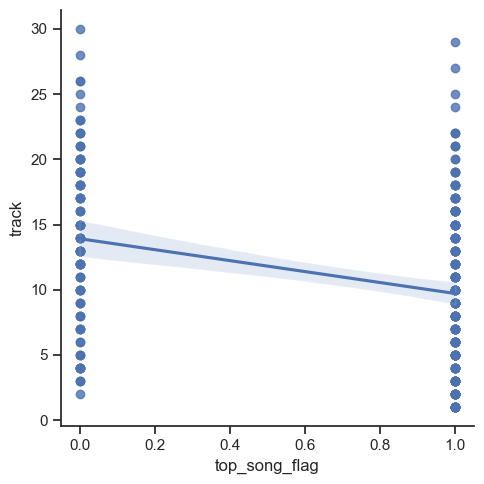

In [150]:
# Create scatter for top_song and track

song_info_scatt_top_s_track = sns.lmplot(x = 'top_song_flag', y = 'track', data = song_info)

In [151]:
# Save figure

song_info_scatt_top_s_track.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_scatt_top_s_track.png'))

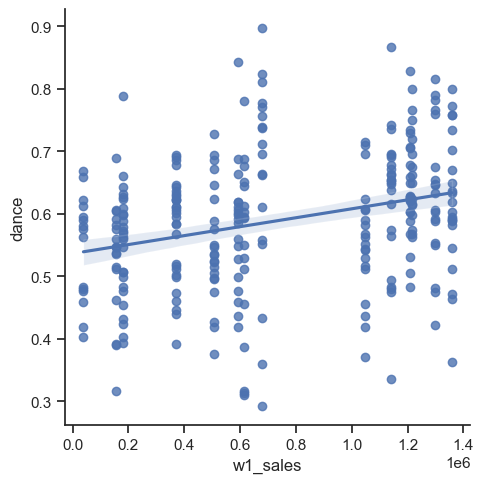

In [152]:
# Create scatter for wk1_sales and dance

song_info_scatt_wk1_sales_dance = sns.lmplot(x = 'w1_sales', y = 'dance', data = song_info)

In [153]:
# Save figure

song_info_scatt_wk1_sales_dance.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_scatt_wk1_sales_dance.png'))

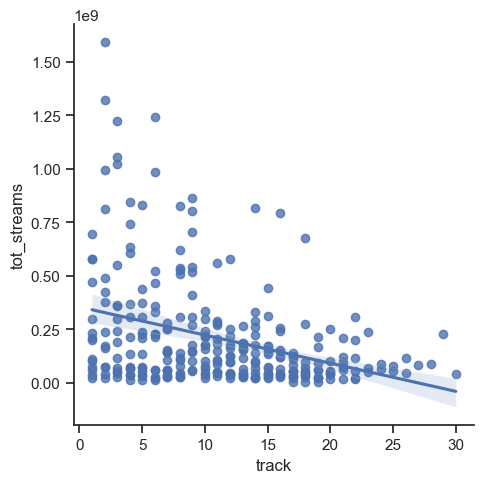

In [154]:
# Create scatter for track and total_streams

song_info_scatt_track_tot_streams = sns.lmplot(x = 'track', y = 'tot_streams', data = song_info)

There are major outliers in total streams, specifically around a high number of total streams.

In [155]:
# Save figure

song_info_scatt_track_tot_streams.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_scatt_track_tot_streams.png'))

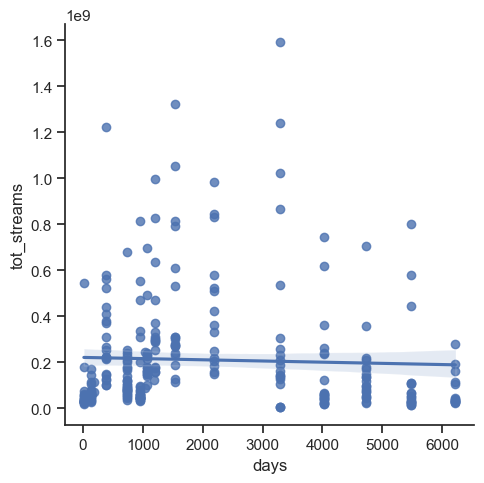

In [156]:
# Create scatter for days and total_streams

song_info_scatt_days_tot_streams = sns.lmplot(x = 'days', y = 'tot_streams', data = song_info)

In [157]:
# Save figure

song_info_scatt_days_tot_streams.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_scatt_days_tot_streams.png'))

## Scatterplot takeaways

## top_song and track -0.3
Not very handy because binary value
## wk1_sales and dance 0.29
interesting! Clusters! Want to explore more
## track and total_streams -0.34
Very clear downwards trend. Want to explore!
## days and total_streams -0.04 (why?)
Clear outliers, unclear why so unrelated at this 
point.

## Dance and track as potential best predictors for success. 


# Pair Plots

## Variables of focus: 'track', 'dance', 'wk1_sales', 'total_streams', 'days' 

In [158]:
song_info.columns

Index(['tvflag', 'top_song_flag', 'streams_n', 'tot_streams', 'pop',
       'w1_sales', 'track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud',
       'speech', 'temp', 'val', 'dur', 'days', 'top_s_cnt'],
      dtype='object')

In [159]:
song_info_sub = song_info[['track', 'dance', 'w1_sales', 'tot_streams', 'days']]

In [160]:
song_info_sub

track  dance  w1_sales  tot_streams  days
0        1  0.757   1359000     35521714    13
1        2  0.733   1359000     40958068    13
2        3  0.511   1359000     47687102    13
3        4  0.545   1359000     37545128    13
4        5  0.588   1359000     31008534    13
..     ...    ...       ...          ...   ...
280     11  0.668     39000    280561783  6225
281     12  0.563     39000     43132276  6225
282     13  0.612     39000     29681361  6225
283     14  0.483     39000     21365584  6225
284     15  0.459     39000     28224285  6225

[285 rows x 5 columns]

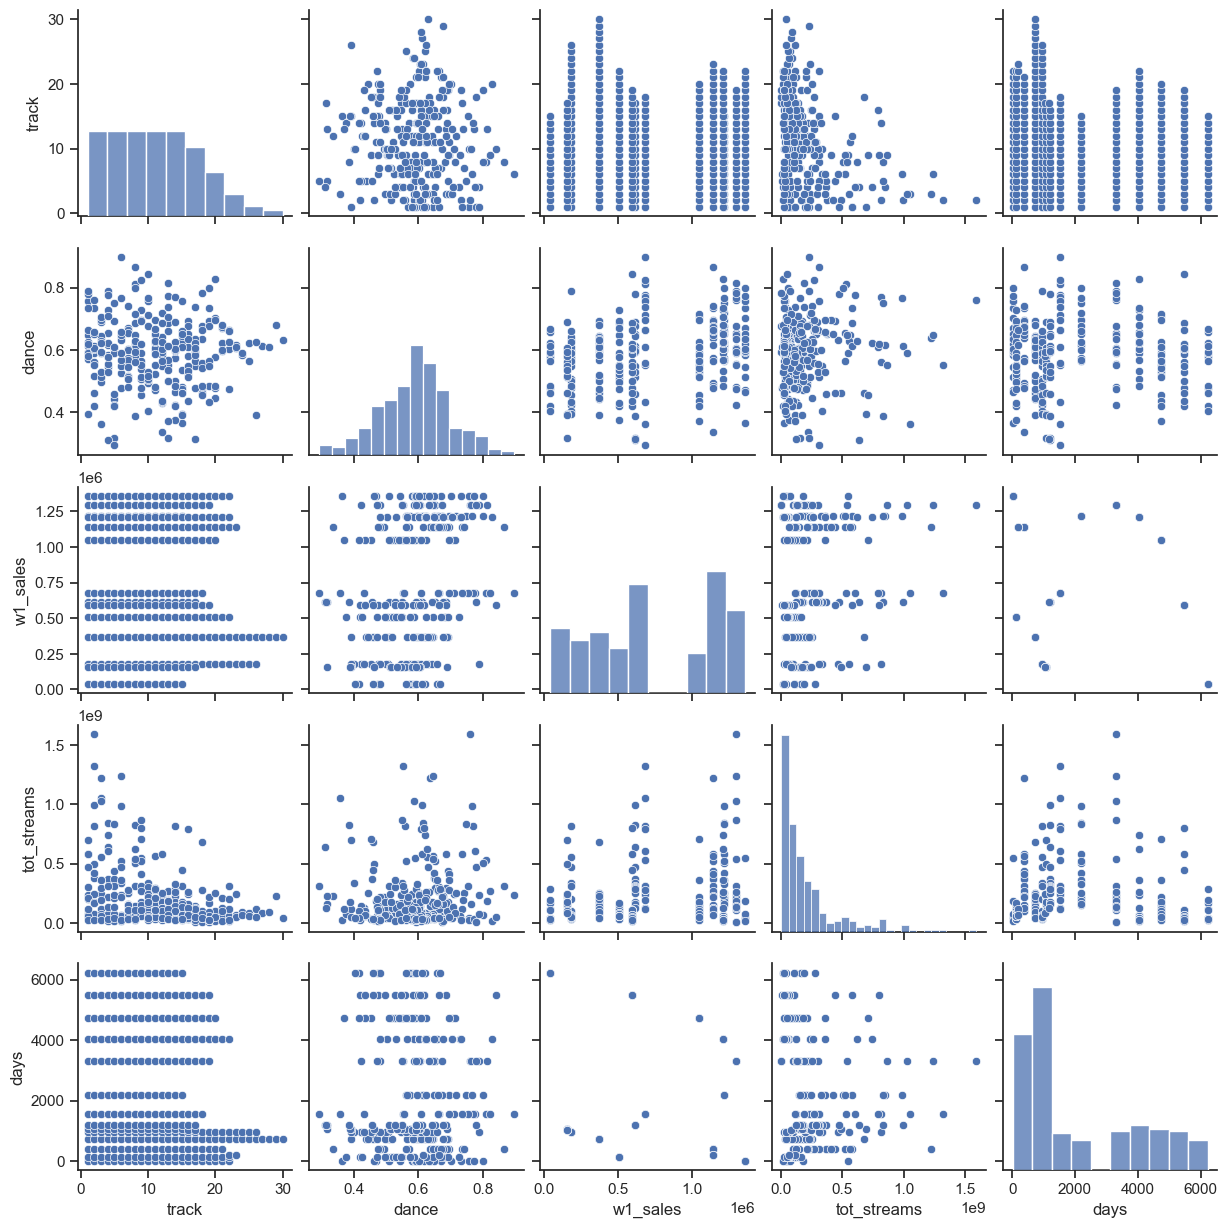

In [161]:
# Create pair plot for song information subset

song_info_pairplot = sns.pairplot(song_info_sub)

In [162]:
# Save figure 

song_info_pairplot.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_info_pairplot.png'))

# Categorical plots for song_info

## Based on the scatterplot and pair plots, choice to focus on these variables

# wk1_sales and dance

# tot_streams and track

<Axes: xlabel='w1_sales', ylabel='Count'>

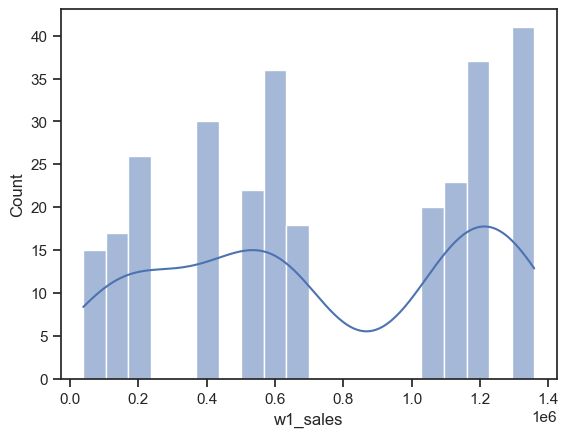

In [163]:
# Create histogram of wk1_sales

sns.histplot(song_info_sub['w1_sales'],bins = 20, kde = True)

In [164]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag'],
      dtype='object')

In [165]:
song_stream_alb['w1_sales'].value_counts(dropna=True)

w1_sales
369000     30
179000     26
1140000    23
1359000    22
507000     22
1208000    22
1047000    20
1297000    19
592300     19
679000     18
154500     17
615000     17
1216000    15
39000      15
Name: count, dtype: int64

## These sales figure have to do with albums, which is why there are 14 distinct sales figures. I will use the sales groupings I created in the gsearch dataframe from bove to create a sales group flag

In [166]:
song_stream_alb['w1_sales'].dtype

dtype('int64')

In [167]:
# Apply flags based on distribution of wk1_alb_sales

song_stream_alb.loc[song_stream_alb['w1_sales'] < 500000, 'sales_group'] = 'Low first week sales'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3188591509.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low first week sales' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  song_stream_alb.loc[song_stream_alb['w1_sales'] < 500000, 'sales_group'] = 'Low first week sales'


In [168]:
song_stream_alb.loc[(song_stream_alb['w1_sales'] >= 500000) & (song_stream_alb['w1_sales'] <1000000), 'sales_group'] = 'Medium first week sales'

In [169]:
song_stream_alb.loc[song_stream_alb['w1_sales'] >= 1000000, 'sales_group'] = 'High first week sales'

In [170]:
song_stream_alb['sales_group'].value_counts(dropna = False)

sales_group
High first week sales      121
Low first week sales        88
Medium first week sales     76
Name: count, dtype: int64

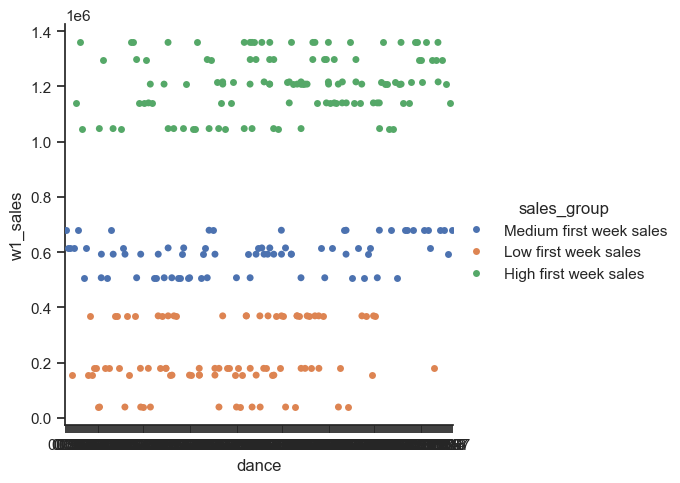

In [171]:
# Create Categorical Plot

sns.set(style = "ticks")
catplot_wk1_sales_dance = sns.catplot(x = 'dance', y = 'w1_sales', hue = 'sales_group', data = song_stream_alb)


plt.show()

In [172]:
# Save figure

catplot_wk1_sales_dance.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_wk1_sales_dance.png'))

## Observations:
Three distinct groups. Large gap between medium 1st week sales and high 1st week sales. More of the high sales are clustered near high danceability, with very few low (and reverse for low 1st week sales. The cluster of medium sales group with the highest sales is at the high end of danceability. This could be a potential predictor.

The higher the danceability score for a song, the higher the week 1 traditional album sales. 


In [173]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group'],
      dtype='object')

<Axes: xlabel='tot_streams', ylabel='Count'>

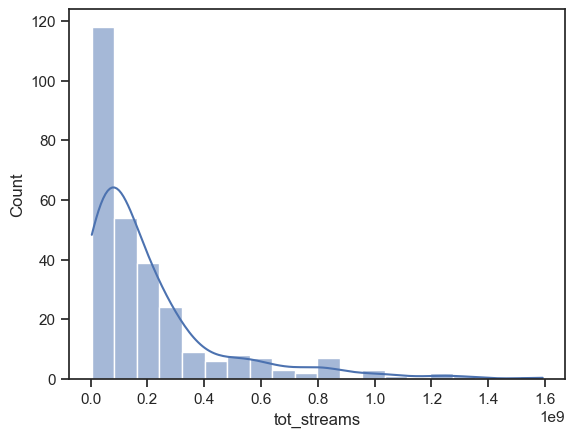

In [174]:
## Make categorical plot for track and total_streams 
## See distribution of total_streams using histogram


sns.histplot(song_stream_alb['tot_streams'],bins = 20, kde = True)

Note highly skewed left with major outliers. 

In [175]:
song_stream_alb['tot_streams'].describe()

count    2.850000e+02
mean     2.094616e+08
std      2.522123e+08
min      4.443209e+06
25%      5.012600e+07
50%      1.172463e+08
75%      2.516694e+08
max      1.591542e+09
Name: tot_streams, dtype: float64

In [176]:
song_stream_alb['streams_n'].describe()

count    2.850000e+02
mean     6.122844e+05
std      2.695970e+06
min      1.346000e+03
25%      4.249900e+04
50%      1.463440e+05
75%      3.890580e+05
max      4.179795e+07
Name: streams_n, dtype: float64

<Axes: xlabel='streams_n', ylabel='Count'>

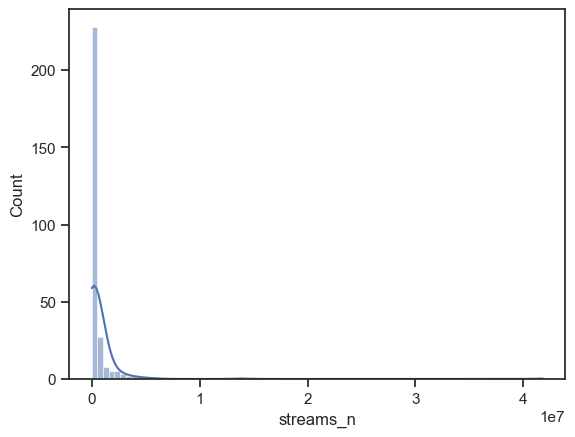

In [177]:
# Check if similar spread to normalized streams

sns.histplot(song_stream_alb['streams_n'], bins = 80, kde = True)

There are major outliers for normalized streams. Will use total spotify plays for groups since continue to see weak relationship in time and values. Can always compare to normalized streams if needed.

In [178]:
# Compare number of top songs in top songs dataframe from wrangling with top streams value group below
top_stream_songs.shape  #$71 top songs in top songs df

(71, 40)

In [179]:
# Make value groupings for tot_spot_plays_song

song_stream_alb.loc[song_stream_alb['tot_streams'] < 50126000, 'tot_streams_group'] = 'Low total streams'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\1776278316.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low total streams' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  song_stream_alb.loc[song_stream_alb['tot_streams'] < 50126000, 'tot_streams_group'] = 'Low total streams'


In [180]:
song_stream_alb.loc[(song_stream_alb['tot_streams'] >= 50126000) & (song_stream_alb['tot_streams'] <  251669400), 'tot_streams_group'] = 'Medium total streams'

In [181]:
song_stream_alb.loc[song_stream_alb['tot_streams'] >= 251669400, 'tot_streams_group'] = 'High total streams'

In [182]:
song_stream_alb['tot_streams_group'].value_counts(dropna=False) # goal to allign to normalized streams dataframe

tot_streams_group
Medium total streams    143
Low total streams        71
High total streams       71
Name: count, dtype: int64

Observations: sucessfully matched counts so that the high total streams group has the same value counts as top songs by normalized streams. Will explore more below. Now will complete categorical plot using streams groups.

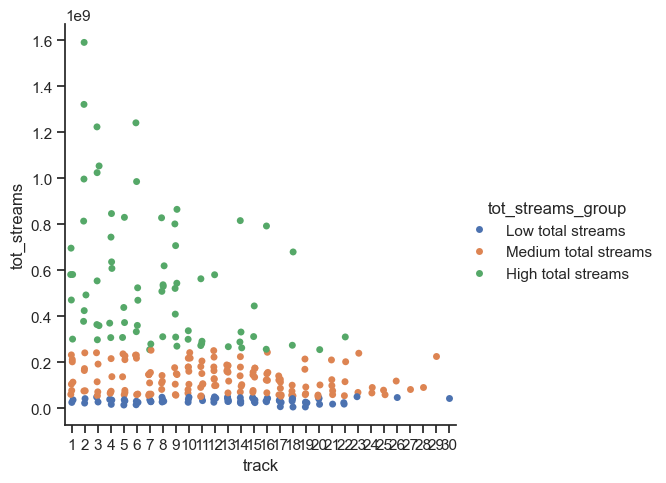

In [183]:
# Create Categorical Plot

sns.set(style = "ticks")
catplot_tot_streams_track_streams_group_hue = sns.catplot(x = 'track', y = 'tot_streams', hue = 'tot_streams_group', data = song_stream_alb)


plt.show()

Observations:
The “high streams” group for total spotify streams leans towards higher total streams and has no tracks above 22, with most under track 10. The other two streams groups have tracks across album tracks. 

In [184]:
# Save figure

catplot_tot_streams_track_streams_group_hue.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_tot_streams_track_streams_group_hue.png'))

## Categorical plots for song_info observations

## Correlation plot danceability and w1_trad_alb_sales

Three distinct groups. Large gap between medium 1st week sales and high 1st week sales. More of the high sales are clustered near high danceability, with very few low (and reverse for low 1st week sales. The cluster of medium sales group with the highest sales is at the high end of danceability. This could be a potential predictor.

## The higher the danceability score for a song, the higher the week 1 traditional album sales. 

## Correlation plot track and total_streams -0.34

Made top songs dataframe in wrangling steps by: 
streams_norm > 389058
made total streams group for categorical plot by total_spotify streams > 251669400
both = 71 songs : D (same data points)

Categorical plot is VERY telling. High total streams drastically lower tracks, skewed right. Want to use track number as predictor for success. 

## The lower the track number, the more total streams a song will achieve


In [185]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group'],
      dtype='object')

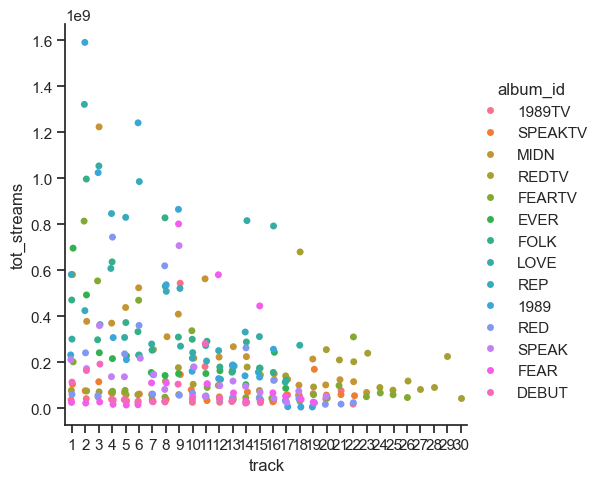

In [186]:
# Quick check to see if there is variation based on album

# Create Categorical Plot

sns.set(style = "ticks")
catplot_tot_streams_track_album_hue = sns.catplot(x = 'track', y = 'tot_streams', hue = 'album_id', data = song_stream_alb)


plt.show()

Observations: There is some variations across albums, with clustering. REDTV has particularly clear patterns of higher track play success.

In [187]:
# Save figure

catplot_tot_streams_track_album_hue.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_tot_streams_track_album_hue.png'))

## Subset of song_alb_info: song_measures
This subset looks at song measures in particular to set if the measurements of success allign.


In [188]:
song_stream_alb_corr.columns

Index(['tvflag', 'top_song_flag', 'track', 'acou', 'dance', 'ener', 'instru',
       'live', 'loud', 'speech', 'temp', 'val', 'pop', 'dur', 'days',
       'tot_streams', 'streams_n', 'top_s_cnt', 'alb_num', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt'],
      dtype='object')

In [189]:
# song measures subset

song_measures = song_stream_alb_corr[['tvflag', 'top_song_flag', 'tot_streams', 'streams_n', 'pop', 'days',
                                   'top_s_cnt', 'alb_num', 'alb_ann_day', 'alb_ann_yr',
                                       'alb_r_day', 'alb_r_yr', 'w1_sales', 'top_alb_count']]

In [190]:
song_measures

tvflag  top_song_flag  tot_streams  streams_n  pop  days  top_s_cnt  \
0      True           True     35521714    2732439   80    13         14   
1      True           True     40958068    3150620   80    13         14   
2      True           True     47687102    3668238   81    13         14   
3      True           True     37545128    2888086   80    13         14   
4      True           True     31008534    2385271   79    13         14   
..      ...            ...          ...        ...  ...   ...        ...   
280   False           True    280561783      45070   77  6225          1   
281   False          False     43132276       6928   62  6225          1   
282   False          False     29681361       4768   58  6225          1   
283   False          False     21365584       3432   57  6225          1   
284   False          False     28224285       4534   57  6225          1   

     alb_num  alb_ann_day  alb_ann_yr  alb_r_day  alb_r_yr  w1_sales  \
0         14            9        2023         27      2023   1359000   
1         14            9        2023         27      2023   1359000   
2         14            9        2023         27      2023   1359000   
3         14            9        2023         27      2023   1359000   
4         14            9        2023         27      2023   1359000   
..       ...          ...         ...        ...       ...       ...   
280        1           19        2006         24      2006     39000   
281        1           19        2006         24      2006     39000   
282        1           19        2006         24      2006     39000   
283        1           19        2006         24      2006     39000   
284        1           19        2006         24      2006     39000   

     top_alb_count  
0                1  
1                1  
2                1  
3                1  
4                1  
..             ...  
280            284  
281            284  
282            284  
283            284  
284            284  

[285 rows x 14 columns]

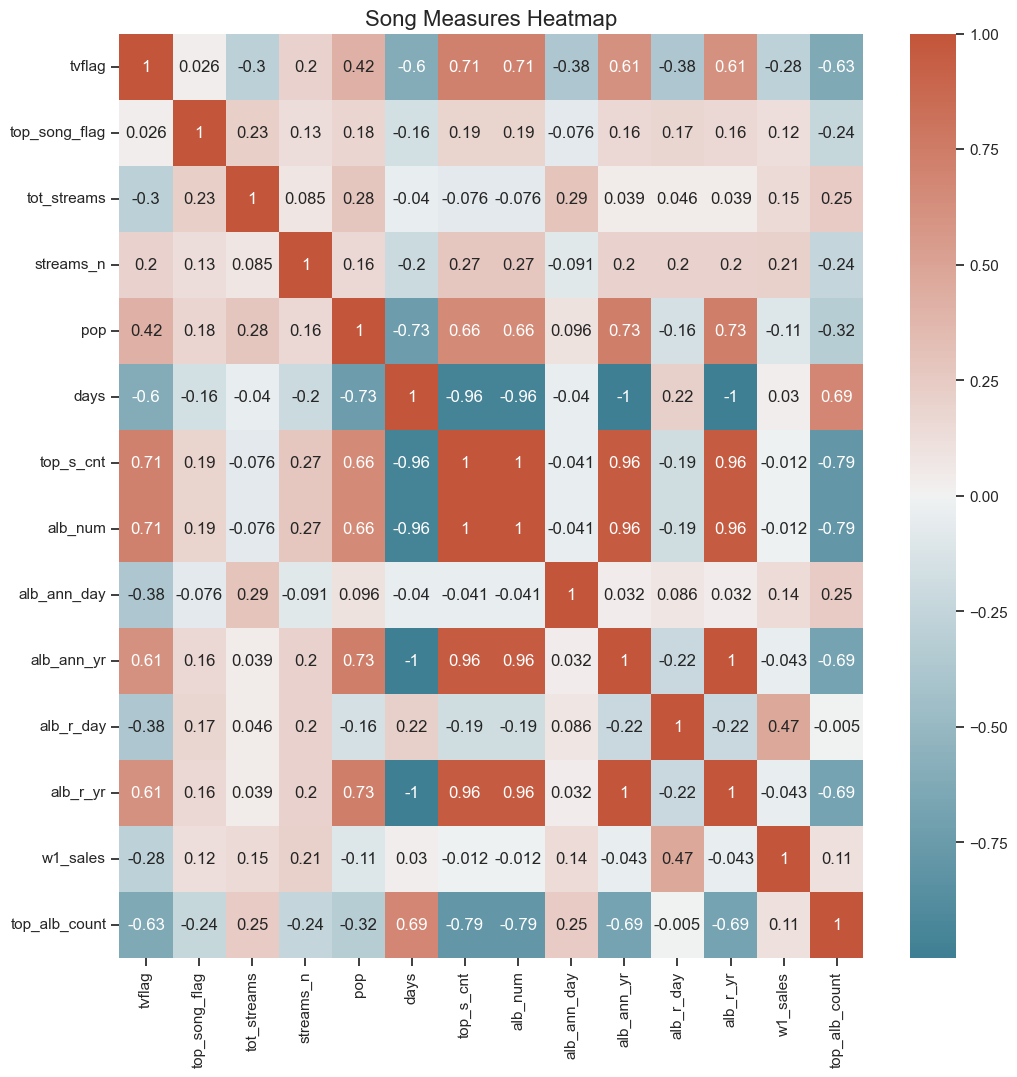

In [191]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(12,12))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix 
song_meas_heatmap = sns.heatmap(song_measures.corr(), annot = True, cmap=cmap, ax = ax) 
plt.title('Song Measures Heatmap', fontsize=16)
cb.ax.tick_params(labelsize=14) 

plt.show()

In [192]:
# save figure

song_meas_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'song_meas_heatmap.png'))

## Observations: 
Many high correlations since values are tied to albums, with same figures. Anything that is album only information will have a correlation of 1.0 (or about .9 with some slight variations in announcement day etc.) Will explore delineations in album aggs dataframe. 


Pop is not a good indicator because it isn’t an isolated variable: it uses time, album figures, etc. for algorithms without transparency. The connection to total streams but not streams normalized is just one example of the influence of time on the pop score. Another example is the tie between album year and pop score of 0.73.



##  Taylor's Version flag notes
tv_flag is correlated with: 

tv_flag and alb_r_day -0.38

tv_flag and alb_ann_day -0.38

tv_flag and top_song_cnt 0.71  (interesting because that is the total number of top songs on an 
album, even though the tv_flag and top_song flag are only 0.026. This could be because the TV_flag is inherently an album measure)

* will save tv_flag variables for album_aggs dataframe since all of these correlations are more album based

## Variables to focus on:
## days and tot_streams -0.04 (because unexpected)
## alb_ann_day and tot_streams 0.29 (when Taylor makes announcements is big deal)
## streams_n and top_alb_count -0.32






## Spotify 'pop' measure

Interestingly, the less days away from release, the more song popularity score on spotify is (reverse to assumptions)


---------------------

I want to explore spotify's definition of Spotify's popularity index:

"The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks."
https://developer.spotify.com/documentation/web-api/reference/get-an-artist

"Importantly, having a high rank will improve a track’s discoverability within the platform. When you release a song, the first days will be crucial to determine its popularity and future success."

The index is calculated by:
"Total streams of a song.
How recently a song has been played.
The frequency that a track has been played"

"When your popularity index increases, the algorithm will notice your music and place it in the algorithmic playlists, and by now, I’m sure you know how important that is. Once that happens, you can remain on those playlists indefinitely and keep your streams fresh. It also will benefit from getting exposure to your music and reaching new potential fans."

The index also increases spotify's algorithm to add a song to spotify created playlists, including release radar, discover weekly, daily mix, spotify radio, on repeat, on rewind

https://twostorymelody.com/spotify-popularity-index/

--------

Therefore, the popularity index of a song is related to exposure factors, not just how good a song is. 

songs that have a high performance in album sales, top_alb_norm, top_alb_count, and streams_normal without having a high spotify pop index could be outliers in highly successful songs


## Scatterplots for song_meas

In [193]:
# Reviewing main dataframe column names in case want to add variables/flags and/or hues

song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group'],
      dtype='object')

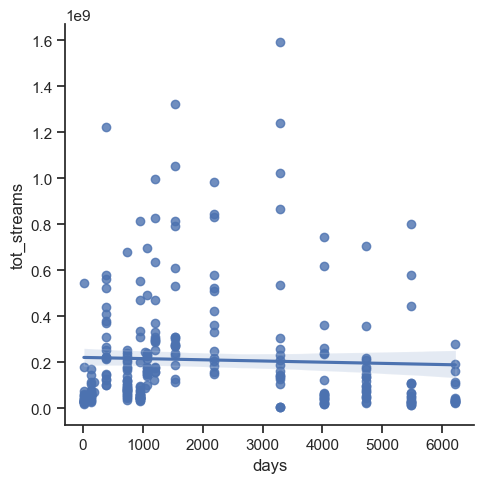

In [194]:
# Create scatterplot for the day_since_release and total spotify plays
# -0.04 corr coeff
scatter_days_tot_song_streams = sns.lmplot(x = 'days', y = 'tot_streams', data = song_stream_alb)

In [195]:
# Export plot

scatter_days_tot_song_streams.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_days_tot_song_streams.png'))

Major outliers. Will hue with alb_id to see if certain albums outperform

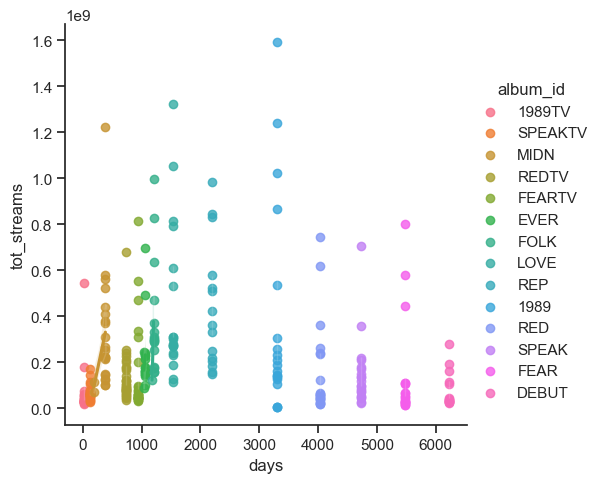

In [196]:
# Create scatterplot for the days and spotify plays, but with album hue

scatter_days_tot_song_streams = sns.lmplot(x = 'days', y = 'tot_streams', hue= 'album_id', data = song_stream_alb)

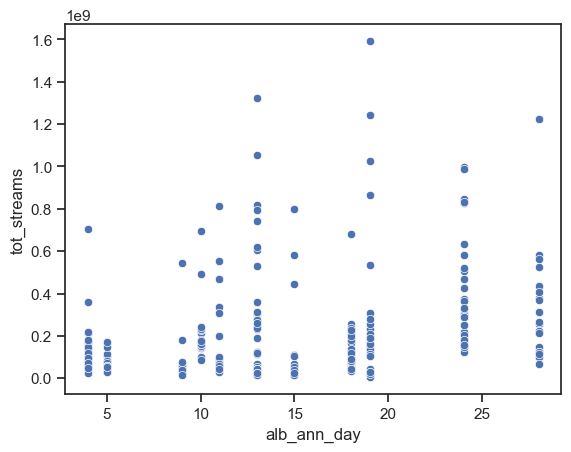

In [197]:
# Create scatterplot of album announcement day and total spotify streams
# corr coeff 0.29

scatter_ann_day_tot_streams = sns.scatterplot(x = 'alb_ann_day' , y = 'tot_streams', data = song_stream_alb)

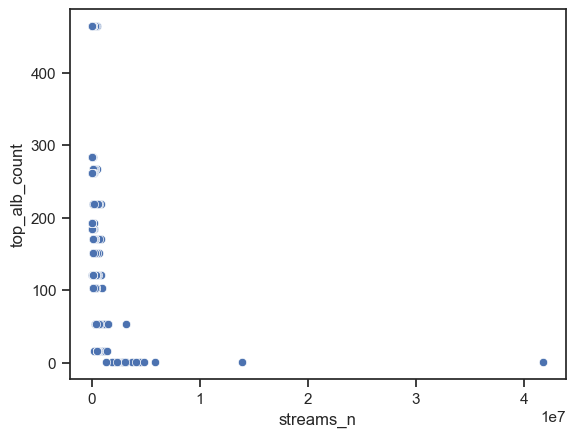

In [198]:
# Create scatterplot of song streams normalized and top_alb_count
# corr coeff -0.32

scatter_streams_n_top_alb_cnt = sns.scatterplot(x = 'streams_n' , y = 'top_alb_count', data = song_stream_alb)

There are major outliers between streams normalized and top album count. I would be interested to see if outliers were removed what the correlation could be. This is probably based on the time factor for top album count, which isn't normalized to account for time while streams_n is. Therefore it's not a very reliable measure. 

In [199]:
# Export plot

scatter_days_tot_song_streams.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_days_tot_song_streams.png'))

In [200]:
# Export plot

scatter_ann_day_tot_streams.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_ann_day_tot_streams.png'))

In [201]:
# Export plot

scatter_streams_n_top_alb_cnt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_streams_n_top_alb_cnt.png'))

## Scatterplots song_meas observations

## days and tot_streams -0.04 (because unexpected)
Major outliers. EVER, LOVE, REP, 1989, 1 REDTV
Unsure what to make of lack of correlation. Outliers could signify songs that "stand the test of time" as well as songs that spike early on as hits.

## alb_ann_day and tot_streams 0.29 (when Taylor makes announcements is big deal)
This is a complex correlation because it really is showing a difference across albums. Will help to see aggregate df correlations below.

## streams_n and top_alb_count -0.32
This plot has major outliers. I imagine that without the outliers this could be an even higher correlation. Will run a subset


## Pair plots for song measure

In [202]:
# Filter down focus variables

song_meas_pair = song_measures[['days', 'tot_streams', 'alb_ann_day', 'streams_n', 'top_alb_count']] 


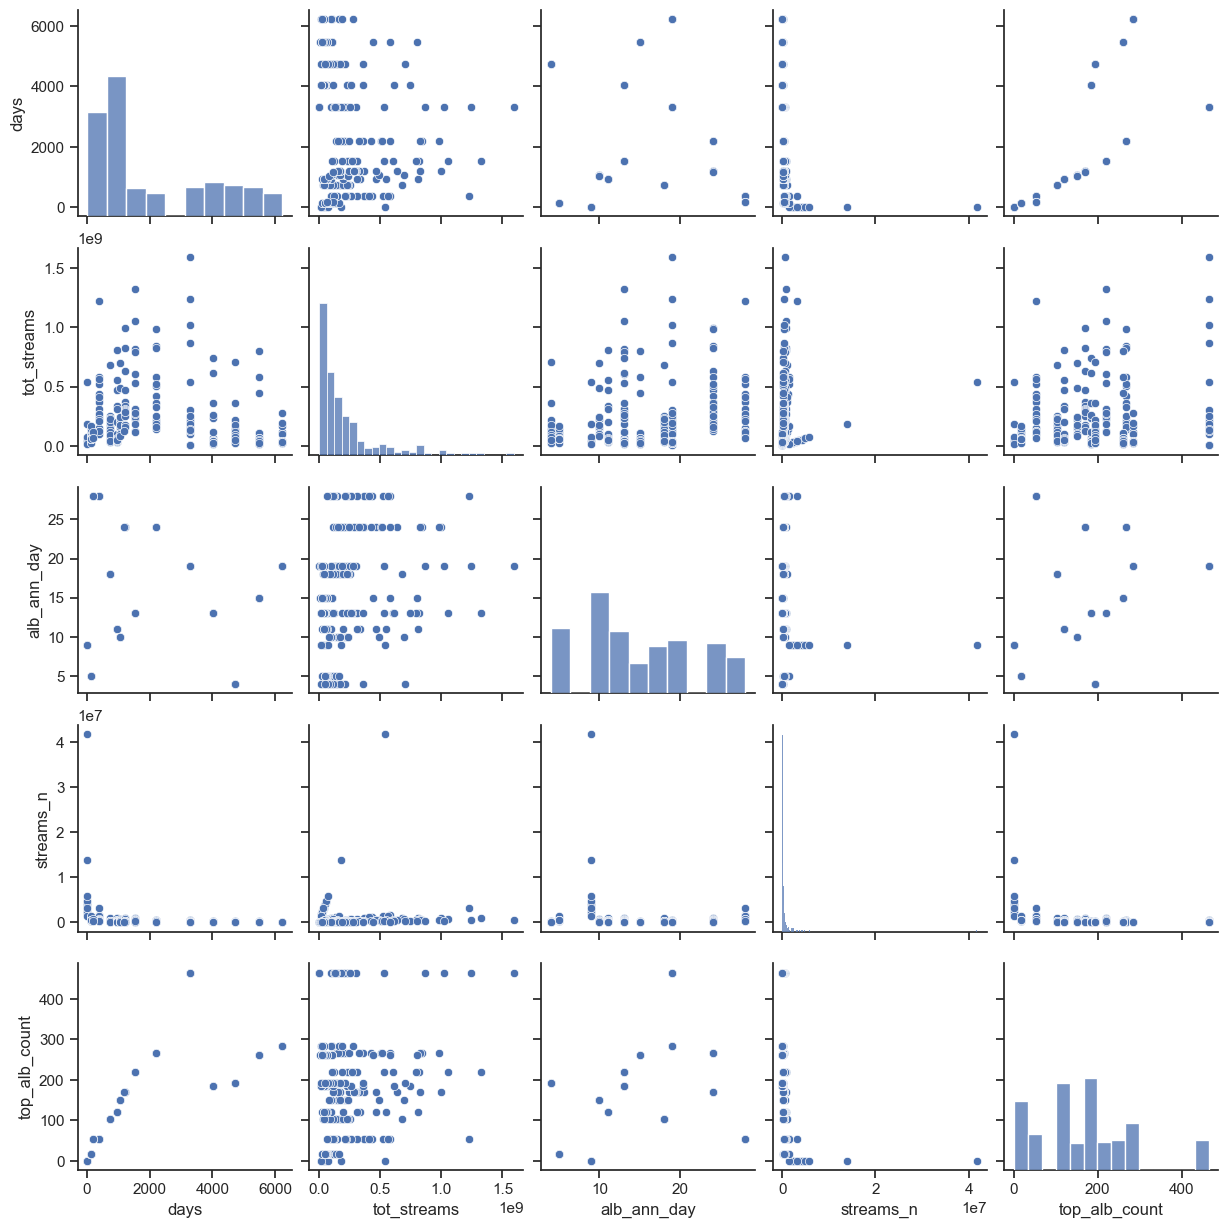

In [203]:
# Create a pair plot for song measures

pairplot_song_meas = sns.pairplot(song_meas_pair)

In [204]:
# Export viz

pairplot_song_meas.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'pairplot_song_meas.png'))

## Categorical plots for song measure
## variable focus days and tot_streams (song streams) to find outliers
Outliers could signify songs that "stand the test of time" as well as songs that spike early on as hits.
Note: started this process above. Want to flip and see if days groups could impact.

In [205]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group'],
      dtype='object')

<Axes: xlabel='days', ylabel='Count'>

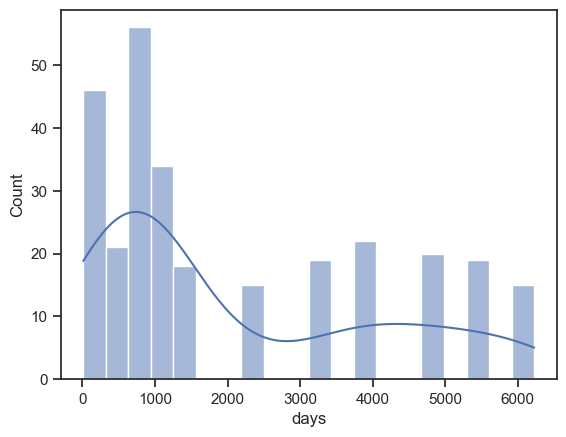

In [206]:
# Create histogram of variable to visualize distribution

sns.histplot(song_stream_alb['days'],bins = 20, kde = True)


In [207]:
song_stream_alb['days'].value_counts(dropna=False)

days
727     30
944     26
13      22
4035    22
125     22
384     21
4736    20
5476    19
3300    19
1539    18
1203    16
2190    15
1063    15
6225    15
1036     2
187      2
1178     1
Name: count, dtype: int64

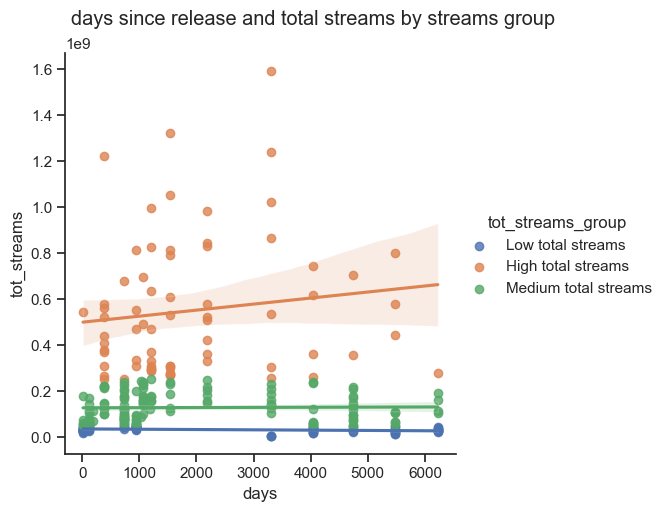

In [208]:
## Create a catplot for days and spotify plays with streams group hue

cat_days_streams_by_streams_group= sns.lmplot(x = 'days', y = 'tot_streams', hue ='tot_streams_group', data = song_stream_alb)
cat_days_streams_by_streams_group.fig.suptitle("days since release and total streams by streams group", y=1.02) 

# Show the plot
plt.show()

## Curious of days_since_release lack of correlation has to do with genres vs. days!!! Outliers are still important, too

Taylor has many subgenres within albums. Overall these are the genres for each album:

Country pop: DEBUT, FEAR, FEARTV, 
Pop rock: SPEAK, SPEAKTV, RED, REDTV
Alternative/Folk/Indie: FOLK, EVER
Synth/Dream/Dance pop: MIDN, 1989, 1989TV, LOVER, REP


In [209]:
song_stream_alb['album_id'].value_counts(dropna=False)

album_id
REDTV      30
FEARTV     26
MIDN       23
1989TV     22
SPEAKTV    22
RED        22
SPEAK      20
1989       19
FEAR       19
LOVE       18
EVER       17
FOLK       17
REP        15
DEBUT      15
Name: count, dtype: int64

In [210]:
# Create flag variable based on age, which also has to do with genre! Using a for loop for simplicity
# will also add this flag to the alb_aggs

alb_genre = []

for value in song_stream_alb['album_id']:
    if value == "1989":
        alb_genre.append("Synth/Dream/Dance pop")
    elif value == "DEBUT":
        alb_genre.append("Country pop")
    elif value == "REP":
        alb_genre.append("Synth/Dream/Dance pop")
    elif value == "FEAR":
        alb_genre.append("Country pop")
    elif value == "LOVE":
        alb_genre.append('Synth/Dream/Dance pop')
    elif value == "SPEAK":
        alb_genre.append("Pop rock")
    elif value == "RED":
        alb_genre.append("Pop rock")
    elif value == "FOLK":
        alb_genre.append("Alternative/Folk/Indie")
    elif value == "EVER":
        alb_genre.append("Alternative/Folk/Indie")
    elif value == "FEARTV":
        alb_genre.append("Country pop")
    elif value == "REDTV":
        alb_genre.append("Pop rock")
    elif value == "MIDN":
        alb_genre.append("Synth/Dream/Dance pop")
    elif value == "SPEAKTV":
        alb_genre.append("Pop rock")
    elif value == "1989TV":
        alb_genre.append("Synth/Dream/Dance pop")
    else:
        alb_genre.append("unknown")

In [211]:
song_stream_alb['alb_genre'] = alb_genre 

In [212]:
song_stream_alb['alb_genre'].value_counts(dropna=False)

alb_genre
Synth/Dream/Dance pop     97
Pop rock                  94
Country pop               60
Alternative/Folk/Indie    34
Name: count, dtype: int64

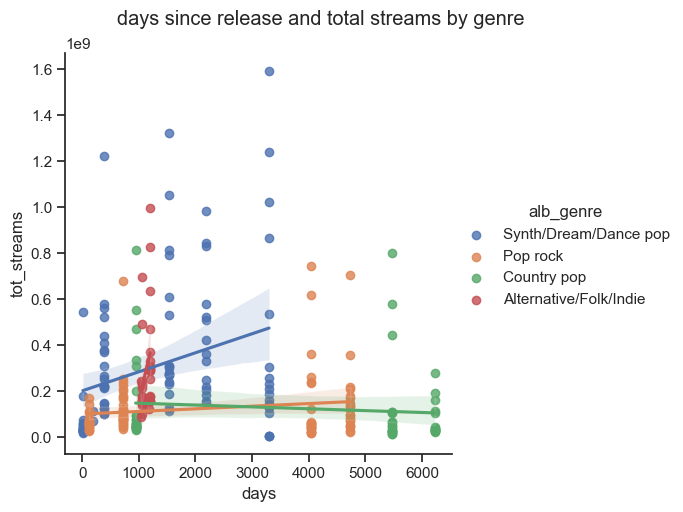

In [213]:
# Create categorical plot of days and total streams with album genre as the hue

cat_days_streams_by_genre= sns.lmplot(x = 'days', y = 'tot_streams', hue ='alb_genre', data = song_stream_alb)
cat_days_streams_by_genre.fig.suptitle("days since release and total streams by genre", y=1.02) 

# Show the plot
plt.show()

In [214]:
# save fig

cat_days_streams_by_genre.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_days_streams_by_genre.png'))

## Observations: Synth/Dream/Dance pop has the most outliers in high spotify plays for less days.Country pop is skewed right and has a higher portion of datapoints with lower plays and more days since release. This shows a shift in her genre popularity over time. Will explore this with alb_aggs dataframe at end of this notebook.

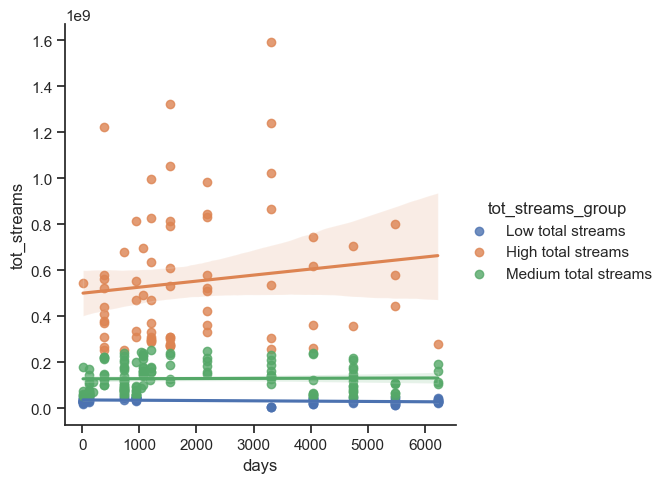

In [215]:
# Compare to spotify play groups

sns.lmplot(x = 'days', y = 'tot_streams', hue= 'tot_streams_group', data = song_stream_alb)

## Want to investigate high total stream songs within a separate dataframe.

# 06. Prepare top_stream_songs

Want to quickly check if there are correlations and similarities within a top song subset dataframem, specifically for song characterisitcs. This is a subset so I will only run a correlation matrix, unless there are major trends to note. 

In [216]:
top_stream_songs.shape

(71, 40)

In [217]:
top_stream_songs.columns

Index(['song_title', 'album_title', 'song_release_date', 'track_number',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'song_popularity', 'duration_ms', 'track_number_str', 'album_id',
       'song_id', 'days_since_release', 'tot_spot_plays_song',
       'track_length_secs', 'last_stream_update', 'streams_normal', 'top_song',
       'top_song_flag', 'top_song_value', 'top_s_cnt', 'tv', 'alb_num',
       'album_announce_mo', 'album_announce_day', 'album_announce_yr',
       'album_announce_date', 'album_release_mo', 'album_release_day',
       'album_release_year', 'album_release_date', 'w1_trad_album_sales',
       'top_alb_count', 'top_alb_normal'],
      dtype='object')

In [218]:
top_stream_songs.dtypes

song_title              object
album_title             object
song_release_date       object
track_number             int64
acousticness           float64
danceability           float64
energy                 float64
instrumentalness       float64
liveness               float64
loudness               float64
speechiness            float64
tempo                  float64
valence                float64
song_popularity          int64
duration_ms              int64
track_number_str         int64
album_id                object
song_id                 object
days_since_release       int64
tot_spot_plays_song      int64
track_length_secs        int64
last_stream_update      object
streams_normal           int64
top_song                object
top_song_flag             bool
top_song_value           int64
top_s_cnt                int64
tv                      object
alb_num                  int64
album_announce_mo       object
album_announce_day       int64
album_announce_yr        int64
album_an

## Create tv flag

In [219]:
# Check current value counts
top_stream_songs['tv'].value_counts(dropna=False)

tv
Taylor's Version    42
original            29
Name: count, dtype: int64

In [220]:
# Assign flag value 

top_stream_songs['tvflag'] = top_stream_songs['tv'] == "Taylor's Version"

In [221]:
# Check  value counts for flag

top_stream_songs['tvflag'].value_counts(dropna=False)

tvflag
True     42
False    29
Name: count, dtype: int64

In [222]:
# Rename columns whose names are too long

top_stream_songs.rename(columns = {'track_number':'track', 
                                  'acousticness':'acou', 
                                  'danceability':'dance', 
                                  'energy':'ener',
                                  'instrumentalness': 'instru', 
                                  'liveness':'live', 
                                  'loudness': 'loud', 
                                  'speechiness':'speech', 
                                  'tempo':'temp',
                                   'valence':'val', 
                                  'song_popularity':'pop', 
                                  'duration_ms': 'dur', 
                                 'days_since_release':'days', 
                                  'tot_spot_plays_song':'tot_streams', 
                                   'streams_normal':'streams_n', 
                                  'top_song_value':'top_song',
                                  'album_announce_day':'alb_ann_day', 
                                  'album_announce_yr':'alb_ann_yr', 
                                  'album_release_day': 'alb_r_day',
                                  'album_release_year': 'alb_r_yr', 
                                  'w1_trad_album_sales':'w1_sales'}, 
                        inplace=True)

In [223]:
top_stream_songs.head()

song_title  \
0         Welcome To New York (Taylor's Version)   
1                 Blank Space (Taylor's Version)   
2                       Style (Taylor's Version)   
3            Out Of The Woods (Taylor's Version)   
4  All You Had To Do Was Stay (Taylor's Version)   

                       album_title song_release_date  track      acou  dance  \
0  1989 (Taylor's Version)[Deluxe]        10/27/2023      1  0.009420  0.757   
1  1989 (Taylor's Version)[Deluxe]        10/27/2023      2  0.088500  0.733   
2  1989 (Taylor's Version)[Deluxe]        10/27/2023      3  0.000421  0.511   
3  1989 (Taylor's Version)[Deluxe]        10/27/2023      4  0.000537  0.545   
4  1989 (Taylor's Version)[Deluxe]        10/27/2023      5  0.000656  0.588   

    ener    instru    live   loud  ...  alb_ann_yr  album_announce_date  \
0  0.610  0.000037  0.3670 -4.840  ...        2023           2023-08-09   
1  0.733  0.000000  0.1680 -5.376  ...        2023           2023-08-09   
2  0.822  0.019700  0.0899 -4.785  ...        2023           2023-08-09   
3  0.885  0.000056  0.3850 -5.968  ...        2023           2023-08-09   
4  0.721  0.000000  0.1310 -5.579  ...        2023           2023-08-09   

   album_release_mo  alb_r_day  alb_r_yr  album_release_date w1_sales  \
0           October         27      2023          2023-10-27  1359000   
1           October         27      2023          2023-10-27  1359000   
2           October         27      2023          2023-10-27  1359000   
3           October         27      2023          2023-10-27  1359000   
4           October         27      2023          2023-10-27  1359000   

  top_alb_count  top_alb_normal  tvflag  
0             1        0.076923    True  
1             1        0.076923    True  
2             1        0.076923    True  
3             1        0.076923    True  
4             1        0.076923    True  

[5 rows x 41 columns]

## Check for duplicates

In [224]:
# Check for duplicates asdasdf

top_stream_songs_dups = top_stream_songs[top_stream_songs.duplicated()]

In [225]:
top_stream_songs_dups.shape

(0, 41)

## Check for mixed type data

In [226]:
# check for mixed type data

for col in top_stream_songs.columns.tolist():
      weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (top_stream_songs[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[c

top_song
top_song


C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\552386114.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (top_stream_songs[[col]].applymap(type) != top_stream_songs[[col]].iloc[0].apply(type)).any(axis = 1)


## Check for missing values

In [227]:
# Check for missing values 

top_stream_songs.isnull().sum()

song_title             0
album_title            0
song_release_date      0
track                  0
acou                   0
dance                  0
ener                   0
instru                 0
live                   0
loud                   0
speech                 0
temp                   0
val                    0
pop                    0
dur                    0
track_number_str       0
album_id               0
song_id                0
days                   0
tot_streams            0
track_length_secs      0
last_stream_update     0
streams_n              0
top_song               0
top_song_flag          0
top_song               0
top_s_cnt              0
tv                     0
alb_num                0
album_announce_mo      0
alb_ann_day            0
alb_ann_yr             0
album_announce_date    0
album_release_mo       0
alb_r_day              0
alb_r_yr               0
album_release_date     0
w1_sales               0
top_alb_count          0
top_alb_normal         0


# 07. Explore top_stream_song, quick heatmap 
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## as mentioned: This is a subset so I will only run a correlation matrix, unless there are major trends to note. 

In [228]:
# List of numeric columns

top_stream_songs_num = top_stream_songs.select_dtypes(include='number')

In [229]:
top_stream_songs_num.columns

Index(['track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud', 'speech',
       'temp', 'val', 'pop', 'dur', 'track_number_str', 'days', 'tot_streams',
       'track_length_secs', 'streams_n', 'top_song', 'top_s_cnt', 'alb_num',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'w1_sales',
       'top_alb_count', 'top_alb_normal'],
      dtype='object')

In [230]:
# Create subset with all relevant number categories with tv_flag added

top_stream_songs_corr = top_stream_songs[['tvflag','track', 'alb_num', 
                                          'w1_sales', 'top_alb_count', 'top_alb_normal',
                                         'tot_streams', 'streams_n', 'top_s_cnt',
                                         'acou', 'dance', 'ener', 'instru', 'live', 'loud', 'speech',
                                       'temp', 'val', 'pop', 'dur', 'days', 
                                         'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',]]

In [231]:
top_stream_songs_corr.corr()

tvflag     track   alb_num  w1_sales  top_alb_count  \
tvflag          1.000000  0.272899  0.682743 -0.001934      -0.625556   
track           0.272899  1.000000  0.351350  0.172575      -0.335933   
alb_num         0.682743  0.351350  1.000000  0.416267      -0.965924   
w1_sales       -0.001934  0.172575  0.416267  1.000000      -0.291936   
top_alb_count  -0.625556 -0.335933 -0.965924 -0.291936       1.000000   
top_alb_normal -0.579264 -0.056060 -0.488957 -0.523379       0.400185   
tot_streams    -0.652632 -0.406645 -0.861877 -0.231579       0.871803   
streams_n       0.207934  0.043561  0.243060  0.296678      -0.202371   
top_s_cnt       0.682743  0.351350  1.000000  0.416267      -0.965924   
acou           -0.533069 -0.023761 -0.289352 -0.129467       0.216128   
dance          -0.082419 -0.032588  0.002329  0.313996       0.055029   
ener            0.472093  0.047800  0.103738 -0.076018      -0.059824   
instru         -0.140936  0.002022  0.010309  0.069893      -0.016409   
live            0.050906 -0.198371  0.134346  0.110731      -0.134098   
loud            0.532889 -0.113874  0.034459 -0.366999      -0.019047   
speech         -0.328859 -0.074678 -0.117367  0.161281       0.108810   
temp            0.119072  0.150239  0.129158  0.014584      -0.141117   
val             0.127325 -0.023098 -0.141008 -0.106195       0.161891   
pop             0.424080  0.062737 -0.082838 -0.221579       0.055646   
dur             0.363198  0.085848  0.154373 -0.416755      -0.175141   
days           -0.606378 -0.344923 -0.963240 -0.291068       0.997346   
alb_ann_day    -0.850024 -0.163325 -0.367687  0.253072       0.333815   
alb_ann_yr      0.641865  0.329523  0.950965  0.216589      -0.994019   
alb_r_day      -0.168928  0.048870  0.129441  0.810134      -0.081815   
alb_r_yr        0.641865  0.329523  0.950965  0.216589      -0.994019   

                top_alb_normal  tot_streams  streams_n  top_s_cnt      acou  \
tvflag               -0.579264    -0.652632   0.207934   0.682743 -0.533069   
track                -0.056060    -0.406645   0.043561   0.351350 -0.023761   
alb_num              -0.488957    -0.861877   0.243060   1.000000 -0.289352   
w1_sales             -0.523379    -0.231579   0.296678   0.416267 -0.129467   
top_alb_count         0.400185     0.871803  -0.202371  -0.965924  0.216128   
top_alb_normal        1.000000     0.368978  -0.337597  -0.488957  0.420306   
tot_streams           0.368978     1.000000  -0.014200  -0.861877  0.163916   
streams_n            -0.337597    -0.014200   1.000000   0.243060 -0.134876   
top_s_cnt            -0.488957    -0.861877   0.243060   1.000000 -0.289352   
acou                  0.420306     0.163916  -0.134876  -0.289352  1.000000   
dance                -0.066929     0.026570   0.000074   0.002329 -0.275558   
ener                 -0.283571    -0.082482   0.042201   0.103738 -0.690548   
instru                0.058064    -0.038852  -0.034417   0.010309  0.246008   
live                 -0.118509    -0.042780  -0.045758   0.134346 -0.186016   
loud                 -0.118965    -0.078132  -0.054163   0.034459 -0.688939   
speech                0.037629     0.144296  -0.033024  -0.117367  0.034938   
temp                 -0.095218    -0.190920   0.063460   0.129158 -0.044289   
val                  -0.074311     0.101579  -0.015052  -0.141008 -0.197176   
pop                  -0.156306    -0.026976   0.032946  -0.082838 -0.373632   
dur                   0.117185    -0.240893  -0.082656   0.154373 -0.012770   
days                  0.368605     0.870467  -0.199534  -0.963240  0.195996   
alb_ann_day           0.449049     0.447168  -0.128948  -0.367687  0.456008   
alb_ann_yr           -0.362715    -0.869480   0.181890   0.950965 -0.220947   
alb_r_day            -0.488213    -0.013908   0.281046   0.129441  0.026570   
alb_r_yr             -0.362715    -0.869480   0.181890   0.950965 -0.220947   

                ...    speech      temp       val       pop     

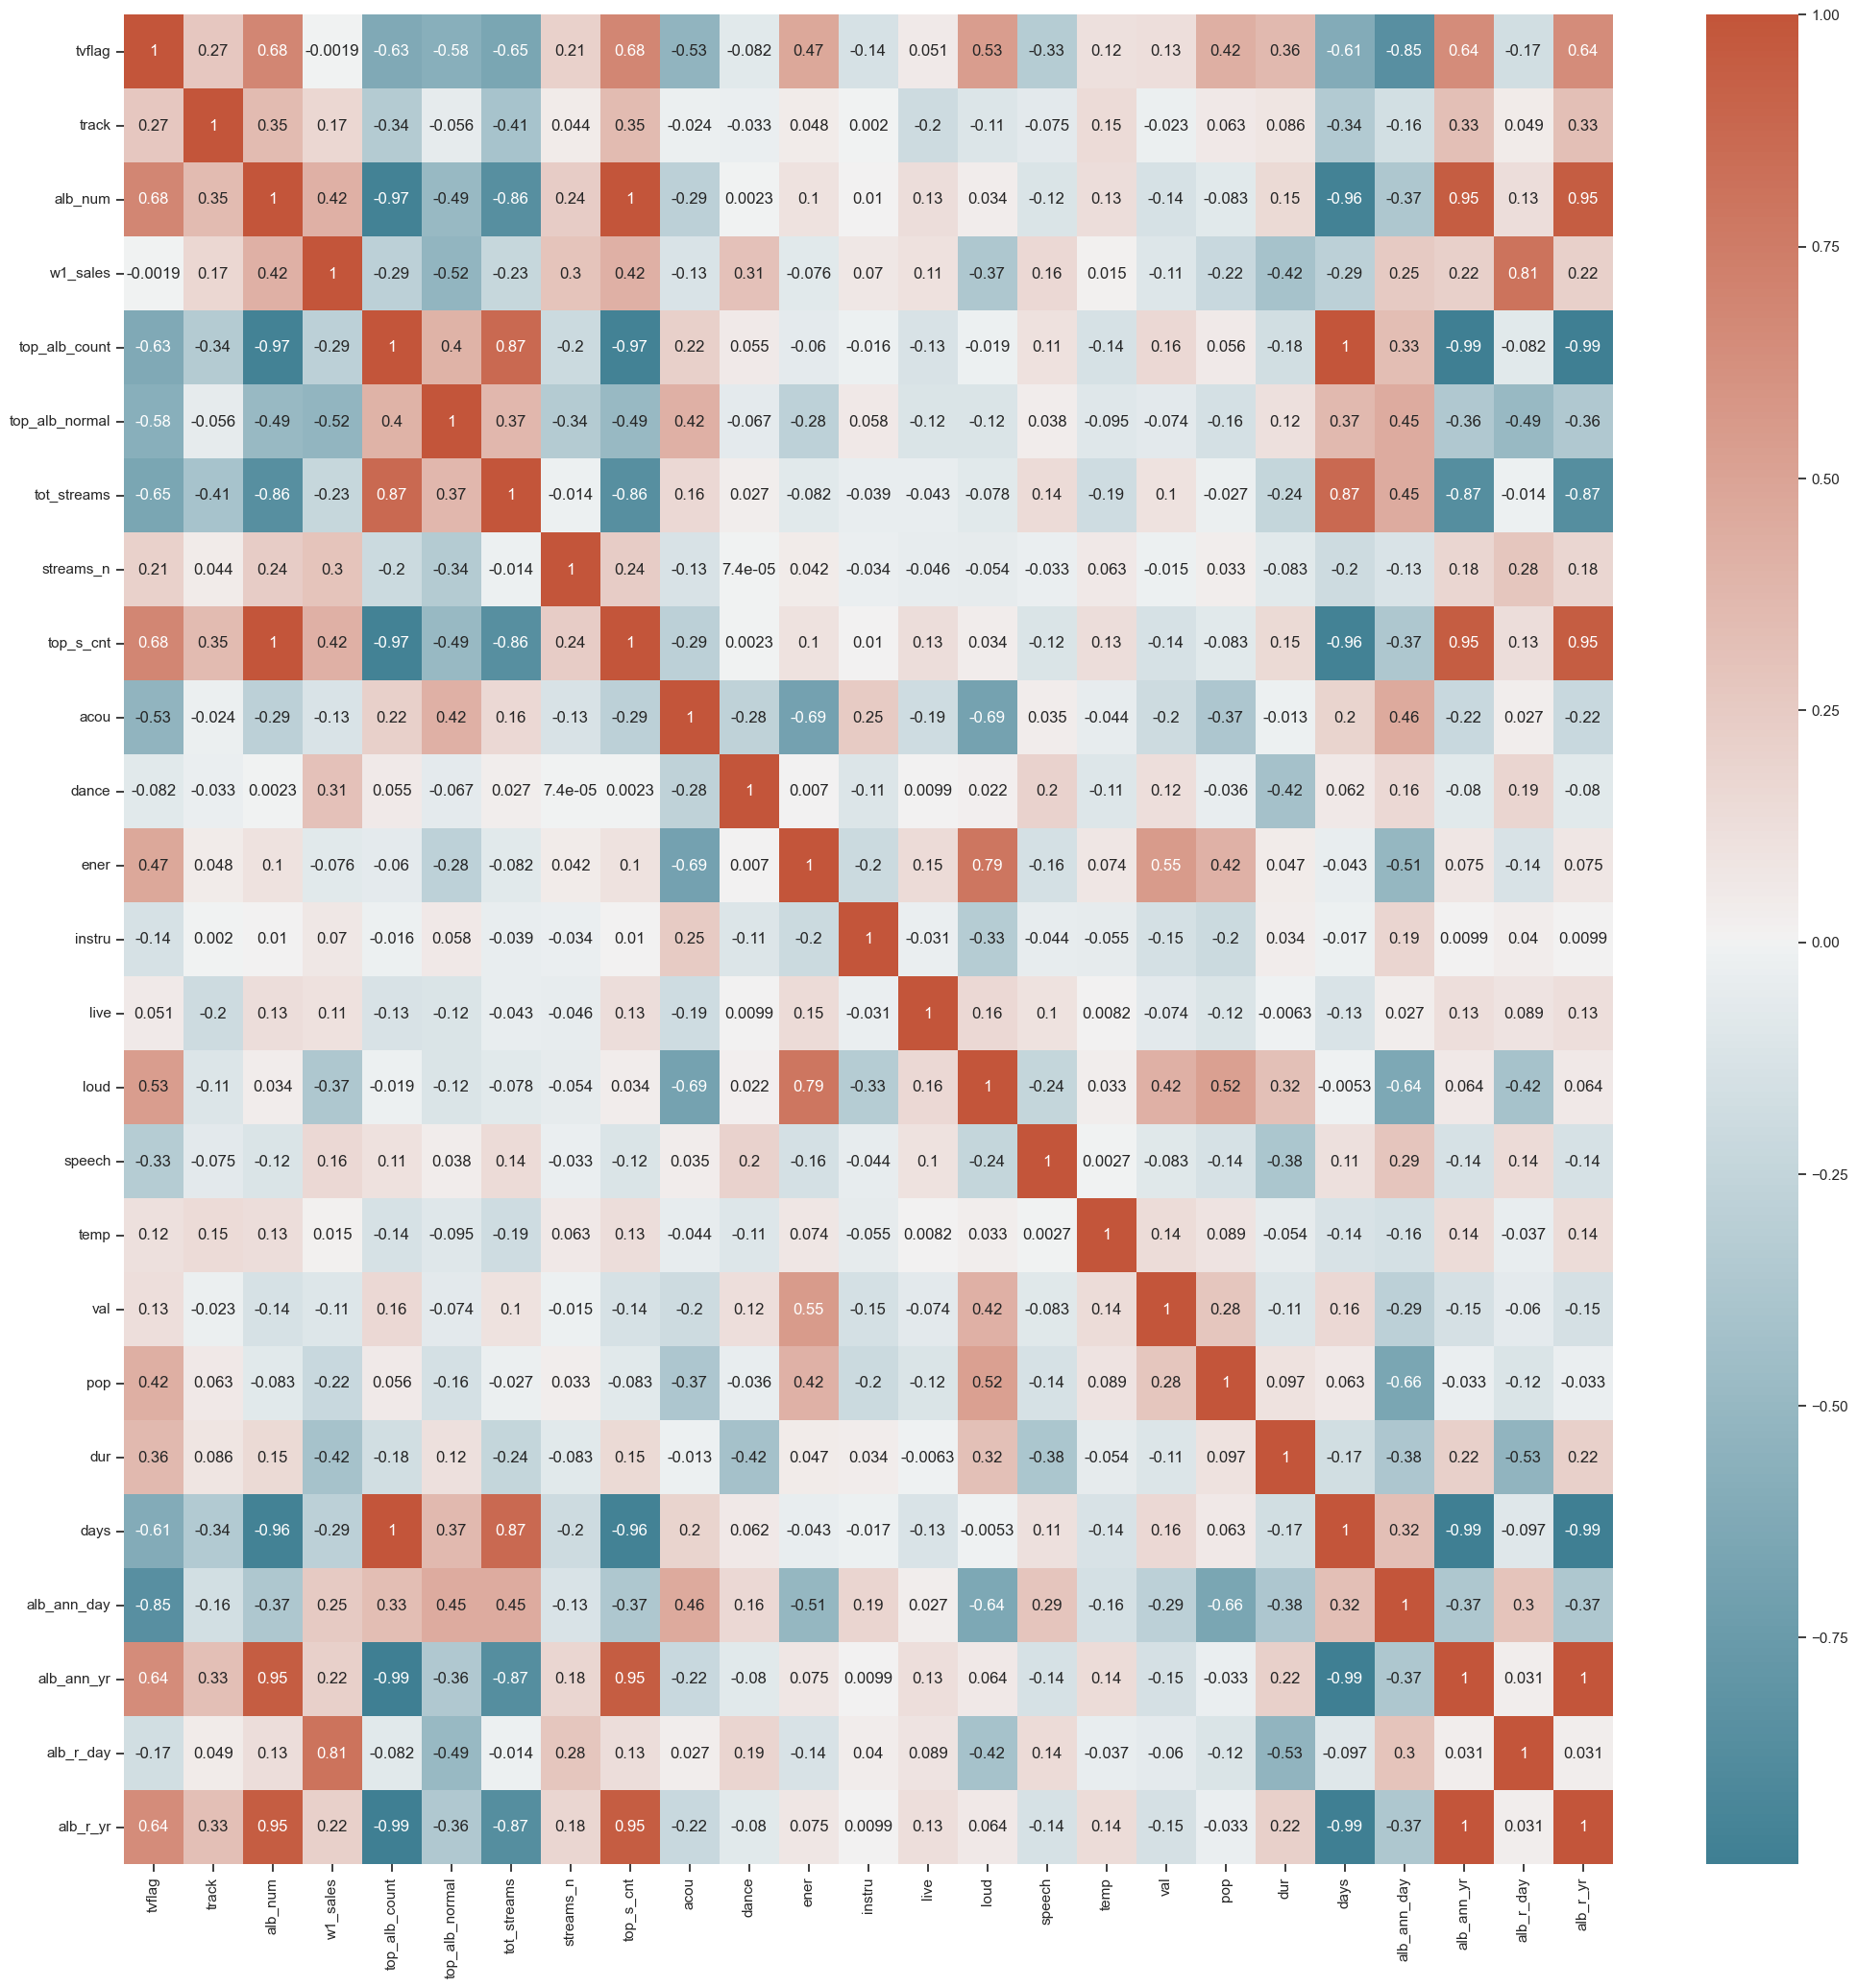

In [232]:
# Create heatmap

f,ax = plt.subplots(figsize=(25,25))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) # Set diverging color palette


top_stream_songs_heatmap = sns.heatmap(top_stream_songs_corr.corr(), annot = True, cmap=cmap, ax = ax) #add correlation coefficients onto the heatmap.

## Observations: There are differences in correlations across variables for the subset of songs with the highest total Spotify streams.
## significant notes: 

## tot_streams and days 0.87 vs. -0.04 (all songs)
  *will explore this measure because it's interesting that high streaming songs are less influenced  
   by time

## track and top_s_cnt 0.35 vs. 0.08 (all songs)
## loud and wk1_sales 0.42 vs -0.14 (all songs)
## track and tot_streams -0.41 vs. -.34 (all songs)


In [233]:
top_stream_songs_corr['tvflag'].value_counts(dropna=False)

tvflag
True     42
False    29
Name: count, dtype: int64

In [234]:
song_stream_alb['tvflag'].value_counts(dropna=False)

tvflag
False    185
True     100
Name: count, dtype: int64

## 69% of top streaming songs are TVs, while 54% of all songs are TVs. 

# Pair plot

In [235]:
top_stream_songs_corr.columns

Index(['tvflag', 'track', 'alb_num', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'tot_streams', 'streams_n', 'top_s_cnt', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'days', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr'],
      dtype='object')

In [236]:
# Create subset of top streaming songs to focus on based on correlation coefficients

top_stream_songs_pair_sub = top_stream_songs_corr[['tot_streams','days', 'track', 'top_s_cnt', 'w1_sales', 'tot_streams']]

In [237]:
top_stream_songs_pair_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 191
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   tot_streams  71 non-null     int64
 1   days         71 non-null     int64
 2   track        71 non-null     int64
 3   top_s_cnt    71 non-null     int64
 4   w1_sales     71 non-null     int64
 5   tot_streams  71 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [238]:
top_stream_songs_pair_sub.isnull().sum()

tot_streams    0
days           0
track          0
top_s_cnt      0
w1_sales       0
tot_streams    0
dtype: int64

## Scatterplots

## Variables of focus 
## tot_streams and days

## top_s_cnt and tot_streams will be a focus for alb_aggs since they are both album measures

## Given tot_streams and days of 0.87 (for the entire dataset the correlation is only -0.05) want to rerun the categorical plot from above that compares days and total streams, doing one separate one for just high streaming songs and one cat plot that includes low and middle streaming songs

In [239]:
top_stream_songs_corr.columns

Index(['tvflag', 'track', 'alb_num', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'tot_streams', 'streams_n', 'top_s_cnt', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'days', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr'],
      dtype='object')

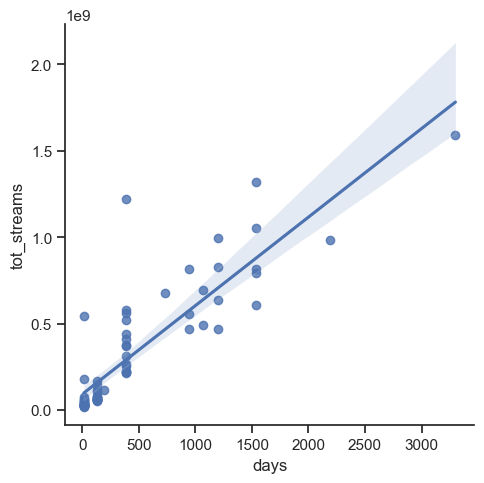

In [240]:
# Isolate top songs to view correlation between total streams and days for just top songs group

catplot_days_streams_high_stream_songs = sns.lmplot(x = 'days', y = 'tot_streams', data = top_stream_songs_corr)

In [241]:
# Export viz

catplot_days_streams_high_stream_songs.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_days_streams_high_stream_songs.png'))

In [242]:
# Get corref

In [243]:
song_stream_alb['tot_streams_group'].value_counts(dropna=False)

tot_streams_group
Medium total streams    143
Low total streams        71
High total streams       71
Name: count, dtype: int64

In [244]:
not_top_streams = song_stream_alb.loc[song_stream_alb['tot_streams_group'].isin(['Low total streams', 'Medium total streams'])]

In [245]:
not_top_streams['tot_streams_group'].value_counts(dropna=False)

tot_streams_group
Medium total streams    143
Low total streams        71
Name: count, dtype: int64

In [246]:
not_top_streams.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre'],
      dtype='object')

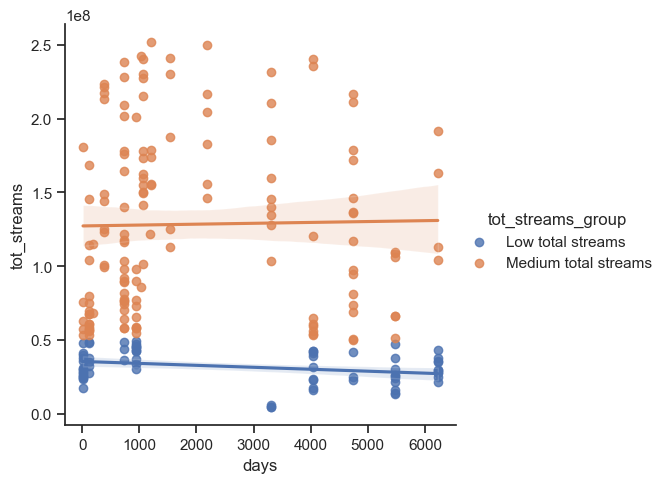

In [247]:
# Compare to spotify play groups

catplot_days_streams_not_top_songs = sns.lmplot(x = 'days', y = 'tot_streams', hue= 'tot_streams_group', data = not_top_streams)

In [248]:
# Export viz

catplot_days_streams_not_top_songs.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'catplot_days_streams_not_top_songs.png'))

## Observations: Top streaming songs show a strong positive correlation between total spotify streams and days. On the other hand, low and middle streaming songs show almost no correlation to days since album release.
This alludes to the idea that overt time, Taylor’s top songs have higher stream counts than prior years. This potentially speaks to a widening fan base. On the other hand, songs that have a middle and low stream count do not show a pattern in the impact of streams across time. This is a key relationship to focus on. 

## Hypothesis: The more days that pass since an album is released, songs with higher total streams will have a wider spread between the top songs and remainder of the album songs. 

## Categorical plot (merging info from song_stream_alb and top_songs
## Focus variables: days and tot_streams (with a hue of top song)

In [249]:
song_stream_alb.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre'],
      dtype='object')

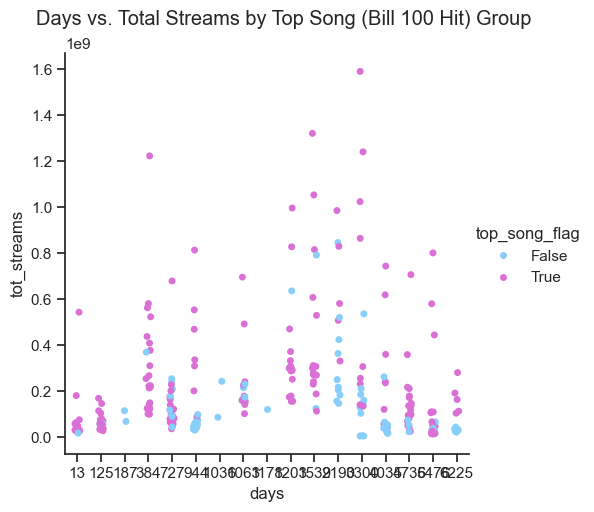

In [250]:
# Create a catplot show the relationship between days and total streams, colored by top song (whether or not a song made the Billbaord Hot 100)

cat_plot_days_streams_top_song_group = sns.catplot(x='days', y='tot_streams', palette=sns.color_palette(['lightskyblue', 'orchid']), hue='top_song_flag', data=song_stream_alb)

cat_plot_days_streams_top_song_group.fig.suptitle("Days vs. Total Streams by Top Song (Bill 100 Hit) Group", y=1.02) 

plt.show()

## Observations: Songs that make the Billboard Hot 100 have a higher total streams count over time than songs that do not. 

In [251]:
# Export viz

cat_plot_days_streams_top_song_group.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_plot_days_streams_top_song_group.png'))

# 08. Prepare alb_aggs dataframe

Dataframe already cleaned, but reviewing df after wrangling and merges

## This dataframe has all of the song characteristics aggregated as medians (to help control for outliers), grouped by album. It will allow for direct album comparisons in terms of what each albums song characteristics are as well as album performance success measures.

In [252]:
alb_aggs.shape

(14, 27)

In [253]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [254]:
alb_aggs['album_id'].value_counts(dropna=False)

album_id
1989       1
1989TV     1
DEBUT      1
EVER       1
FEAR       1
FEARTV     1
FOLK       1
LOVE       1
MIDN       1
RED        1
REDTV      1
REP        1
SPEAK      1
SPEAKTV    1
Name: count, dtype: int64

In [255]:
# Add for lop for album genre to the alb_aggs df

alb_aggs_alb_genre = []

for value in alb_aggs['album_id']:
    if value == "1989":
        alb_aggs_alb_genre.append("Synth/Dream/Dance pop")
    elif value == "DEBUT":
        alb_aggs_alb_genre.append("Country pop")
    elif value == "REP":
        alb_aggs_alb_genre.append("Synth/Dream/Dance pop")
    elif value == "FEAR":
        alb_aggs_alb_genre.append("Country pop")
    elif value == "LOVE":
        alb_aggs_alb_genre.append('Synth/Dream/Dance pop')
    elif value == "SPEAK":
        alb_aggs_alb_genre.append("Pop rock")
    elif value == "RED":
        alb_aggs_alb_genre.append("Pop rock")
    elif value == "FOLK":
        alb_aggs_alb_genre.append("Alternative/Folk/Indie")
    elif value == "EVER":
        alb_aggs_alb_genre.append("Alternative/Folk/Indie")
    elif value == "FEARTV":
        alb_aggs_alb_genre.append("Country pop")
    elif value == "REDTV":
        alb_aggs_alb_genre.append("Pop rock")
    elif value == "MIDN":
        alb_aggs_alb_genre.append("Synth/Dream/Dance pop")
    elif value == "SPEAKTV":
        alb_aggs_alb_genre.append("Pop rock")
    elif value == "1989TV":
        alb_aggs_alb_genre.append("Synth/Dream/Dance pop")
    else:
        alb_aggs_alb_genre.append("unknown")

In [256]:
alb_aggs['genre'] = alb_aggs_alb_genre

In [257]:
alb_aggs['genre'].value_counts(dropna=False)

genre
Synth/Dream/Dance pop     5
Pop rock                  4
Country pop               3
Alternative/Folk/Indie    2
Name: count, dtype: int64

In [258]:
alb_aggs.head()

album_id                      album_title                tv  alb_num  \
0     1989            1989 (Deluxe Edition)          original      5.0   
1   1989TV  1989 (Taylor's Version)[Deluxe]  Taylor's Version     14.0   
2    DEBUT                            Debut          original      1.0   
3     EVER        evermore (deluxe version)          original      9.0   
4     FEAR        Fearless Platinum Edition          original      2.0   

   alb_track_cnt  w1_trad_album_sales  tot_alb_plays  alb_streams_norm  \
0           19.0            1297000.0     7274954212           2204522   
1           22.0            1359000.0     1462293896         112484136   
2           15.0              39000.0     1164903748            187127   
3           17.0             154500.0     3801516966           3584268   
4           19.0             592300.0     2590571504            473068   

   avg_song_pop  top_s_cnt  ...  dance_m  ener_m  instru_m  live_m  loud_m  \
0     67.157895        5.0  ...    0.633  0.6920  0.000006  0.1180  -6.104   
1     79.818182       14.0  ...    0.610  0.6785  0.000010  0.1135  -6.483   
2     63.133333        1.0  ...    0.576  0.6720  0.000000  0.1280  -4.931   
3     72.764706        9.0  ...    0.546  0.5170  0.000066  0.1140 -10.381   
4     45.947368        2.0  ...    0.592  0.6360  0.000000  0.1130  -4.993   

   speech_m    temp_m  val_m     dur_m                   genre  
0    0.0549  119.9970  0.495  220440.0   Synth/Dream/Dance pop  
1    0.0442  118.0225  0.374  224955.0   Synth/Dream/Dance pop  
2    0.0293  115.0280  0.428  213053.0             Country pop  
3    0.0377  122.0790  0.354  245026.0  Alternative/Folk/Indie  
4    0.0308  118.9820  0.307  244240.0             Country pop  

[5 rows x 28 columns]

In [259]:
alb_aggs.dtypes

album_id                object
album_title             object
tv                      object
alb_num                float64
alb_track_cnt          float64
w1_trad_album_sales    float64
tot_alb_plays            int64
alb_streams_norm         int64
avg_song_pop           float64
top_s_cnt              float64
top_alb_count          float64
top_alb_normal         float64
days_sr                float64
alb_ann_day            float64
alb_ann_yr             float64
alb_r_day              float64
alb_r_yr               float64
acou_m                 float64
dance_m                float64
ener_m                 float64
instru_m               float64
live_m                 float64
loud_m                 float64
speech_m               float64
temp_m                 float64
val_m                  float64
dur_m                  float64
genre                   object
dtype: object

## Create a flag for Taylor's Version

In [260]:
alb_aggs['tv'].value_counts(dropna=False)

tv
original            10
Taylor's Version     4
Name: count, dtype: int64

In [261]:
# Assign flag value 

alb_aggs['tvflag'] = alb_aggs['tv'] == "Taylor's Version"

In [262]:
# check value update

alb_aggs['tvflag'].value_counts(dropna=False)

tvflag
False    10
True      4
Name: count, dtype: int64

## Check for missing values

In [263]:
# Check for missing values 

alb_aggs.isnull().sum()

album_id               0
album_title            0
tv                     0
alb_num                0
alb_track_cnt          0
w1_trad_album_sales    0
tot_alb_plays          0
alb_streams_norm       0
avg_song_pop           0
top_s_cnt              0
top_alb_count          0
top_alb_normal         0
days_sr                0
alb_ann_day            0
alb_ann_yr             0
alb_r_day              0
alb_r_yr               0
acou_m                 0
dance_m                0
ener_m                 0
instru_m               0
live_m                 0
loud_m                 0
speech_m               0
temp_m                 0
val_m                  0
dur_m                  0
genre                  0
tvflag                 0
dtype: int64

## Check for duplicates

In [264]:
# Check for duplicates 

alb_aggs_dup = alb_aggs[alb_aggs.duplicated()]

In [265]:
alb_aggs_dup.shape

(0, 29)

## Check for mixed type data

In [266]:
# check for mixed type data

for col in alb_aggs.columns.tolist():
      weird = (alb_aggs[[col]].applymap(type) != alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (alb_aggs[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3816479495.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (alb_aggs[[col]].applymap(type) != alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3816479495.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (alb_aggs[[col]].applymap(type) != alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3816479495.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (alb_aggs[[col]].applymap(type) != alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3816479495.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (alb_aggs[[col]].applymap(type) != alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppDa

# 09. Exploring Relationships: alb_aggs
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

## Correlations

In [267]:
# Check for numeric values

alb_aggs_num = alb_aggs.select_dtypes(include='number')

In [268]:
alb_aggs_num.columns

Index(['alb_num', 'alb_track_cnt', 'w1_trad_album_sales', 'tot_alb_plays',
       'alb_streams_norm', 'avg_song_pop', 'top_s_cnt', 'top_alb_count',
       'top_alb_normal', 'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr', 'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m',
       'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [269]:
# Create a dataframe with all numeric values and taylor's version boolean

alb_aggs_num = alb_aggs[['tvflag','alb_num', 'alb_track_cnt', 'w1_trad_album_sales', 'tot_alb_plays',
       'alb_streams_norm', 'avg_song_pop', 'top_s_cnt', 'top_alb_count',
       'top_alb_normal', 'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day',
       'alb_r_yr', 'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m',
       'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m']]

In [270]:
alb_aggs_num.shape

(14, 25)

In [271]:
alb_aggs_num.corr()

tvflag   alb_num  alb_track_cnt  w1_trad_album_sales  \
tvflag               1.000000  0.706018       0.725702            -0.198144   
alb_num              0.706018  1.000000       0.540823             0.046707   
alb_track_cnt        0.725702  0.540823       1.000000            -0.048123   
w1_trad_album_sales -0.198144  0.046707      -0.048123             1.000000   
tot_alb_plays       -0.436842  0.030352      -0.146049             0.319615   
alb_streams_norm     0.473630  0.565496       0.169458             0.395783   
avg_song_pop         0.401033  0.678014       0.007728            -0.056599   
top_s_cnt            0.706018  1.000000       0.540823             0.046707   
top_alb_count       -0.634063 -0.779003      -0.519898             0.103164   
top_alb_normal       0.192520  0.628949       0.188616            -0.112393   
days_sr             -0.574416 -0.957306      -0.435996            -0.046464   
alb_ann_day         -0.399317 -0.076402      -0.174342             0.144359   
alb_ann_yr           0.583039  0.956037       0.438934             0.035107   
alb_r_day           -0.320970 -0.177810      -0.217413             0.353835   
alb_r_yr             0.583039  0.956037       0.438934             0.035107   
acou_m              -0.350767  0.117815      -0.324078            -0.308316   
dance_m             -0.344387 -0.047381      -0.101960             0.515009   
ener_m               0.285891 -0.252604       0.055723             0.110550   
instru_m            -0.362132  0.154080      -0.174131            -0.022941   
live_m               0.164758 -0.065638      -0.083017            -0.070105   
loud_m               0.300365 -0.349720       0.114363            -0.000761   
speech_m            -0.291726  0.185247      -0.267742             0.547089   
temp_m               0.359125  0.067341       0.118933            -0.125851   
val_m                0.102064 -0.249831       0.051598            -0.129859   
dur_m                0.373398  0.075594       0.249605            -0.194857   

                     tot_alb_plays  alb_streams_norm  avg_song_pop  top_s_cnt  \
tvflag                   -0.436842          0.473630      0.401033   0.706018   
alb_num                   0.030352          0.565496      0.678014   1.000000   
alb_track_cnt            -0.146049          0.169458      0.007728   0.540823   
w1_trad_album_sales       0.319615          0.395783     -0.056599   0.046707   
tot_alb_plays             1.000000         -0.291428      0.333546   0.030352   
alb_streams_norm         -0.291428          1.000000      0.330374   0.565496   
avg_song_pop              0.333546          0.330374      1.000000   0.678014   
top_s_cnt                 0.030352          0.565496      0.678014   1.000000   
top_alb_count             0.365132         -0.515389     -0.309333  -0.779003   
top_alb_normal            0.644289         -0.087048      0.735404   0.628949   
days_sr                  -0.255029         -0.426100     -0.768557  -0.957306   
alb_ann_day               0.595585         -0.192337      0.131588  -0.076402   
alb_ann_yr                0.252380          0.418812      0.769116   0.956037   
alb_r_day                 0.023782          0.374842     -0.162896  -0.177810   
alb_r_yr                  0.252380          0.418812      0.769116   0.956037   
acou_m                    0.227896         -0.151359      0.106810   0.117815   
dance_m                   0.735224          0.067892      0.225711  -0.047381   
ener_m                   -0.468110          0.170095     -0.165769  -0.252604   
instru_m                  0.190991         -0.010877      0.003569   0.154080   
live_m                   -0.312979         -0.121543      0.023270  -0.065638   
loud_m                   -0.564477         -0.029847     -0.323246  -0.349720   
speech_m                  0.753538          0.108866      0.508823   0.185247   
temp_m                   -0.326836         -0.113319      0.046177   0.067341   
val_m                   

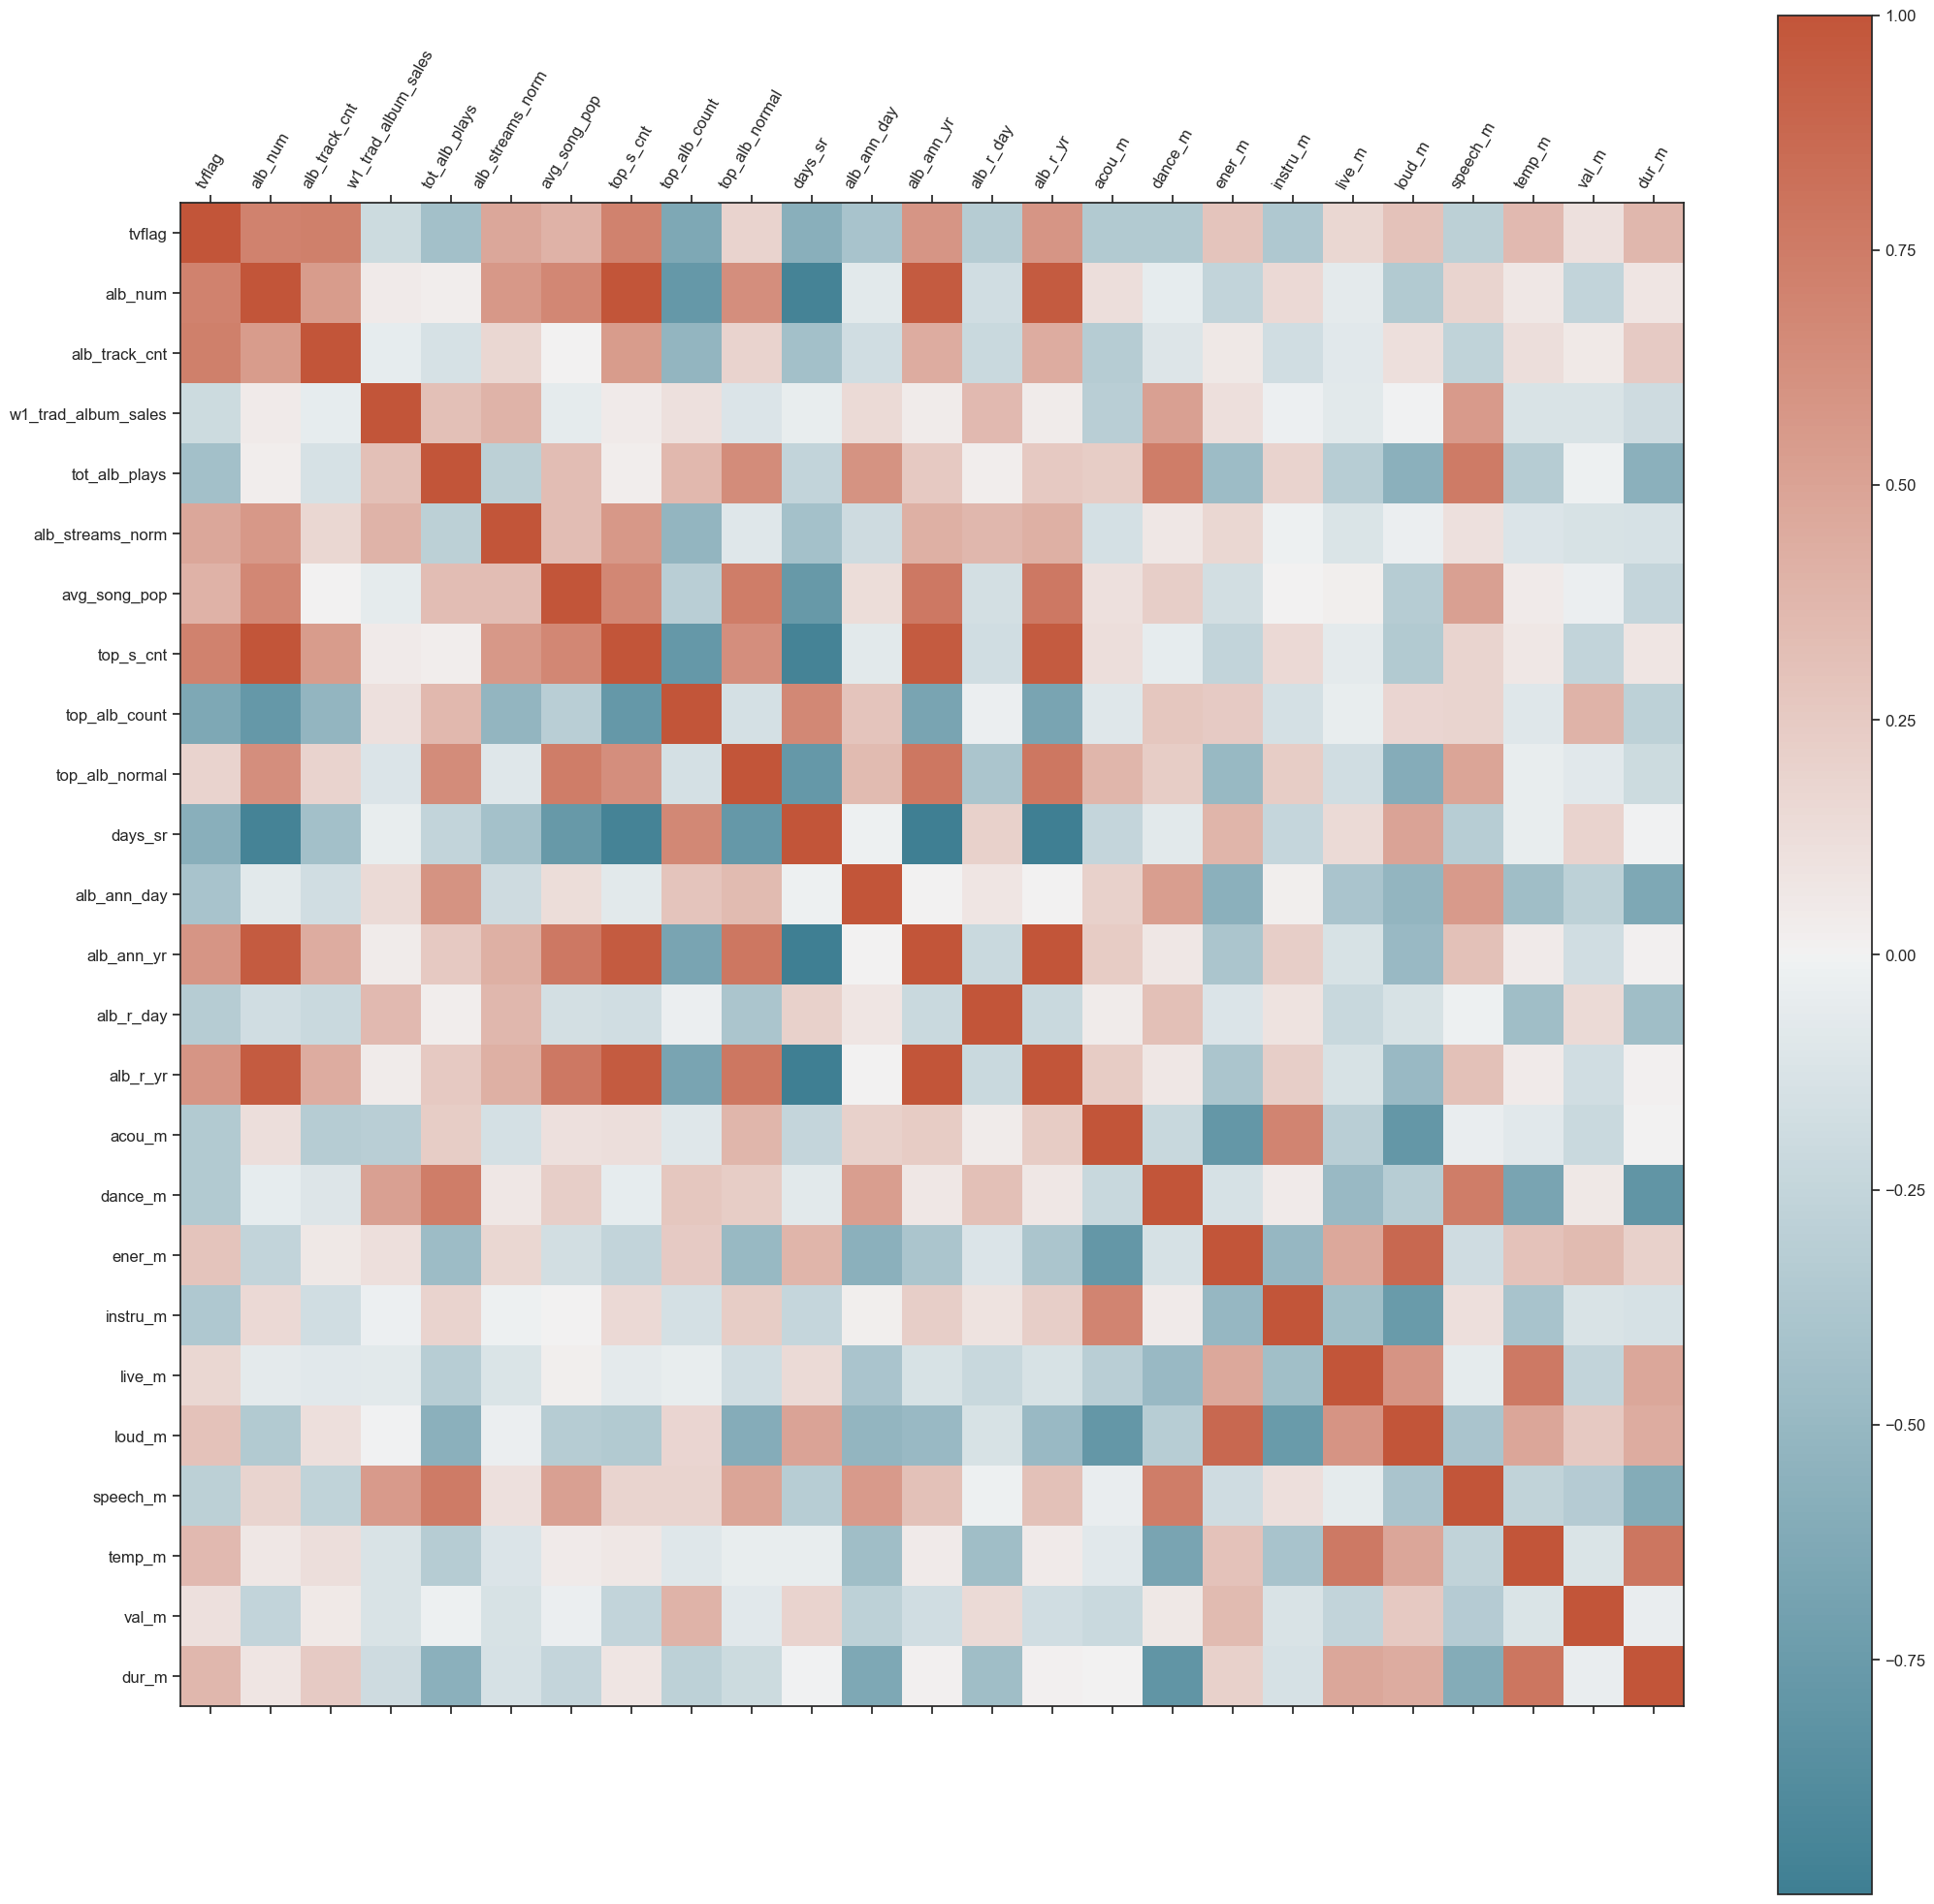

In [272]:
# Create correlation matrix with matplotlib

f = plt.figure(figsize=(25, 25)) 

cmap = sns.diverging_palette(220, 20, as_cmap=True) 

alb_aggs_corrmat = plt.matshow(alb_aggs_num.corr(), fignum=f.number, cmap=cmap) 

plt.xticks(range(alb_aggs_num.shape[1]), alb_aggs_num.columns, fontsize=12, rotation=60) 
plt.yticks(range(alb_aggs_num.shape[1]), alb_aggs_num.columns, fontsize=12) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=12) 

plt.show()

In [273]:
# Save figure

alb_aggs_corrmat.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_aggs_corrmat.png'))

In [274]:
alb_aggs_num.columns

Index(['tvflag', 'alb_num', 'alb_track_cnt', 'w1_trad_album_sales',
       'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop', 'top_s_cnt',
       'top_alb_count', 'top_alb_normal', 'days_sr', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m', 'dance_m', 'ener_m',
       'instru_m', 'live_m', 'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [275]:
# Isolate just to look at sound characteristics

alb_aggs_sound = alb_aggs_num[['alb_num', 'tvflag','alb_track_cnt',  'days_sr', 'alb_ann_day', 'alb_r_day',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m',
       'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m']]

In [276]:
alb_aggs_sound.shape

(14, 16)

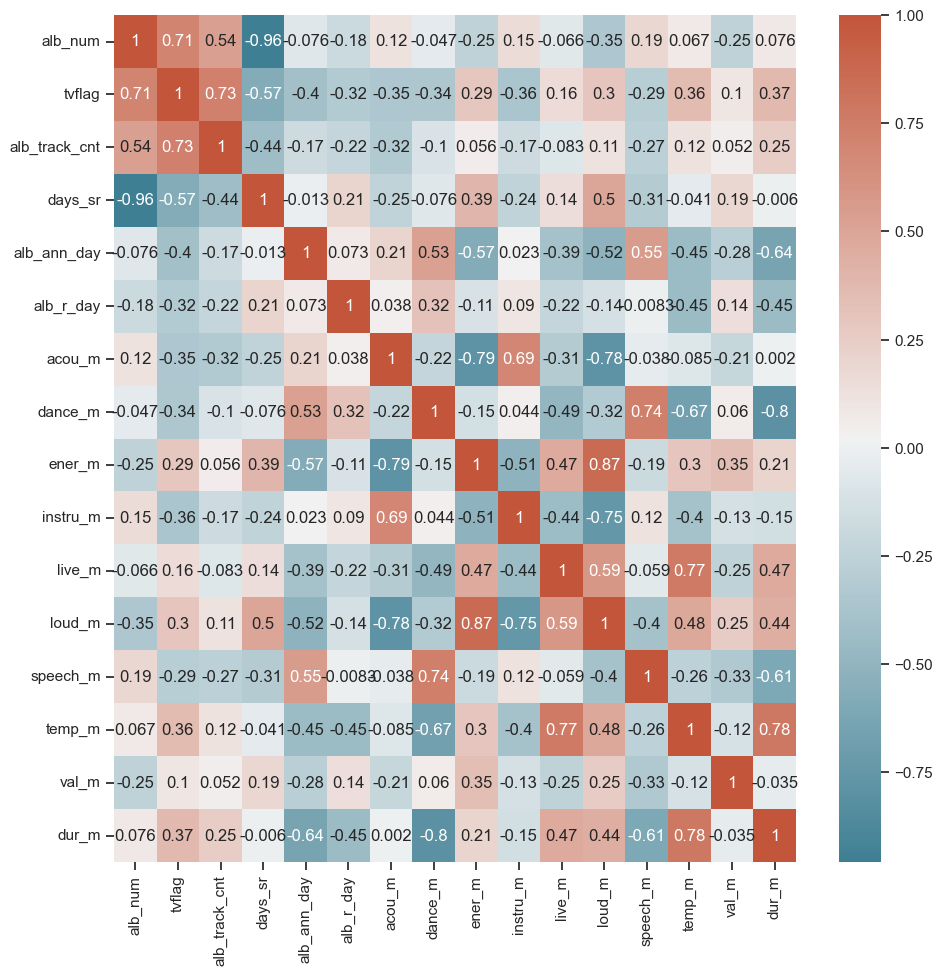

In [277]:
# Create heatmap of alb_aggs_sound measures

f,ax = plt.subplots(figsize=(11,11))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

alb_aggs_sound_heatmap = sns.heatmap(alb_aggs_sound.corr(), annot = True, cmap=cmap, ax = ax) 

## Observations: Generally speaking, there are more patterns within the song characteristics when utilizing the median values of each album. Part of this is because the median calculation smooths out the data.

dur_m and alb_ann_day -0.64
dur_m and dance_m -.8

An interesting pattern is between the alb_track_cnt and alb_num 0.54

album_track_cnt and alb_num 0.54

There are strong relationships between taylor's versions and track_cnt and alb_number, and moderate relationships between taylor's versions and album announcement day, song duration median, and song tempo median.



In [278]:
# Save figure

alb_aggs_sound_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_aggs_sound_heatmap'))

In [279]:
# Subset to look at album performance

alb_aggs_perform = alb_aggs[['alb_num', 'tvflag', 'days_sr', 'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm', 'top_s_cnt', 'top_alb_count','top_alb_normal']]

In [280]:
# Check subset
alb_aggs_perform

alb_num  tvflag      days_sr  w1_trad_album_sales  tot_alb_plays  \
0       5.0   False  3300.000000            1297000.0     7274954212   
1      14.0    True    13.000000            1359000.0     1462293896   
2       1.0   False  6225.000000              39000.0     1164903748   
3       9.0   False  1059.823529             154500.0     3801516966   
4       2.0   False  5476.000000             592300.0     2590571504   
5      10.0    True   944.000000             179000.0     3776863210   
6       8.0   False  1201.529412             615000.0     6156253069   
7       7.0   False  1539.000000             679000.0     8029477011   
8      12.0   False   366.869565            1140000.0     7116052008   
9       4.0   False  4035.000000            1208000.0     3204011914   
10     11.0    True   727.000000             369000.0     4062936014   
11      6.0   False  2190.000000            1216000.0     6546494144   
12      3.0   False  4736.000000            1047000.0     2985801592   
13     13.0    True   125.000000             507000.0     1524439730   

    alb_streams_norm  top_s_cnt  top_alb_count  top_alb_normal  
0            2204522        5.0          464.0        0.140606  
1          112484136       14.0            1.0        0.076923  
2             187127        1.0          284.0        0.045622  
3            3584268        9.0          151.0        0.142486  
4             473068        2.0          261.0        0.047663  
5            4000902       10.0          121.0        0.128178  
6            5119556        8.0          171.0        0.142322  
7            5217324        7.0          219.0        0.142300  
8           19032283       12.0           54.0        0.153507  
9             794044        4.0          185.0        0.045849  
10           5588619       11.0          103.0        0.141678  
11           2989259        6.0          267.0        0.121918  
12            630440        3.0          193.0        0.040752  
13          12195506       13.0           17.0        0.136000

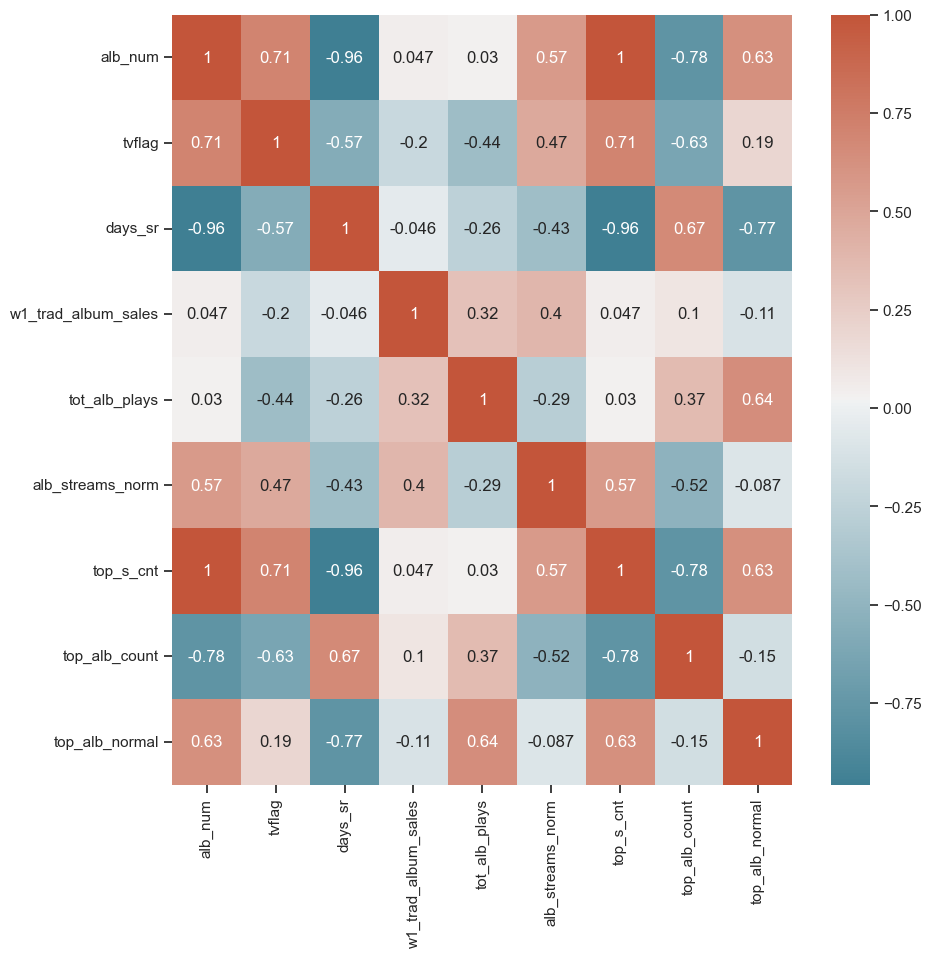

In [281]:
# Create heatmap of alb_aggs_sound measures

f,ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

alb_aggs_perform_heatmap = sns.heatmap(alb_aggs_perform.corr(), annot = True, cmap=cmap, ax = ax) 

## Observations:
w1_trad_alb_sales are hard to pin down, with a weak corr to albm_num (0.047). Strongest correlations are tot_alb_plays (0.32)and alb_streams norm (0.4)
biggest tot_alb_plays is wk1_trad_album sales (0.32)
albu_streams_norm and alb_num show increase in streaming popularity 0.57
alb_numb and tot_alb_plays is interesting (not strongly negative as in a time factor)
Want to run alb_streams_norm and tot_alb plays to find outliers 

Taylor's versions have relationships with
tv_flag and top song counts 0.71 (TVs beat out time for song counts)
tv_flag and tot_alb_plays -0.44 BUT
tv_flag and alb_streams_norm 0.47  (time is a factor for TVs album stats)


In [282]:
alb_aggs_perform.describe()

alb_num      days_sr  w1_trad_album_sales  tot_alb_plays  \
count  14.0000    14.000000         1.400000e+01   1.400000e+01   
mean    7.5000  2281.301608         7.429857e+05   4.264041e+09   
std     4.1833  2089.883614         4.620321e+05   2.339917e+09   
min     1.0000    13.000000         3.900000e+04   1.164904e+09   
25%     4.2500   781.250000         4.035000e+05   2.689379e+09   
50%     7.5000  1370.264706         6.470000e+05   3.789190e+09   
75%    10.7500  3851.250000         1.191000e+06   6.448934e+09   
max    14.0000  6225.000000         1.359000e+06   8.029477e+09   

       alb_streams_norm  top_s_cnt  top_alb_count  top_alb_normal  
count      1.400000e+01    14.0000      14.000000       14.000000  
mean       1.246436e+07     7.5000     177.928571        0.107557  
std        2.924327e+07     4.1833     121.552435        0.044787  
min        1.871270e+05     1.0000       1.000000        0.040752  
25%        1.146664e+06     4.2500     107.500000        0.054978  
50%        3.792585e+06     7.5000     178.000000        0.132089  
75%        5.495795e+06    10.7500     250.500000        0.142145  
max        1.124841e+08    14.0000     464.000000        0.153507

In [283]:
# Save figure

alb_aggs_perform_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_aggs_perform_heatmap.png'))

## To subplot: 
dur_m and alb_ann_day -0.64
dur_m and dance_m -.8
dur_m and temp_m 0.78
album_track_cnt and alb_num 0.54

top_s_cnt and alb_num 1.0
days_sr and top_alb_normal -.77
album_track_cnt and alb_num 0.54
top_s_cnt and tot_alb_plays 0.03 (why so low?)
top_s_cnt and alb_streams_norm 0.565496
top_s_cnt and top_alb_count -.78 

tv_flag and top_s_cnt 0.71
tv_flag and alb_ann_day -.40
tv_flag and track_cnt 0.73

## Observations: top_s_cnt and alb_num are 100% correlated. This is significant! 
top_s_cnt and top_alb_count -.78 (because top_alb_counts take more time to accumulate and she has the most top songs with the most recent albums?)

In [284]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'genre', 'tvflag'],
      dtype='object')

## Very curious to identify characteristics of top vs low performing albums

In [285]:
# Create a subplot with measures of success related to song characteristics

alb_aggs_song_perf = alb_aggs[['alb_num', 'tvflag', 'w1_trad_album_sales', 'alb_streams_norm', 'tot_alb_plays', 'top_alb_normal','alb_track_cnt', 'speech_m', 'dance_m', 'acou_m', 'dur_m', 'loud_m', 'ener_m','alb_ann_day','alb_r_day']]

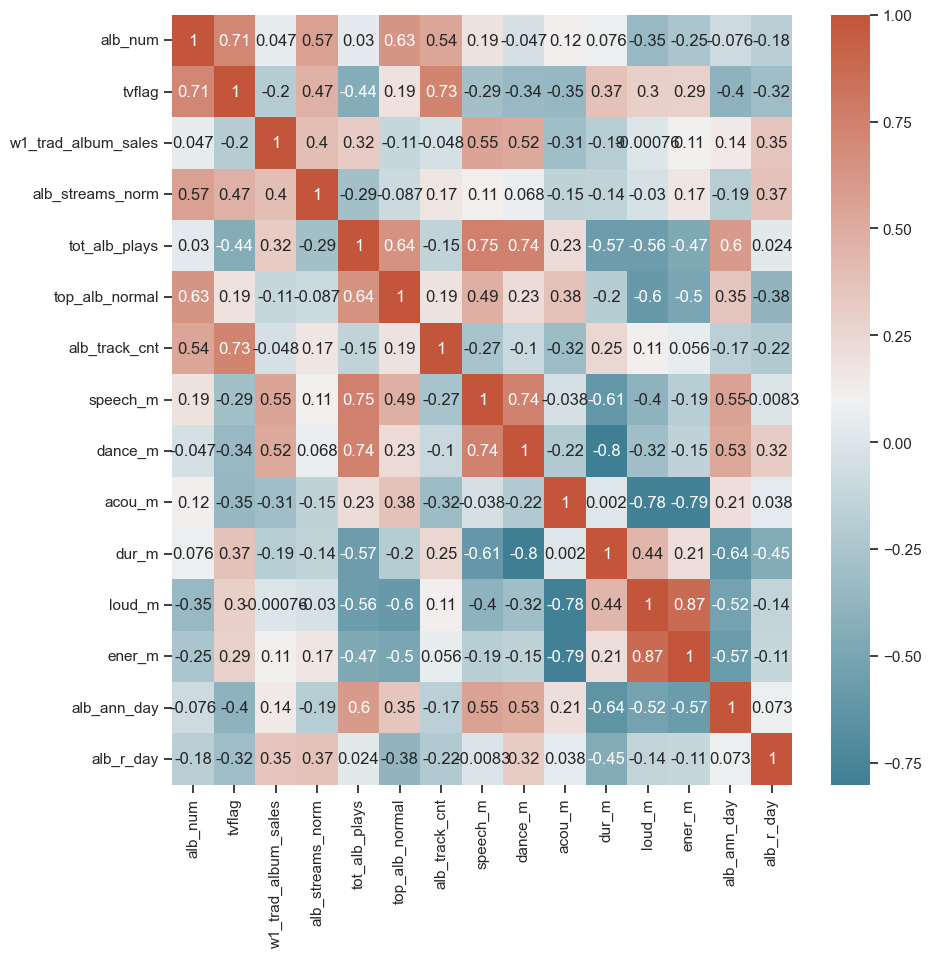

In [286]:
# Create heatmap of alb_aggs_song_perf

f,ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(2020, 20, as_cmap=True) 

alb_aggs_song_perf_heatmap = sns.heatmap(alb_aggs_song_perf.corr(), annot = True, cmap=cmap, ax = ax) 

In [287]:
# Save figure

alb_aggs_song_perf_heatmap.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_aggs_song_perf_heatmap.png'))

## Observation highlights from heatmap

Album announcement day has correlations with total album streams. Album release day has correlations with both week one album sales and normalized album streams.

Speech and dance are the top two song characteristics for both album sales and total album plays. 

The duration is unexpectedly correlated with the album announcement day and album release day. The album announcement day and total album plays are strongly correlated. 

Speech is the strongest positive correlation for top album counts normalized, while loud is the top negative correlation for top album counts normalized. 

Curiously, album track count has a weak correlation (-.15) with total album plays (-.15) and week one traditional album sales (-0.05), which both could be assumed more related to the number of tracks in an album since they are sums. 

The album number (which reps both the album and also order of release) has the strongest correlations with the normalized top album count and the album track counts, but has almost no (-.047) correlation to week one sales. I imagine there are outliers with sales based on album number.

Album number is a good way to measure evolution across time. The greatest changes in song characteristics appear to be loudness (-.35) and valence (-0.25). Time related characteristics can be saved for time analysis.

## In order of correlations for total album plays:

total album plays and speech_m 0.7

total album plays and dance_m 0.74

total album plays and top_album_count normalized 0.64

total album plays and alb_ann_day 0.6

total album plays and duration -.57

total album plays and loudness -0.56

total album plays and tvflag -.44 (but normalizied 0.47

total album plays  and wk1 sales 0.4

total album plays and alb_num .03 is interesting (not strongly negative w/time factor)

It is very interesting that none of time related factors have the highest correlations with total album plays.


## Taylor's Versions highlights

tv_flag and alb_streams_norm 0.47

tv_flag and top_s_cnt 0.71 (TV beats out time for song stats)

tv_flag and track_cnt 0.73

tv_flag and alb_num 0.71

tv_flag and tot_alb_plays -0.44 BUT

tv_flag and alb_streams_norm 0.47  (time is a factor for TVs alb stats)

tv_flag and alb_ann_day -.40

tv_flag and wk1_trad_album_sales -0.20


## Week 1 traditional album sales 
w1_trad_alb_sales are hard to pin down

weak corr to albm_num (0.047)

wk1_trad_album_sales and alb_streams norm (0.4)

wk1_trad_album_sales and tot_alb_plays (0.32)


## Album streams normalized

albu_streams_norm and alb_num 0.63 could show increase in streaming popularity

Want to run alb_streams_norm and tot_alb plays to find outliers 

In [288]:
alb_aggs.describe()

alb_num  alb_track_cnt  w1_trad_album_sales  tot_alb_plays  \
count  14.0000      14.000000         1.400000e+01   1.400000e+01   
mean    7.5000      20.357143         7.429857e+05   4.264041e+09   
std     4.1833       4.199032         4.620321e+05   2.339917e+09   
min     1.0000      15.000000         3.900000e+04   1.164904e+09   
25%     4.2500      17.250000         4.035000e+05   2.689379e+09   
50%     7.5000      19.500000         6.470000e+05   3.789190e+09   
75%    10.7500      22.000000         1.191000e+06   6.448934e+09   
max    14.0000      30.000000         1.359000e+06   8.029477e+09   

       alb_streams_norm  avg_song_pop  top_s_cnt  top_alb_count  \
count      1.400000e+01     14.000000    14.0000      14.000000   
mean       1.246436e+07     68.778380     7.5000     177.928571   
std        2.924327e+07     12.235594     4.1833     121.552435   
min        1.871270e+05     45.947368     1.0000       1.000000   
25%        1.146664e+06     64.139474     4.2500     107.500000   
50%        3.792585e+06     72.190045     7.5000     178.000000   
75%        5.495795e+06     78.055303    10.7500     250.500000   
max        1.124841e+08     82.933333    14.0000     464.000000   

       top_alb_normal      days_sr  ...     acou_m    dance_m     ener_m  \
count       14.000000    14.000000  ...  14.000000  14.000000  14.000000   
mean         0.107557  2281.301608  ...   0.198339   0.602964   0.598036   
std          0.044787  2089.883614  ...   0.260675   0.046862   0.092321   
min          0.040752    13.000000  ...   0.038600   0.534000   0.376000   
25%          0.054978   781.250000  ...   0.060287   0.568500   0.589250   
50%          0.132089  1370.264706  ...   0.096400   0.598250   0.613500   
75%          0.142145  3851.250000  ...   0.128750   0.631000   0.669875   
max          0.153507  6225.000000  ...   0.830000   0.703500   0.692000   

        instru_m     live_m     loud_m   speech_m      temp_m      val_m  \
count  14.000000  14.000000  14.000000  14.000000   14.000000  14.000000   
mean    0.000013   0.119714  -6.811464   0.042086  120.653000   0.385107   
std     0.000019   0.013587   2.132591   0.014507    8.666150   0.079693   
min     0.000000   0.102000 -10.381000   0.029300  107.013500   0.198000   
25%     0.000000   0.109625  -7.548250   0.031512  115.776625   0.356250   
50%     0.000004   0.116000  -6.460750   0.035325  119.788500   0.389000   
75%     0.000017   0.129500  -5.267000   0.052225  126.808500   0.427625   
max     0.000066   0.147500  -3.932500   0.073200  136.974000   0.495000   

               dur_m  
count      14.000000  
mean   233821.821429  
std     20791.952836  
min    199419.500000  
25%    221568.750000  
50%    236333.250000  
75%    243677.375000  
max    274065.500000  

[8 rows x 24 columns]

## Scatterplots

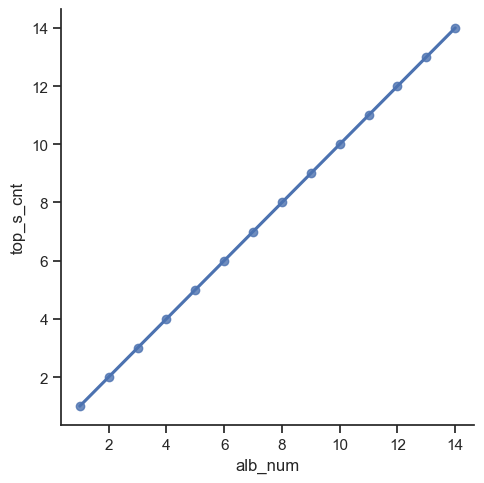

In [289]:
# Create scatterplot to investigate the 1.0 correlation with album number and top billboard song count
# 1.0 correlation (wow!)

scatt_top_s_cnt_alb_num = sns.lmplot(x = 'alb_num', y = 'top_s_cnt', data = alb_aggs)

In [290]:
# Save figure

scatt_top_s_cnt_alb_num.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_top_s_cnt_alb_num.png'))

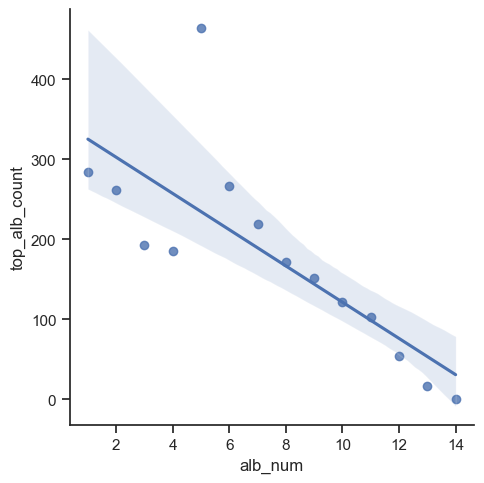

In [291]:
# Create scatterplot of album num and top album count (the number of times the album made the billboard 200)
#  -.78 correlation (why is it negative?)

scatt_alb_num_top_alb_cnt = sns.lmplot(x = 'alb_num', y = 'top_alb_count', data = alb_aggs)

This demonstrates how time is a key factor for top_alb_count

In [292]:
# Save figure

scatt_alb_num_top_alb_cnt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_top_s_cnt_alb_num.png'))

In [293]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'genre', 'tvflag'],
      dtype='object')

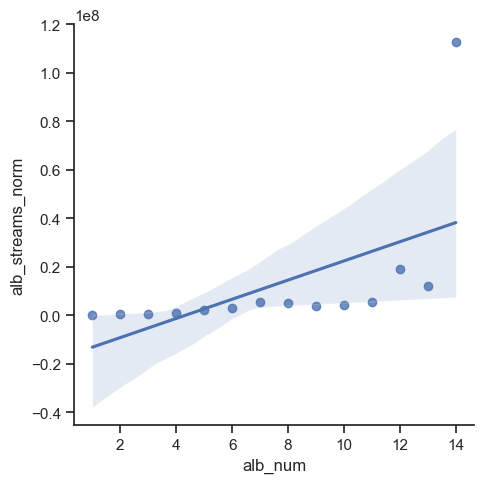

In [294]:
# Create scatterplot  of album streams normalized and album number
# 0.57 correlation
scatt_alb_num_alb_streams_norm = sns.lmplot(x = 'alb_num', y = 'alb_streams_norm', data = alb_aggs)

# major outlier bringing up this relationship (1989TV)

In [295]:
# Save figure

scatt_alb_num_alb_streams_norm .figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_alb_num_alb_streams_norm .png'))

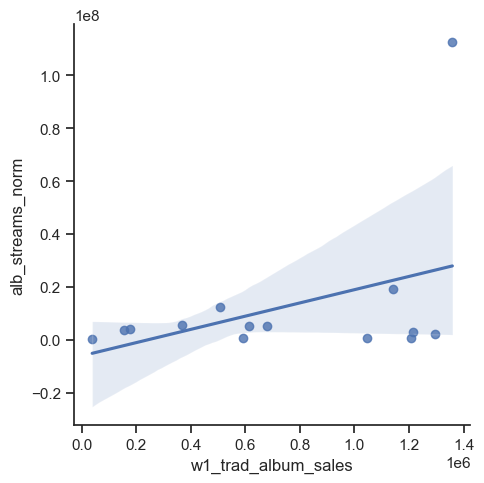

In [296]:
# Create scatterplot of week 1 traditional album sales and album streams normalized 
# 0.4 correlation
scatt_wk1_sales_alb_streams_norm = sns.lmplot(x = 'w1_trad_album_sales', y = 'alb_streams_norm', data = alb_aggs)

In [297]:
# Save figure

scatt_wk1_sales_alb_streams_norm.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_wk1_sales_alb_streams_norm.png'))

In [298]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'genre', 'tvflag'],
      dtype='object')

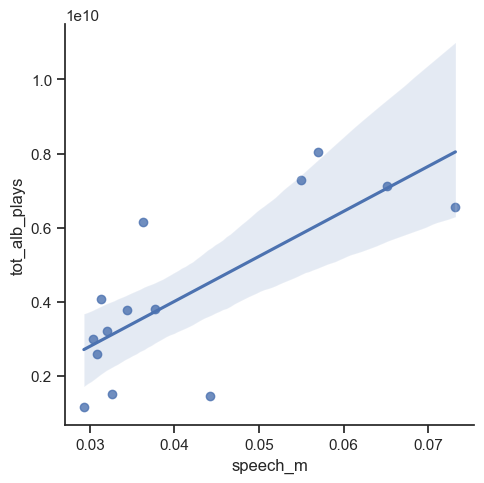

In [299]:
# Create scatterplot of total album plays and speechiness
# 0.7 correlation 

scatt_alb_plays_speech_m= sns.lmplot(x = 'speech_m', y = 'tot_alb_plays', data = alb_aggs)

Outliers present. 

In [300]:
# Save figure

scatt_alb_plays_speech_m.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_alb_plays_speech_m.png'))

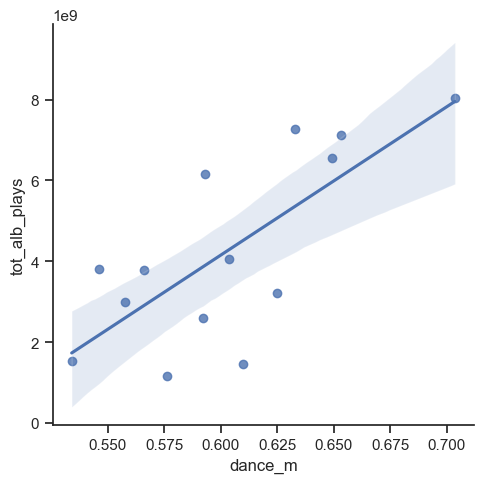

In [301]:
# Create scatterplot of total album plays and danceability
# 0.74 corr coeff

scatt_alb_plays_dance_m = sns.lmplot(x = 'dance_m', y = 'tot_alb_plays', data = alb_aggs)

In [302]:
# Save figure

scatt_alb_plays_dance_m.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_alb_plays_dance_m.png'))

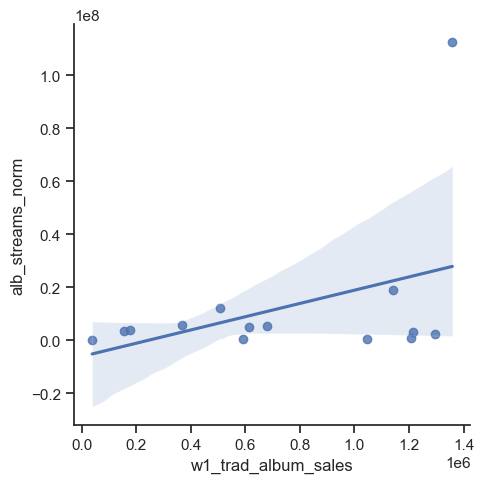

In [303]:
# Create scatterplot of week 1 traditional album sales and album streams normalized
# 0.4 corr coef, potentially higher without outlier

scatt_wk1_alb_sales_alb_streams_norm = sns.lmplot(x = 'w1_trad_album_sales', y = 'alb_streams_norm', data = alb_aggs)

Once again, major outlier is 1989TV. Will use this measure with dataframe at end that directly compares remake albums.

In [304]:
# Save figure

scatt_wk1_alb_sales_alb_streams_norm.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatt_wk1_alb_sales_alb_streams_norm.png'))

## Pair Plots

In [305]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'genre', 'tvflag'],
      dtype='object')

In [306]:
# Checking pair plot for the highest correllations with total album plays to choose focus

tot_alb_plays_sub = alb_aggs[['tot_alb_plays', 'speech_m', 
                              'dance_m', 'top_alb_normal', 'alb_ann_day',
                             'dur_m','loud_m', 'w1_trad_album_sales' ]]

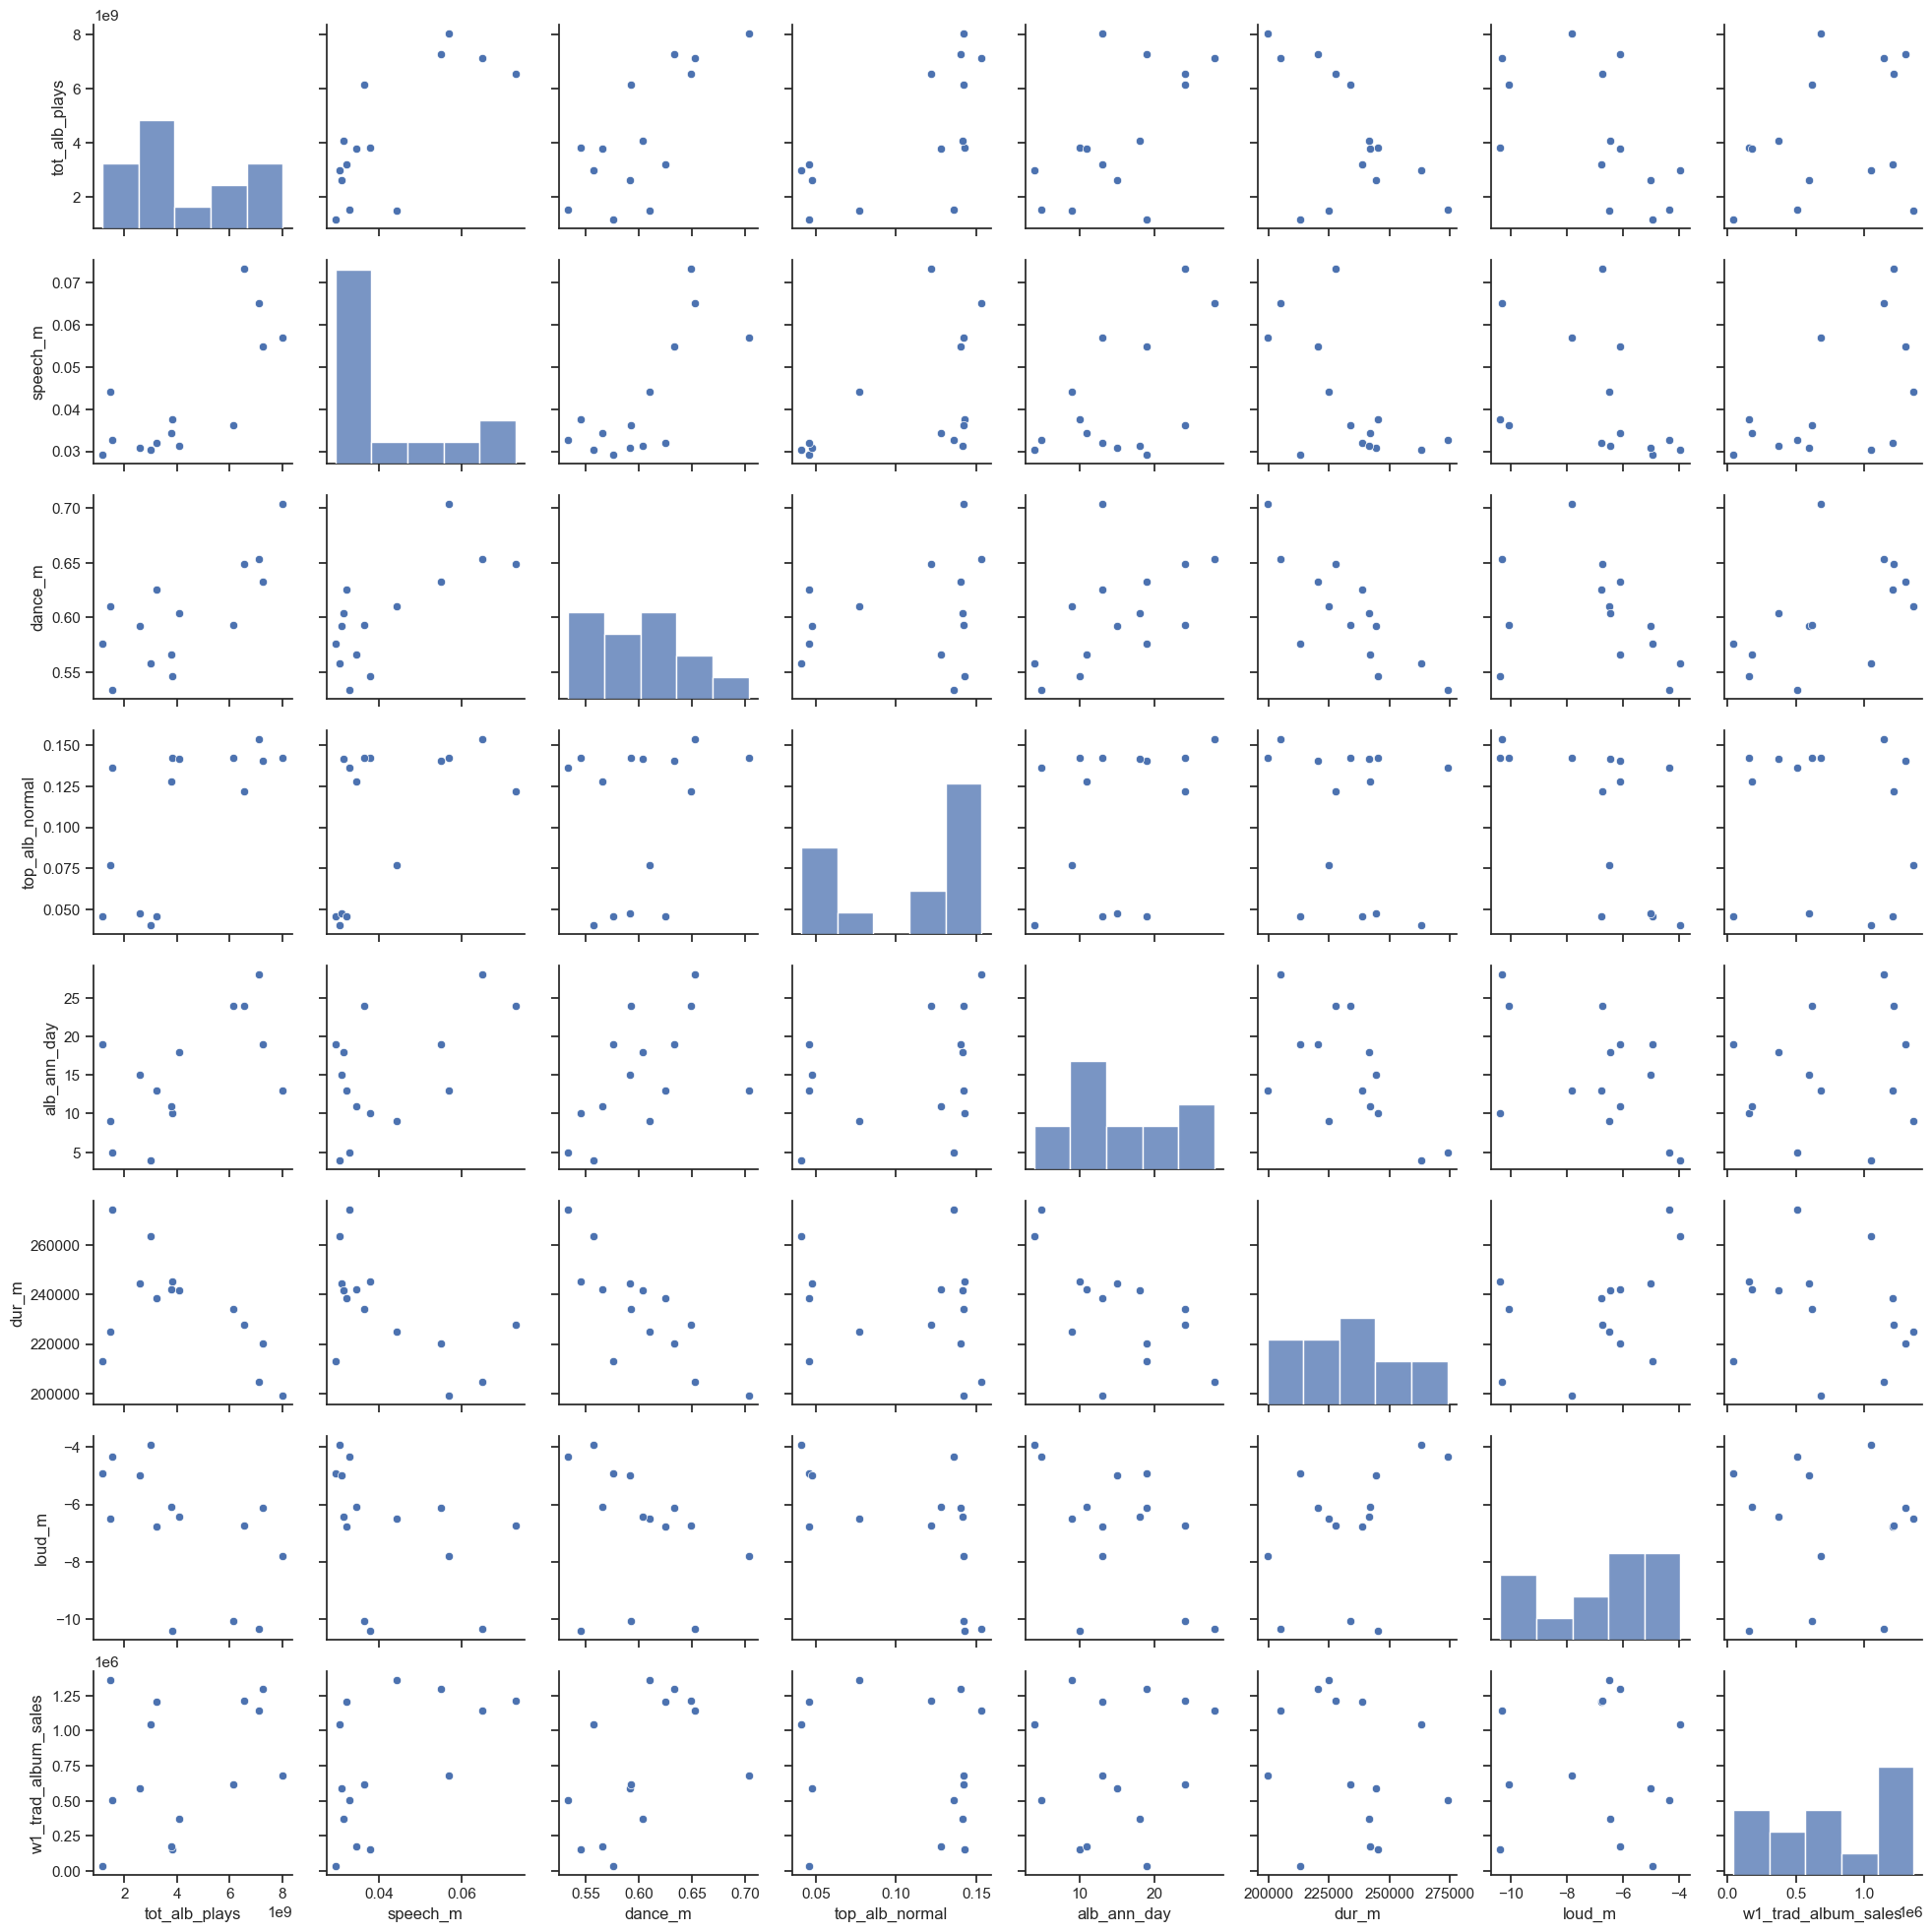

In [307]:
# Make pair plot to focus on total album plays variable

pairplot_tot_alb_plays = sns.pairplot(tot_alb_plays_sub)

In [308]:
# Save figure

pairplot_tot_alb_plays.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'pairplot_tot_alb_plays.png'))

## Categorical Plots

## Focus on speech_m and tot_alb_plays do to clusters

<Axes: xlabel='speech_m', ylabel='Count'>

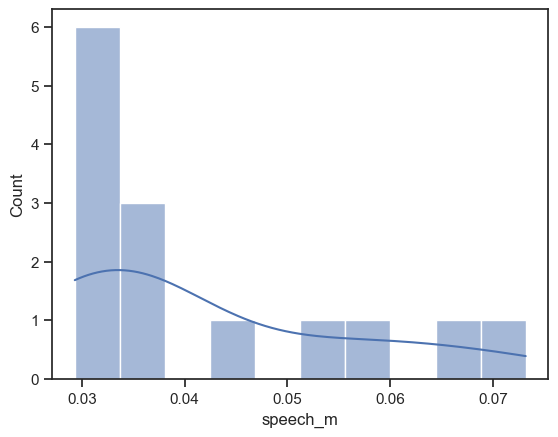

In [309]:
# Create histogram of variable to visualize distribution

sns.histplot(alb_aggs['speech_m'],bins = 10, kde = True)

Observations: Speech is spread into 3 value groups.

In [310]:
# Review distribution

alb_aggs['speech_m'].describe()

count    14.000000
mean      0.042086
std       0.014507
min       0.029300
25%       0.031512
50%       0.035325
75%       0.052225
max       0.073200
Name: speech_m, dtype: float64

In [311]:
alb_aggs.shape

(14, 29)

In [312]:
# Create flag for speechiness_m for albums

alb_aggs.loc[alb_aggs['speech_m'] < 0.031512, 'speech_group'] = 'Low median album speechiness'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\3711819930.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low median album speechiness' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  alb_aggs.loc[alb_aggs['speech_m'] < 0.031512, 'speech_group'] = 'Low median album speechiness'


In [313]:
alb_aggs.loc[(alb_aggs['speech_m'] >= 0.031512) & (alb_aggs['speech_m'] <  0.052225 ), 'speech_group'] = 'Medium median album speechiness'

In [314]:
alb_aggs.loc[alb_aggs['speech_m'] >=  0.052225, 'speech_group'] = 'High median album speechiness'

In [315]:
alb_aggs['speech_group'].value_counts(dropna=False)

speech_group
Medium median album speechiness    6
High median album speechiness      4
Low median album speechiness       4
Name: count, dtype: int64

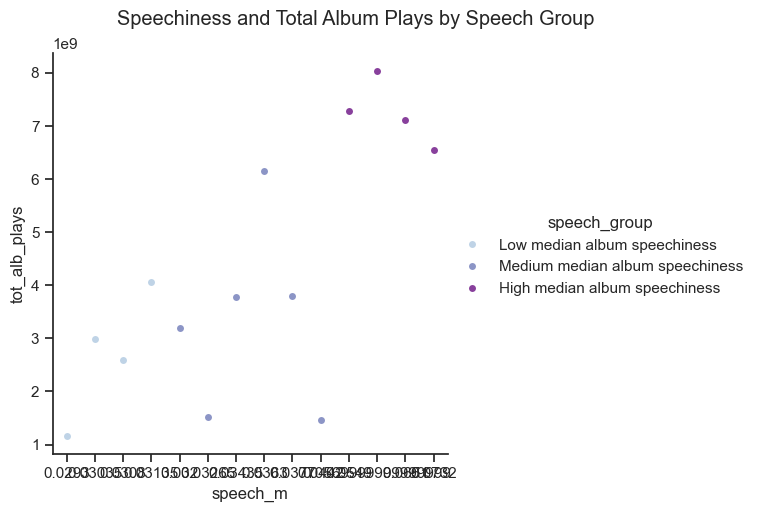

In [316]:
# Create catplot of total album plays and speechiness, using speech groups for color

cat_plot_speech_m_tot_alb_plays_speech_group = sns.catplot(x='speech_m', y='tot_alb_plays', palette='BuPu', hue='speech_group', data=alb_aggs)
cat_plot_speech_m_tot_alb_plays_speech_group.fig.suptitle("Speechiness and Total Album Plays by Speech Group", y=1.02)  # Add a title

plt.show()


In [317]:
# Save figure

cat_plot_speech_m_tot_alb_plays_speech_group.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_plot_speech_m_tot_alb_plays_speech_group.png'))

# 10. Prepare TV vs. their matching originals comparisons

The following albums have original and TV versions. Will allow to compare potential projections

FEAR AND FEARTV
SPEAK AND SPEAKTV
RED and REDTV
1989 AND 1989TV

## All albums for this group: 'FEAR', 'FEARTV', 'SPEAK', 'SPEAKTV', 'RED', 'REDTV', '1989', '1989TV'


I want to explore thet following measures baased on the analysis from above:

## 'tvflag','tot_alb_plays', 'alb_streams_norm', 'w1_trad_album_sales', 'alb_r_day', 'alb_ann_day', 'alb_track_cnt', 'top_s_cnt', 'dance_m', 'speech_m'

In [318]:
alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'genre', 'tvflag',
       'speech_group'],
      dtype='object')

## Add variable for number of vault tracks- these could have big impact on total streams, sales, and correlations with track number

Vault tracks a feature of the “Taylor’s Version” albums. These are tracks that are added as new tracks compared to the original versions, and are placed at the end. Because of the novelty and hype around TV versions, they have a pattern of becoming hits even though they are at the end of the albums. I predict that original versions, therefore, have a much higher correlation between track number and top song.

In [319]:
# Create for loop to assign vault track values

vault_trck_cnt = []

for value in alb_aggs['album_id']:
    if value == "1989":
        vault_trck_cnt.append(0)
    elif value == "DEBUT":
        vault_trck_cnt.append(0)
    elif value == "REP":
        vault_trck_cnt.append(0)
    elif value == "FEAR":
        vault_trck_cnt.append(0)
    elif value == "LOVE":
        vault_trck_cnt.append(0)
    elif value == "SPEAK":
        vault_trck_cnt.append(0)
    elif value == "RED":
        vault_trck_cnt.append(0)
    elif value == "FOLK":
        vault_trck_cnt.append(0)
    elif value == "EVER":
        vault_trck_cnt.append(0)
    elif value == "FEARTV":
        vault_trck_cnt.append(6)
    elif value == "REDTV":
        vault_trck_cnt.append(9)
    elif value == "MIDN":
        vault_trck_cnt.append(0)
    elif value == "SPEAKTV":
        vault_trck_cnt.append(6)
    elif value == "1989TV":
        vault_trck_cnt.append(5)
    else:
        vault_trck_cnt.append("unknown")

In [320]:
alb_aggs['vault_trck_cnt'] = vault_trck_cnt

In [321]:
alb_aggs['vault_trck_cnt'].value_counts(dropna=False) # accurately added

vault_trck_cnt
0    10
6     2
5     1
9     1
Name: count, dtype: int64

In [322]:
alb_aggs.head()

album_id                      album_title                tv  alb_num  \
0     1989            1989 (Deluxe Edition)          original      5.0   
1   1989TV  1989 (Taylor's Version)[Deluxe]  Taylor's Version     14.0   
2    DEBUT                            Debut          original      1.0   
3     EVER        evermore (deluxe version)          original      9.0   
4     FEAR        Fearless Platinum Edition          original      2.0   

   alb_track_cnt  w1_trad_album_sales  tot_alb_plays  alb_streams_norm  \
0           19.0            1297000.0     7274954212           2204522   
1           22.0            1359000.0     1462293896         112484136   
2           15.0              39000.0     1164903748            187127   
3           17.0             154500.0     3801516966           3584268   
4           19.0             592300.0     2590571504            473068   

   avg_song_pop  top_s_cnt  ...  live_m  loud_m  speech_m    temp_m  val_m  \
0     67.157895        5.0  ...  0.1180  -6.104    0.0549  119.9970  0.495   
1     79.818182       14.0  ...  0.1135  -6.483    0.0442  118.0225  0.374   
2     63.133333        1.0  ...  0.1280  -4.931    0.0293  115.0280  0.428   
3     72.764706        9.0  ...  0.1140 -10.381    0.0377  122.0790  0.354   
4     45.947368        2.0  ...  0.1130  -4.993    0.0308  118.9820  0.307   

      dur_m                   genre  tvflag                     speech_group  \
0  220440.0   Synth/Dream/Dance pop   False    High median album speechiness   
1  224955.0   Synth/Dream/Dance pop    True  Medium median album speechiness   
2  213053.0             Country pop   False     Low median album speechiness   
3  245026.0  Alternative/Folk/Indie   False  Medium median album speechiness   
4  244240.0             Country pop   False     Low median album speechiness   

   vault_trck_cnt  
0               0  
1               5  
2               0  
3               0  
4               0  

[5 rows x 31 columns]

In [323]:
# Create new subset dataframe for taylor's version exploring

tv_matching_alb_aggs= alb_aggs[alb_aggs['album_id'].isin(['FEAR', 'FEARTV', 'SPEAK', 'SPEAKTV', 'RED', 'REDTV', '1989', '1989TV'])]

In [324]:
tv_matching_alb_aggs['album_id'].value_counts(dropna=False)

album_id
1989       1
1989TV     1
FEAR       1
FEARTV     1
RED        1
REDTV      1
SPEAK      1
SPEAKTV    1
Name: count, dtype: int64

In [325]:
tv_matching_alb_aggs = tv_matching_alb_aggs[['alb_num', 'album_id', 'tvflag','tot_alb_plays', 'alb_streams_norm', 'w1_trad_album_sales', 'alb_r_day', 'alb_ann_day', 'alb_track_cnt', 'genre', 'vault_trck_cnt', 'top_s_cnt', 'dance_m', 'speech_m', 'dur_m']]

In [326]:
tv_matching_alb_aggs.head()

alb_num album_id  tvflag  tot_alb_plays  alb_streams_norm  \
0      5.0     1989   False     7274954212           2204522   
1     14.0   1989TV    True     1462293896         112484136   
4      2.0     FEAR   False     2590571504            473068   
5     10.0   FEARTV    True     3776863210           4000902   
9      4.0      RED   False     3204011914            794044   

   w1_trad_album_sales  alb_r_day  alb_ann_day  alb_track_cnt  \
0            1297000.0       15.0         19.0           19.0   
1            1359000.0       27.0          9.0           22.0   
4             592300.0       11.0         15.0           19.0   
5             179000.0        9.0         11.0           26.0   
9            1208000.0       22.0         13.0           22.0   

                   genre  vault_trck_cnt  top_s_cnt  dance_m  speech_m  \
0  Synth/Dream/Dance pop               0        5.0    0.633   0.05490   
1  Synth/Dream/Dance pop               5       14.0    0.610   0.04420   
4            Country pop               0        2.0    0.592   0.03080   
5            Country pop               6       10.0    0.566   0.03435   
9               Pop rock               0        4.0    0.625   0.03200   

      dur_m  
0  220440.0  
1  224955.0  
4  244240.0  
5  241989.5  
9  238666.5

## Review dataframe


In [327]:
tv_matching_alb_aggs.shape

(8, 15)

In [328]:
tv_matching_alb_aggs.columns

Index(['alb_num', 'album_id', 'tvflag', 'tot_alb_plays', 'alb_streams_norm',
       'w1_trad_album_sales', 'alb_r_day', 'alb_ann_day', 'alb_track_cnt',
       'genre', 'vault_trck_cnt', 'top_s_cnt', 'dance_m', 'speech_m', 'dur_m'],
      dtype='object')

In [329]:
tv_matching_alb_aggs.dtypes

alb_num                float64
album_id                object
tvflag                    bool
tot_alb_plays            int64
alb_streams_norm         int64
w1_trad_album_sales    float64
alb_r_day              float64
alb_ann_day            float64
alb_track_cnt          float64
genre                   object
vault_trck_cnt           int64
top_s_cnt              float64
dance_m                float64
speech_m               float64
dur_m                  float64
dtype: object

## Check for duplicates

In [330]:
tv_matching_alb_aggs_dups = tv_matching_alb_aggs[tv_matching_alb_aggs.duplicated()]

In [331]:
tv_matching_alb_aggs_dups.shape

(0, 15)

## Check for mixed type data

In [332]:
for col in tv_matching_alb_aggs.columns.tolist():
      weird = (tv_matching_alb_aggs[[col]].applymap(type) != tv_matching_alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (tv_matching_alb_aggs[weird]) > 0:
        print (col)

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2071437675.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (tv_matching_alb_aggs[[col]].applymap(type) != tv_matching_alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2071437675.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (tv_matching_alb_aggs[[col]].applymap(type) != tv_matching_alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2071437675.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (tv_matching_alb_aggs[[col]].applymap(type) != tv_matching_alb_aggs[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2071437675.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (tv_matching_alb_aggs[[col]].apply

## Check for missing values

In [333]:
tv_matching_alb_aggs.isnull().sum()

alb_num                0
album_id               0
tvflag                 0
tot_alb_plays          0
alb_streams_norm       0
w1_trad_album_sales    0
alb_r_day              0
alb_ann_day            0
alb_track_cnt          0
genre                  0
vault_trck_cnt         0
top_s_cnt              0
dance_m                0
speech_m               0
dur_m                  0
dtype: int64

# 11. Explore Relationships: tv_matching_alb_aggs
         Correlations
        Scatterplots
        Pair Plots
        Categorical Plots

In [334]:
# Create data set with just numbers

tv_matching_alb_aggs_num = tv_matching_alb_aggs.select_dtypes(include='number')

In [335]:
tv_matching_alb_aggs_num.columns

Index(['alb_num', 'tot_alb_plays', 'alb_streams_norm', 'w1_trad_album_sales',
       'alb_r_day', 'alb_ann_day', 'alb_track_cnt', 'vault_trck_cnt',
       'top_s_cnt', 'dance_m', 'speech_m', 'dur_m'],
      dtype='object')

In [336]:
# add tvflag boolean value to number dataframe

tv_match_alb_aggs_corr = tv_matching_alb_aggs[['tvflag','alb_num', 'tot_alb_plays', 'vault_trck_cnt', 'alb_streams_norm', 'w1_trad_album_sales',
       'alb_r_day', 'alb_ann_day', 'alb_track_cnt', 'top_s_cnt', 'dance_m', 'dur_m',
       'speech_m']]

In [337]:
tv_match_alb_aggs_corr.describe()

alb_num  tot_alb_plays  vault_trck_cnt  alb_streams_norm  \
count   8.000000   8.000000e+00        8.000000      8.000000e+00   
mean    7.750000   3.360234e+09        3.250000      1.729640e+07   
std     4.773438   1.840874e+09        3.654743      3.865865e+07   
min     2.000000   1.462294e+09        0.000000      4.730680e+05   
25%     3.750000   2.324039e+09        0.000000      7.531430e+05   
50%     7.500000   3.094907e+09        2.500000      3.102712e+06   
75%    11.500000   3.848381e+09        6.000000      7.240341e+06   
max    14.000000   7.274954e+09        9.000000      1.124841e+08   

       w1_trad_album_sales  alb_r_day  alb_ann_day  alb_track_cnt  top_s_cnt  \
count         8.000000e+00   8.000000     8.000000       8.000000   8.000000   
mean          8.197875e+05  16.000000    11.750000      22.500000   7.750000   
std           4.604688e+05   7.653197     5.574175       3.779645   4.773438   
min           1.790000e+05   7.000000     4.000000      19.000000   2.000000   
25%           4.725000e+05  10.500000     8.000000      19.750000   3.750000   
50%           8.196500e+05  13.500000    12.000000      22.000000   7.500000   
75%           1.230250e+06  22.750000    15.750000      23.000000  11.500000   
max           1.359000e+06  27.000000    19.000000      30.000000  14.000000   

        dance_m          dur_m  speech_m  
count  8.000000       8.000000  8.000000  
mean   0.590125  243656.125000  0.036325  
std    0.034699   17854.908076  0.008735  
min    0.534000  220440.000000  0.030350  
25%    0.563875  235238.625000  0.031213  
50%    0.597750  241791.250000  0.032325  
75%    0.613750  249004.875000  0.036812  
max    0.633000  274065.500000  0.054900

## Correlations - key variable look for is tv_flag

In [338]:
tv_match_alb_aggs_corr.corr()

tvflag   alb_num  tot_alb_plays  vault_trck_cnt  \
tvflag               1.000000  0.951817      -0.379564        0.950654   
alb_num              0.951817  1.000000      -0.361795        0.863906   
tot_alb_plays       -0.379564 -0.361795       1.000000       -0.248015   
vault_trck_cnt       0.950654  0.863906      -0.248015        1.000000   
alb_streams_norm     0.449946  0.603419      -0.446396        0.263081   
w1_trad_album_sales -0.502143 -0.241661       0.145711       -0.601215   
alb_r_day           -0.314294 -0.160329      -0.146583       -0.393272   
alb_ann_day         -0.191785 -0.217443       0.699953       -0.017531   
alb_track_cnt        0.707107  0.554265      -0.028707        0.858366   
top_s_cnt            0.951817  1.000000      -0.361795        0.863906   
dance_m             -0.362002 -0.246453       0.531885       -0.294855   
dur_m                0.119426  0.030513      -0.523232        0.132191   
speech_m            -0.084138  0.118541       0.598440       -0.175858   

                     alb_streams_norm  w1_trad_album_sales  alb_r_day  \
tvflag                       0.449946            -0.502143  -0.314294   
alb_num                      0.603419            -0.241661  -0.160329   
tot_alb_plays               -0.446396             0.145711  -0.146583   
vault_trck_cnt               0.263081            -0.601215  -0.393272   
alb_streams_norm             1.000000             0.426548   0.522962   
w1_trad_album_sales          0.426548             1.000000   0.813571   
alb_r_day                    0.522962             0.813571   1.000000   
alb_ann_day                 -0.229441            -0.014667  -0.251154   
alb_track_cnt               -0.017370            -0.605199  -0.296319   
top_s_cnt                    0.603419            -0.241661  -0.160329   
dance_m                      0.173791             0.570979   0.377905   
dur_m                       -0.371172            -0.456691  -0.305614   
speech_m                     0.353838             0.567849   0.176828   

                     alb_ann_day  alb_track_cnt  top_s_cnt   dance_m  \
tvflag                 -0.191785       0.707107   0.951817 -0.362002   
alb_num                -0.217443       0.554265   1.000000 -0.246453   
tot_alb_plays           0.699953      -0.028707  -0.361795  0.531885   
vault_trck_cnt         -0.017531       0.858366   0.863906 -0.294855   
alb_streams_norm       -0.229441      -0.017370   0.603419  0.173791   
w1_trad_album_sales    -0.014667      -0.605199  -0.241661  0.570979   
alb_r_day              -0.251154      -0.296319  -0.160329  0.377905   
alb_ann_day             1.000000       0.210200  -0.217443  0.767571   
alb_track_cnt           0.210200       1.000000   0.554265 -0.063721   
top_s_cnt              -0.217443       0.554265   1.000000 -0.246453   
dance_m                 0.767571      -0.063721  -0.246453  1.000000   
dur_m                  -0.703865       0.011513   0.030513 -0.893491   
speech_m                0.384781      -0.324083   0.118541  0.553325   

                        dur_m  speech_m  
tvflag               0.119426 -0.084138  
alb_num              0.030513  0.118541  
tot_alb_plays       -0.523232  0.598440  
vault_trck_cnt       0.132191 -0.175858  
alb_streams_norm    -0.371172  0.353838  
w1_trad_album_sales -0.456691  0.567849  
alb_r_day           -0.305614  0.176828  
alb_ann_day         -0.703865  0.384781  
alb_track_cnt        0.011513 -0.324083  
top_s_cnt            0.030513  0.118541  
dance_m             -0.893491  0.553325  
dur_m                1.000000 -0.710519  
speech_m            -0.710519  1.000000

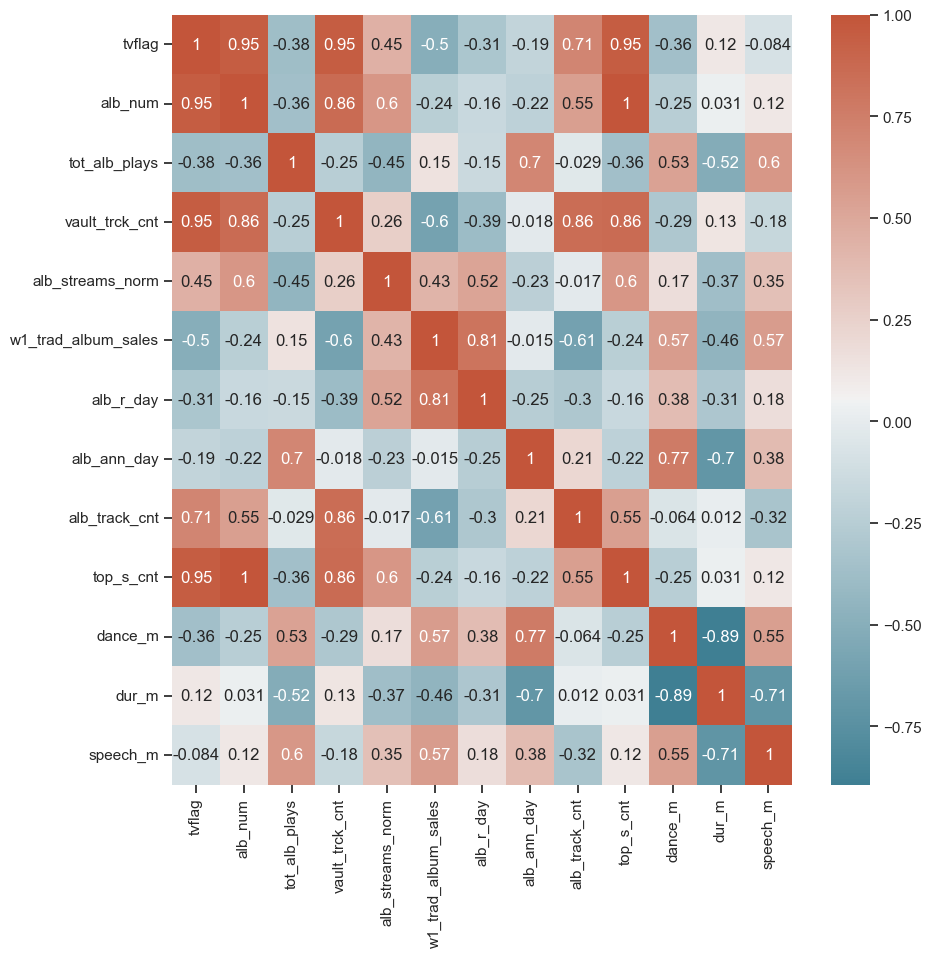

In [339]:
# Create heatmap for TV and OGs, since already subsetted

f,ax = plt.subplots(figsize=(10,10))

cmap = sns.diverging_palette(2020, 20, as_cmap=True)

heatmap_tv_matching_albs = sns.heatmap(tv_match_alb_aggs_corr.corr(), annot = True, cmap=cmap, ax = ax) 

In [340]:
# save fig

heatmap_tv_matching_albs.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'heatmap_tv_matching_albs.png'))

## Many are similar to full dataframe, but there are differences/heightened patterns

Want to explore these variables to help with Taylor's Version patterns

## tvflag and top_s_cnt 0.95  (vs. 0.71 with full df)
## tvflag and alb_track_cnt 0.71 
## tvflag and w1_trad_album_sales -0.50 (why so strongly negative?)
## tvflag and alb_streams_norm 0.45

Want to explore these variables with patterns for the whole subgroup

## vault_trck_cnt and top_song_count 0.86
This is true even with 1989TV only having two weeks to enter the Billboard top 100 due to time of analysis and data collection!

## alb_r_day and wk1_trad_album_sales 0.81 
## alb_ann_day and tot_alb_plays 0.7
*These final two are important because they are strong relationships between a song characteristic and album sales figures that could help with predictive analysis


## Scatterplots

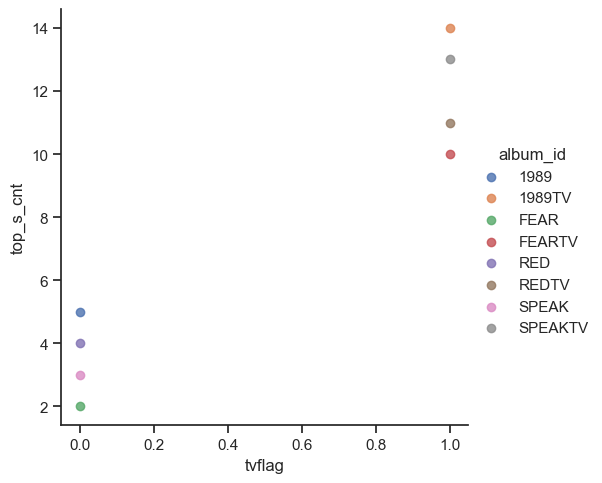

In [341]:
# Create scatterplot for tvflag and top_s_cnt 0.95 
scatter_tv_matching_albs_tv_top_s_cnt_album_hue = sns.lmplot(x = 'tvflag', y = 'top_s_cnt', hue ='album_id', data = tv_matching_alb_aggs)

Observation: The tv vs. original versions have the same order rankings as their pair for top song count. This could be very handy for making predictions.

In [342]:
# Save figure

scatter_tv_matching_albs_tv_top_s_cnt_album_hue.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_tv_matching_albs_tv_top_s_cnt_album_hue.png'))

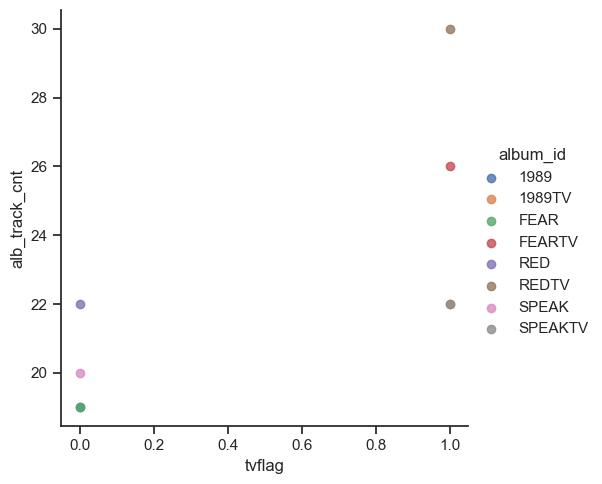

In [343]:
# Create scatterplot for tvflag and alb_track_cnt 0.71 

scatter_tv_matching_albs_tv_alb_track_cnt = sns.lmplot(x = 'tvflag', y = 'alb_track_cnt', hue='album_id', data = tv_matching_alb_aggs)

In [344]:
# Save figure

scatter_tv_matching_albs_tv_alb_track_cnt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_tv_matching_albs_tv_alb_track_cnt.png'))

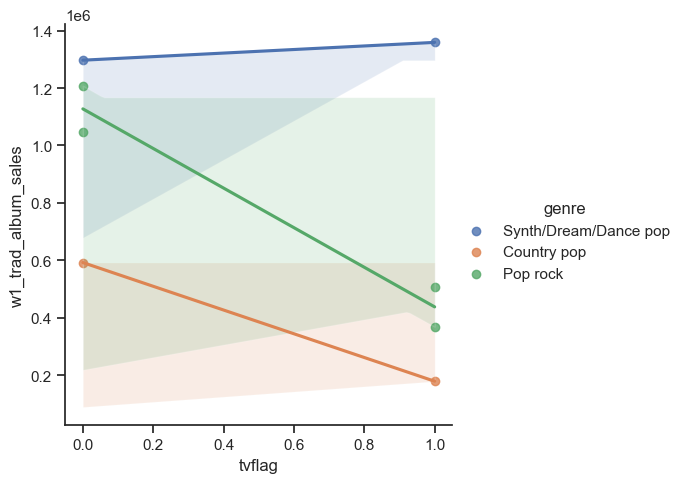

In [345]:
# Create scatterplot for tvflag and w1_trad_album_sales -0.50 (why so strongly negative)

scatter_tv_matching_albs_tv_album_sales_genres = sns.lmplot(x = 'tvflag', y = 'w1_trad_album_sales', hue='genre', data = tv_matching_alb_aggs)

## Observations: 
FEARTV drives down the wk1_trad_album_sales drastically. 1989TV is a major outlier for high album sales. Similar to the other measures, the albums are in order (1989, RED, SPEAK, FEAR). There are differences in genre. Country pop and pop rock genres have lower wk1 album sales vs. their counterparts, while synth/dream/dance pop albums (1989) had higher sales. Her upcoming albums are synth/dance pop and country. 

In [346]:
# Save figure

scatter_tv_matching_albs_tv_album_sales_genres.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_tv_matching_albs_tv_album_sales_genres.png'))

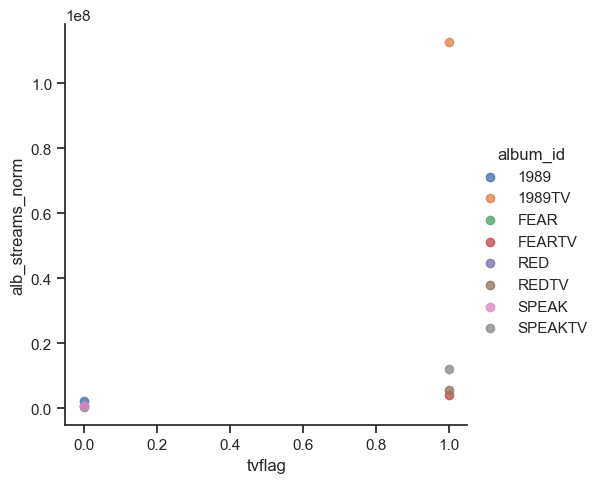

In [347]:
# Create scatterplot for tvflag and alb_streams_norm 0.45

scatter_tv_matching_albs_tv_alb_streams_norm = sns.lmplot(x = 'tvflag', y = 'alb_streams_norm', hue='album_id', data = tv_matching_alb_aggs)

## Observations: 
1989TV is a major outlier here. It appears to be creating the majority of the relationship/correlation, with being a TV and also having drastically higher normalized album streams than all other songs. Since reputation could be compared to this album, it might allude to reputation’s potential success vs. debut. The other albums show almost no relationship between tvflag and normalized album streams (flat line).


In [348]:
# Save figure

scatter_tv_matching_albs_tv_alb_streams_norm.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_tv_matching_albs_tv_alb_streams_norm.png'))

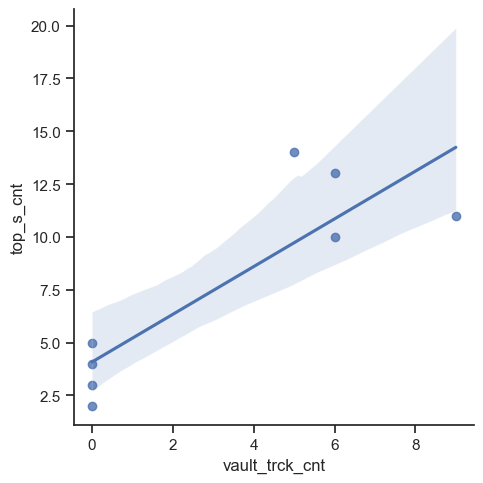

In [349]:
# Create scatterplot for vault_trck_cnt and top_song_cnt
## corr ceef 0.86
scatter_vault_trck_cnt_top_song_cnt = sns.lmplot(x = 'vault_trck_cnt', y = 'top_s_cnt', data = tv_matching_alb_aggs)

## Observations: 
This is true even with 1989TV only having two weeks to enter the Billboard top 100 due to time of analysis and data collection! Based on the plot, however, it looks like within the albums with vault tracks themselves there is less of a relationship. It’s skewed because all the originals have 0 vault tracks.

In [350]:
# Save figure

scatter_vault_trck_cnt_top_song_cnt.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_vault_trck_cnt_top_song_cnt.png'))

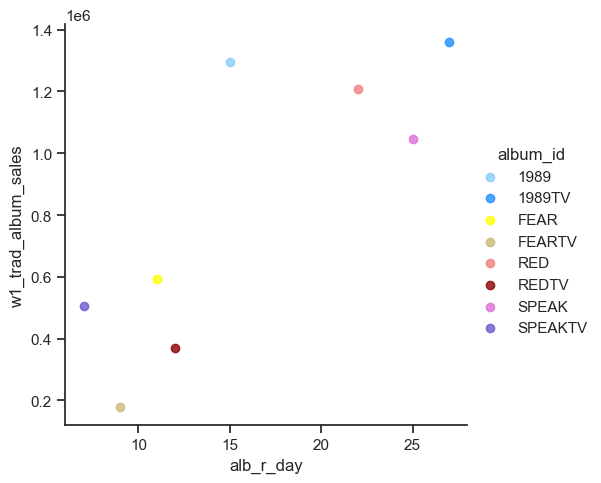

In [351]:
# Create scatterplot for alb_r_day and w1_trad_album_sales
## corr ceef 0.81
scatter_alb_r_day_wk1_alb_sales_alb_hue = sns.lmplot(x = 'alb_r_day', y = 'w1_trad_album_sales', hue='album_id', palette=['lightskyblue','dodgerblue', 'yellow', 'y', 'lightcoral', 'darkred', 'orchid', 'slateblue'] , data = tv_matching_alb_aggs)

In [352]:
# Save figure

scatter_alb_r_day_wk1_alb_sales_alb_hue.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_alb_r_day_wk1_alb_sales_alb_hue.png'))

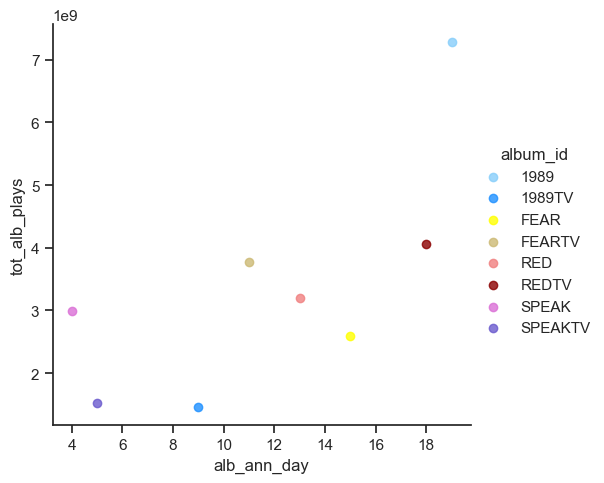

In [353]:
# Create scatterplot for alb_ann_day and tot_alb_plays
## corr ceef 0.7
scatter_alb_ann_day_tot_alb_plays = sns.lmplot(x = 'alb_ann_day', y = 'tot_alb_plays', hue='album_id', palette=['lightskyblue','dodgerblue', 'yellow', 'y', 'lightcoral', 'darkred', 'orchid', 'slateblue'], data = tv_matching_alb_aggs)

## Observations:
This is important because there is a lot of hype around when Taylor announces her albums. 

1989 (original_ is a major) outlier. There are trends based on TV having an earlier announcement day and less total album plays. The TV versions have had less time to accumulate total album plays, so since there is a pattern based on Taylor’s version or not and therefore release date/album_num, this isn’t a relationship worth exploring further since there are multiple factors.

There could be relationships between announcement day and release day, to be explored in time series analysis.

In [354]:
# Save figure

scatter_alb_ann_day_tot_alb_plays.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_alb_ann_day_tot_alb_plays.png'))

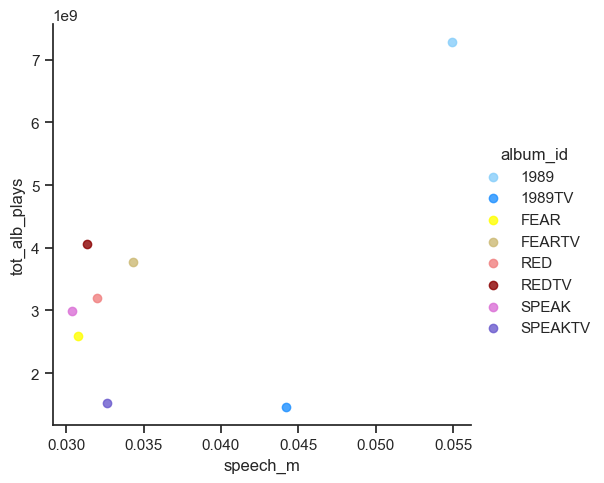

In [355]:
# Create scatterplot for tot_alb_plays and speech_m
## corr ceef 0.6
scatter_tot_alb_plays_speech_m = sns.lmplot(x = 'speech_m', y = 'tot_alb_plays', hue='album_id', palette=['lightskyblue','dodgerblue', 'yellow', 'y', 'lightcoral', 'darkred', 'orchid', 'slateblue'], data = tv_matching_alb_aggs)

## Observations: 
This is likely due to outliers (1989 and 1989TV). Will not focus on it. 

In [356]:
# Save figure

scatter_tot_alb_plays_speech_m.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_tot_alb_plays_speech_m.png'))

## Pairplots

Variables of focus:
## tv_flag and top_s_cnt 0.95
## tvflag and alb_track_cnt
## alb_r_day and w1_trad_album_sales 0.81
maybe
## tv_flag and alb_streams_norm 0.45 w/major 1989TV outlier

In [357]:
tv_matching_alb_aggs_sub = tv_matching_alb_aggs[['tvflag', 'top_s_cnt', 'alb_track_cnt', 'alb_r_day', 'w1_trad_album_sales', 'alb_streams_norm']]

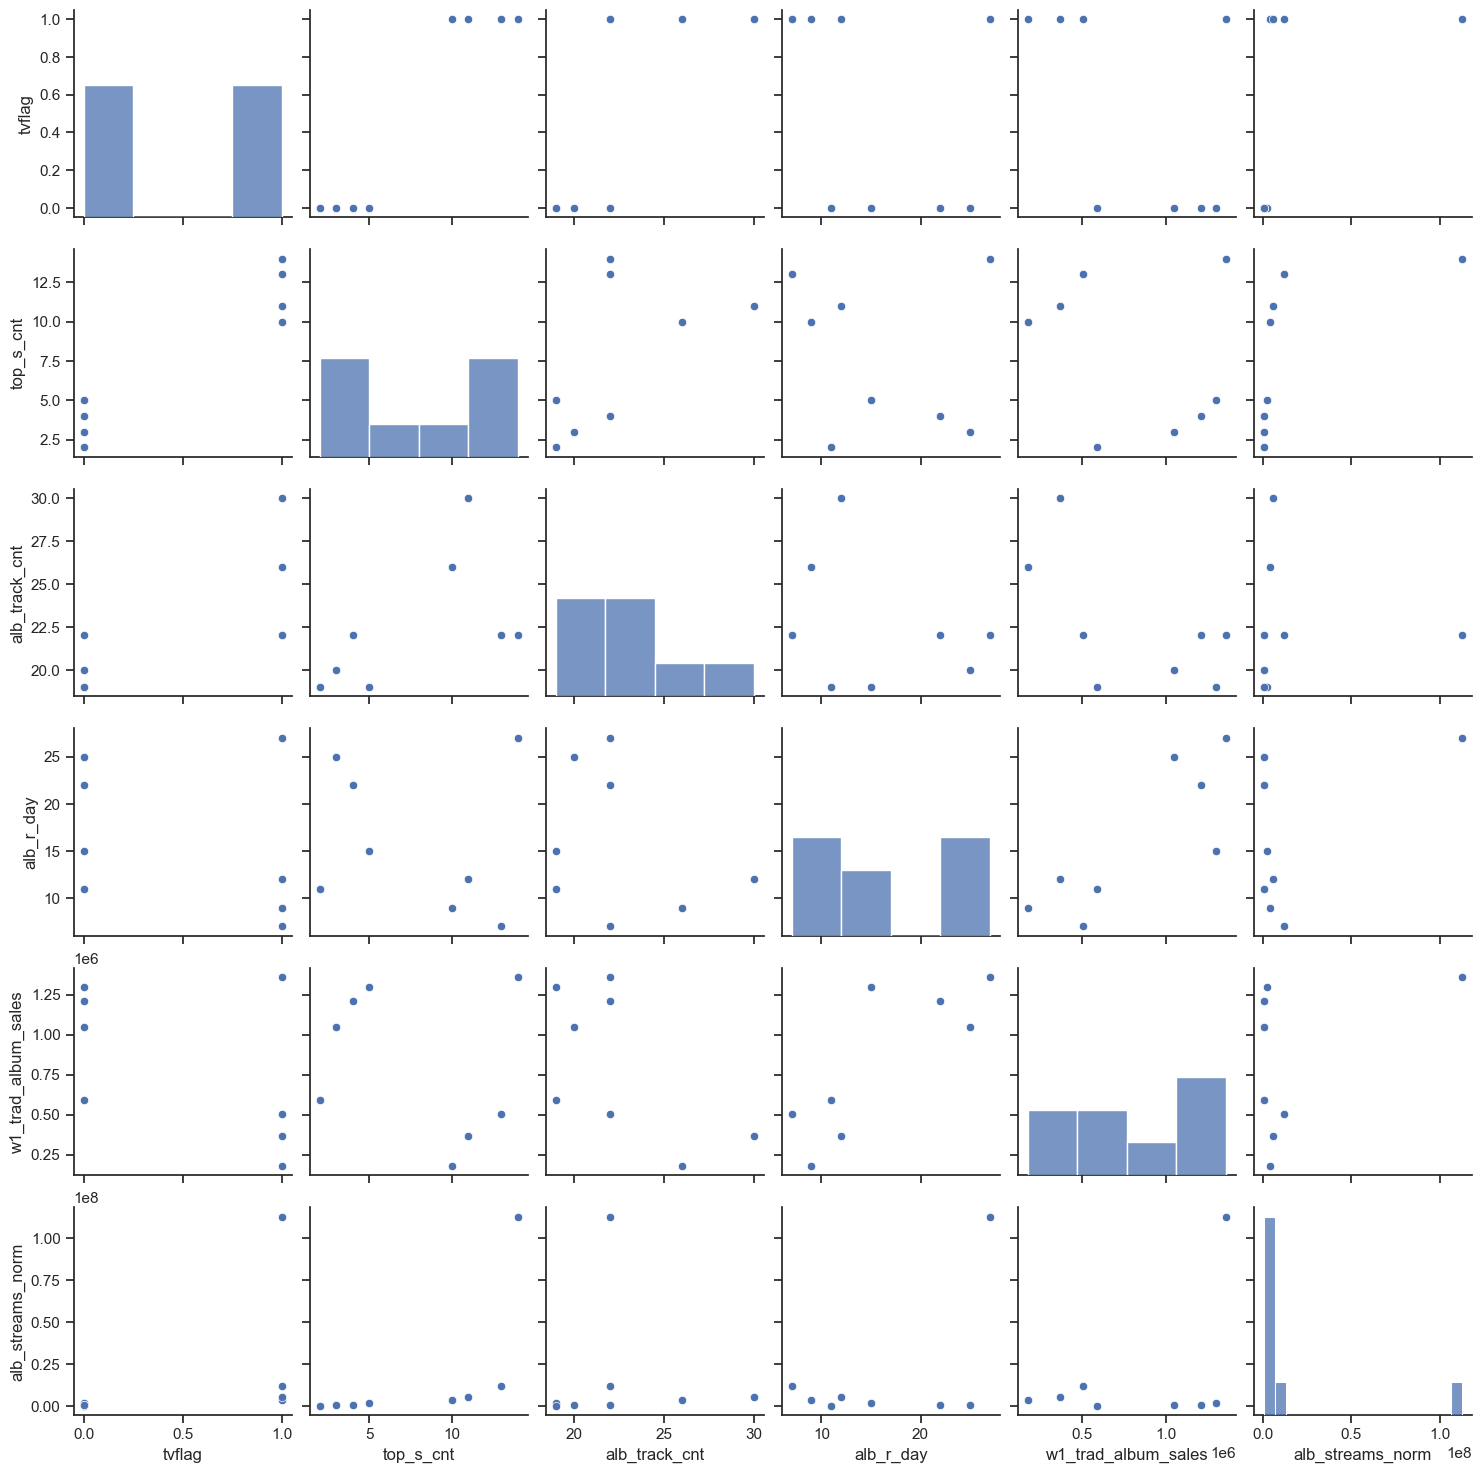

In [358]:
# Create a pairplot of final taylor's versions vs. originals variables to explore

pairplot_tv_matching_alb_aggs = sns.pairplot(tv_matching_alb_aggs_sub)

In [359]:
# Save figure

pairplot_tv_matching_alb_aggs.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'pairplot_tv_matching_alb_aggs.png'))

## Categorical plots

Variables to focus on (because both numeric and potential predictive measures)

## alb_r_day and w1_trad_album_sales 0.81

<Axes: xlabel='alb_r_day', ylabel='Count'>

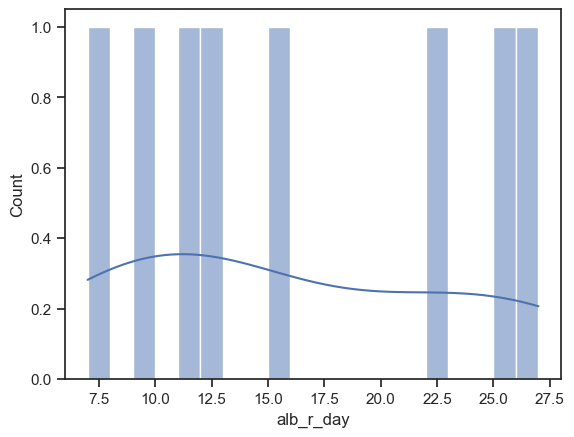

In [360]:
# Create histogram of album release day to see distribution

sns.histplot(tv_matching_alb_aggs['alb_r_day'],bins = 20, kde = True)

In [361]:
tv_matching_alb_aggs['alb_r_day'].value_counts(dropna=False)

alb_r_day
15.0    1
27.0    1
11.0    1
9.0     1
22.0    1
12.0    1
25.0    1
7.0     1
Name: count, dtype: int64

In [362]:
# Create value groupings for release day

tv_matching_alb_aggs.loc[tv_matching_alb_aggs['alb_r_day'] < 10, 'release_group'] = 'early release'

C:\Users\leobs\AppData\Local\Temp\ipykernel_62908\2448446811.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'early release' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tv_matching_alb_aggs.loc[tv_matching_alb_aggs['alb_r_day'] < 10, 'release_group'] = 'early release'


In [363]:
# Create value groupings for release day

tv_matching_alb_aggs.loc[(tv_matching_alb_aggs['alb_r_day'] >= 10) & (tv_matching_alb_aggs['alb_r_day'] < 20), 'release_group'] = 'middle release'

In [364]:
# Create value groupings for release day

tv_matching_alb_aggs.loc[tv_matching_alb_aggs['alb_r_day'] >=20, 'release_group'] = 'late release'

In [365]:
tv_matching_alb_aggs['release_group'].value_counts(dropna=False)

release_group
middle release    3
late release      3
early release     2
Name: count, dtype: int64

In [366]:
tv_matching_alb_aggs.columns

Index(['alb_num', 'album_id', 'tvflag', 'tot_alb_plays', 'alb_streams_norm',
       'w1_trad_album_sales', 'alb_r_day', 'alb_ann_day', 'alb_track_cnt',
       'genre', 'vault_trck_cnt', 'top_s_cnt', 'dance_m', 'speech_m', 'dur_m',
       'release_group'],
      dtype='object')

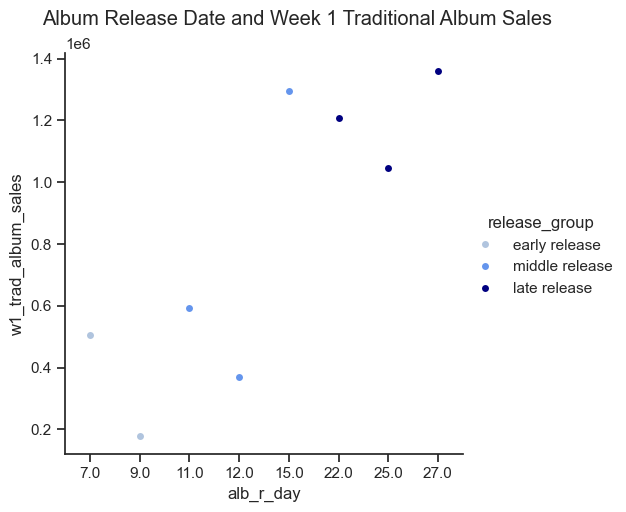

In [367]:
# Create catplot of album release day and week one sales, with release group as hue

cat_plot_alb_r_day_wk1_sales_release_group = sns.catplot(x='alb_r_day', y='w1_trad_album_sales', palette=['lightsteelblue', 'cornflowerblue', 'navy'], hue='release_group', data=tv_matching_alb_aggs)

cat_plot_alb_r_day_wk1_sales_release_group.fig.suptitle("Album Release Date and Week 1 Traditional Album Sales", y=1.02) 

plt.show()

## This is important because it’s the strong relationship between a song characteristic and album sales figures.
In the scatterplot, there is a clear relationship across albums. There are two main clusters that connect to both variables, with a wide gap between the data points. An interesting factor is that the clusters of high and low sales and album release days are not divided just by TV or not. For example, RED made higher sales than REDTV. The highest sales are clearly released towards the end of the month, in the 20s. 

In [368]:
# Save figure

cat_plot_alb_r_day_wk1_sales_release_group.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'cat_plot_alb_r_day_wk1_sales_release_group.png'))

## Overall observations from the tv_matching_albs_aggs dataframe
A key note is the relatively small sample size, since there are only 8 albums within this subgroup. That still makes up 3/4 of the album data we have. 

There are some unique patterns when I isolated only the albums included within the re-recording process in addition to highlighting the trends that apply to the overall dataframe. 

## For albums in the re-recording process:
-The album release day and week 1 traditional album sales is the strongest relationship (0.81), which is spread for both OG and TV groups.


## For Taylor’s Version Albums Specifically (as compared to their originals):
-Song characteristics such as median album speechiness and danceability proved to have much weaker relationships for this subgroup than for all of her albums combined.

-There are major outliers within the re-recording process, especially for album sales. Genres have a relationship, with country being less successful than her pop albums. 

-Taylor’s versions have a high positive correlation with both track count (0.7) and top song count (0.95). The top song count is particularly neat since TV versions have had less time to make the Billboard Hot 100, especially the highly successful 1989TV album. 

Any relationship unique to this grouping should be the used to generalize and make predictions about any future albums for re-release, for example Debut and reputation. However, her supposed upcoming album “Karma” is an original and should be compared to the overall dataframe. 


# 12. Review questions and form hypotheses

# Original Questions and Insights from Relationship Analysis

Addressing Original Questions:
I analyzed many relationships across songs, albums, success measures, and google search information. Here is a summary based on my original questions.


## 1. What is the most reliable measure of album success? Are different measures related? (album sales, streams, Billboard chart data, etc.) 
The measures I explored for album success including google search scores, week one traditional album sales, total Spotify streams (Nov 9th), normalized total Spotify streams, total album streams (as of Nov 9th 2023), normalized total album streams, Spotify’s “popularity index” score, whether a song made the Billboard Hot 100, how many songs from an album made the Billboard Hot 100 (total and normalized), and the number of times an album appeared on the Billboard top 200 (total and normalized). Any normalized measures means I took the total and divided it by the days since that album/song was released to account for any time factors, especially since streams and Billboard charts have time components. 

I chose to not highlight the Spotify popularity index score because it has too many factors and lacks transparency. For example, popularity index takes how recently a song was played and Billboard data into consideration, so comparing popularity index to measures it includes isn’t precise or reliable.

Each measure of success show their own patterns. There are many variations between measures, showing that different factors influence the type of success measure differently. 1989TV is a major outlier for normalized Spotify streams and album success in general.

I isolated albums specifically involved in the re-recording process, which showed stronger relationships for success measures than all the albums. Specifically:
alb_r_day and wk1_trad_album_sales 0.81
tv_flag and top_s_cnt 0.95 (vs. 71 full df)


The strongest relationship between success measures across all albums are:
tv_flag and top_song_count 0.71
top album count normalized and total album plays 0.64
states’ google search scores and week 1 album sales 0.39
streams normalized and top album count -.32 (w/major outliers)
total song streams and song spotify popularity index 0.28
states google search scores and album streams normalized -.25
total song streams and top album count 0.25
total song streams and top song count 0.27
total song streams and whether it’s a top billboard song 0.23
week 1 album sales and spotify song streams (normalized) 0.21
total streams and week 1 sales (0.15)

1989TV is the major outlier for us_search_avg and streams_normal are from Taylor’s Versions. When create a subset to remove 1989TV, there is a -.26 (vs. -.14) and -.2 wk1_sales (-0.049) and streams_n vs. wk1_sales (0.37)

For the top songs specifically (71 based on streams and charts):
week 1 sales and top song count 0.42 (vs 0.23 for all songs)

## 2. Are there regional differences across states in album preference and popularity across time? 
The United States and worldwide google search trends are very similar, while there appear to be regional difference across states in the U.S. The global search average and U.S. search average had a strong positive correlation (0.93)

Album sales was the measure with the strongest correlations to google search scores (compared to streams)
wk1 alb sales and alb_st_gsearch_avg 0.6
wk1 album sales and st_group_alb_search_avg.45

The st_group_alb_search_avg can be used to show state preferences and changes across albums/time. It represents each state’s average google search score across all time periods from each album. There are regional differences across states in average google search score. 

Breakdown based on states:
Top 3 Highest Google Scores: Rhode Island, Utah, Massachusetts, District of Columbia, and New Hampshire

Bottom 5 Lowest Google Scores: Mississippi, New Mexico, Florida, Nevada, Hawaii


Original albums/versions have a more linear correlation to week 1 album sales and an albums’ state google search average than Taylor’s Versions. Taylor’s Versions are outliers to the correlation between these variables, while the main original version outlier is Debut. 


## 3.Is there a relationship between which states have the highest google search score and where Taylor Swift chose to tour for the 2023-2024 Era’s tour?
I’m choosing not to focus on this question for the relationship portion of the analysis. Might explore during spatial analysis.

## 4.Are there patterns in album announcements and release dates that could help predict future release dates?
There are patterns in album success and album announcement day for all albums: 
total album plays and album announcement day 0.60
total song streams and album announcement day 0.29

For albums in the re-recording process, the album release day and 
week 1 traditional album sales is the strongest relationship(0.81).
I can explore this question further (especially the time between announcements and release days across albums) in time series analysis.

## 5.What song characteristics make songs and albums most popular on Billboard charts, Week 1 traditional album sales, and Spotify streams? *edited question to include all measures and merged with redundant additional question from original report
Overall, there are not many correlations within the sound characteristics of Taylor’s songs. There are some differences in between songs and their success measures. There are differences and similarities between success measures and song/album attributes. 

Week 1 album sales: Week one sales shares speechiness and danceability with total album plays from Spotify.
week 1 album sales and album speechiness median 0.55
week 1 album sales and song speech 0.75
week 1 album sales and album danceability median 0.52
(median more significant than a song’s danceability (0.29), and the song danceability correlation has clusters)
 week 1 album sales and release day 0.35
 week 1 album sales and acoustics -0.31

When I isolated only the albums relevant to the re-release process (originals and their matching Taylor’s Versions), alb_r_day had a strong relationship with 
wk1_trad_album_sales (0.81) .


Spotify Streams: There are major outliers (high streams) for total song streams. There are not particularly strong correlations between sound characteristics of a song and Spotify Streams. Track is the most significant relationship. Track number is also a factor in Billboard Hot 100 song.
track number and Spotify streams -0.3
The “high streams” group for total spotify streams leans towards higher total streams and has no tracks above 22, with most under track 10. The other two streams groups have tracks across album tracks. REDTV has high 

Within the top song dataframe: 
tot_streams and days 0.87 (vs. -0.04 for all songs)
This alludes to the idea that overt time, Taylor’s top songs have higher stream counts than prior years. This potentially speaks to a widening fan base. On the other hand, songs that have a middle and low stream count do not show a pattern in the impact of streams across time. This is a key relationship to focus on.
   
For album streams: Album aggregates of album song attributes show some strong correlations. They share speechiness and danceability relationships with album sales. 
total album plays and album speechiness median 0.75
total album plays and danceability median 0.74 
total album plays and album announcement day 0.64
total album plays and album number 0.63
The album number having a strong relationship within album  streams is significant because track number shows a preference for songs clustered within albums and potential for streaming popularity to be impacted by Taylor’s music evolution (track number is tied to years, genre, and album characteristics). 
When I isolated only the albums relevant to the re-release process (originals and their matching Taylor’s Versions), another strong relationship appeared:
alb_ann_day and tot_alb_plays 0.7 (vs. 0.6 for full df w/all albums)


Billboard Hot 100 Charts (song):
 Bill Hot 100 top song count and album number 1.0 (100%!)
 Bill Hot 100 top song count and Taylor’s Ver flag 0.71
Billboard Hot 100 top song and song track -.3
Album Billboard Hot 100 song count and total song streams   
  -.86 (why? still unsure)	
Songs that make the Billboard Hot 100 have a higher total streams count over time than songs that do not. 
tot_streams (song) and days 0.87 for top songs
tot_streams (song) and days -0.05 for all songs
When I isolated only the albums relevant to the re-release process (originals and their matching Taylor’s Versions), another strong relationship appeared:
tvflag and top_s_cnt 0.95

Billboard Top 200 Charts (album): 
 album number and Billboard top album (normalized) 0.63
 alb_num and top_alb_count -.78 (without being normalized, time is
a factor)
Normalized spotify streams is highly skewed right (more so than total spotify streams. This means that there is a more significant outlier (likely 1989).

## 6.How do Taylor’s original albums compare to her re-releases in terms of streaming popularity, album sales, and regional preferences?

54% of all songs are Taylor’s Versions, but 69% of top streaming songs are Taylor’s Versions.

I created a subset dataframe to compare only albums that are a part of the re-release process. Using the whole dataframe with all albums isn’t accurate for true comparisons. 
FEAR AND FEARTV, SPEAK AND SPEAKTV, RED and REDTV, 1989 AND 1989TV

There are some unique patterns when I isolated only the albums included within the re-recording process in addition to highlighting the trends that apply to the overall dataframe. 

For albums in the re-recording process:
alb_r_day and wk1_trad_album_sales 0.81
The album release day and week 1 traditional album sales is the strongest relationship (0.81), which is spread for both OG and TV groups. This is important because it’s the strongest relationship between a song characteristic and album sales figures. In the scatterplot, there is a clear relationship across albums. An interesting factor is that the clusters of high and low sales and album release days are not divided just by TV or not. For example, RED made higher sales than REDTV. The highest sales are clearly released towards the end of the month, in the 20s. 


For Taylor’s Version Albums Specifically (as compared to their originals):
tv_flag and top_s_cnt 0.95 (vs. 71 full df)
tv_flag and alb_track_cnt 0.71 (vs 0.73 full df)

Song characteristics such as median album speechiness and danceability proved to have much weaker relationships for this subgroup than for all of her albums combined.

There are major outliers within the re-recording process, especially for album sales. Genres have a relationship, with country being less successful than her pop albums. 
Taylor’s versions have a high positive correlation with both track count (0.7) and top song count (0.95). The top song count is particularly neat since TV versions have had less time to make the Billboard Hot 100, especially the highly successful 1989TV album. The tv vs. original versions have the same order rankings as their pair for top song count. This could be very handy for making predictions.

Vault tracks a feature of the “Taylor’s Version” albums. These are tracks that are added as new tracks compared to the original versions, and are placed at the end. Because of the novelty and hype around TV versions, they have a pattern of becoming hits even though they are at the end of the albums. I predict that original versions, therefore, have a negative correlation between track count and top song, while TV versions could either have a positive correlation or two clusters of very low vs. high track numbers and top songs.

Any relationship unique to this grouping should be the used to generalize and make predictions about any future albums for re-release, for example Debut and reputation. However, her supposed upcoming album “Karma” is an original and should be compared to the overall dataframe. 

## 7. Is time or popularity the greatest predictor of album and song success? 
In general, time is less of a predictor for album and song success than how much fans like a particular song or album (for other reasons). This was an unexpected finding. An assumption could be that days since an album/song was released and total Spotify streams would be strong positive correlations, but they are not.

days since release and total album plays 0.03

There are interesting patterns for:
days since release and total streams -.04

There are clear clusters for total Spotify streams. Songs in the highest streams group continue to increase total streams over time, while songs’ in the medium and low stream groups total song streams stay the same across time. 

Genre also appears to outweigh time as a factor for streams. Pop albums are increasing in total streams over time, alternative albums are increasing slightly with time, and country/rock albums are decreasing in popularity over time. 

However, Billboard Top 200 album counts appeared to be tied to time.
days since release and top album count normalized -.77

Any measure with a relationship to album number could have some time related factor, since the album numbers correspond to time passing. Specifics on years will be a part of time series analysis.


## 8.Are there other factors tied to Swiftie “easter eggs” that contribute to a song and/or album’s success?
At this point, this question lies outside the scope of the exploratory analysis.

## 9.How can we predict the success, popularity, timing, and other outcomes of the “reputation” and “Debut” re-recording “Taylor’s Versions” based on the data we have for her prior re-recordings?
There are some unique patterns when I isolated only the albums included within the re-recording process in addition to highlighting the trends that apply to the overall dataframe. 

I found genre clusters for popularity across time. Based on this, genre could impact re-recording success (reputation is pop, Debut is country). Pop albums also grow in disparity from highest streaming songs, so Debut(Taylor’s version) re-record could have less difference between it’s original as compared to the reputation (Taylor’s Version) vs. original reputation. 

With trends in album number, whichever album is released last could have more Billboard Top 200 album chart counts.

All of the factors listed from question 6, which addresses differences between originals and Taylor’s versions, could be used to make predictions about the upcoming albums. 

For Taylor’s Versions:
tv_flag and top_s_cnt 0.95 (vs. 71 full df)
tv_flag and alb_track_cnt 0.71 (vs 0.73 full df) 
tv_flag and alb_streams_normal 0.45 (vs. 0.47 full df)

For all re-release process albums: 
alb_r_day and wk1_trad_album_sales 0.81
This is spread across both OG and TV groups.

However, her supposed upcoming album “Karma” is an original and should be compared to the overall dataframe. 

## Potential Hypotheses
Potential Hypotheses for Taylor Swift Analysis

•As the album number increases, the number of total of songs from that album that make the Billboard Hot 100 song chart will also increase
    -Null hypothesis: As the album number increases, the total number of songs
    that make the Billboard Hot 100 song chart from that album will stay the
    same or decrease.

•For any album in the re-release process (originals, current Taylor’s Versions, and future Taylor’s versions): as the album release day is later in the month/increases in day, the week one traditional album sales will also increase. (alb_r_day and wk1_trad_album_sales 0.81)
    -Null hypothesis: As the album release day is later in the month/increases 
    in day, the week one traditional album sales will decrease or stay the 
    same. 

•The higher the day in the month an album is announced, the more total album streams on Spotify the album will have.
    -Null hypothesis: A higher day of month for the album announcement day will
    mean a decrease or no change in total album streams on Spotify.

•Album’s that have “Taylor’s Versions’ will have a higher song count of songs that make the Billboard Hot 100 chart than albums that are not “Taylor’s Versions” (tvflag and top_s_cnt 0.95)
    -Null hypothesis: Albums that are “Taylor’s Versions” will have an equal or
    less than number of songs on the Billboard Hot 100 chart compared to albums
    that are not “Taylor’s Versions”.

•Album’s that have “Taylor’s Versions’ will have a higher album track count than albums that are original versions and/or new albums. (tv_flag and alb_track_cnt 0.71 (vs 0.73 full df))
    -Null hypothesis: Album’s that have “Taylor’s Versions’ will have a an
    equal or lesser album track count than albums that are not “Taylor’s
    Versions”.

•Songs that make the Billboard Hot 100 chart will have a higher total Spotify streams count over time than songs that do not. (tot_streams (song) and days 0.87 for top songs)
    oNull hypothesis: Songs that make the Billboard Hot 100 chart will have
     an equal or less number of total Spotify streams count over time than
     songs that do not make the Billboard Hot 100 chart. 


•Songs that fit within highest streams group will continue to increase total Spotify streams over time.
    -Null hypothesis: Songs that fit within highest streams group will maintain
    or decrease total Spotify streams over time.

•A song’s speechiness score increase, so will the week 1 album sales for the songs corresponding album
    -total album plays and album speechiness median 0.75
    oNull hypothesis:

•If google trends show higher average state google search scores, the week 1 album sales for that album will also increase. 
    -wk1 alb sales and alb_st_gsearch_avg 0.6
    oNull hypothesis: As an album’s average state google search score
    increases, its week 1 album sales will stay the same or decrease.

•States that have higher average album search scores attached to periods for country albums from 2006-2023 will have a lower average album search score for periods for the Midnights, 1989TV and reputation albums as compared to states with lower search scores for country albums from the same periods. 
    -*Need to add specific metrics vs. just “higher” 
    -Null hypothesis: States that have higher average album search scores
    attached to periods for country albums from 2006-2023 will have a higher or
    equal average album search score for periods for the Midnights, 1989TV and
    reputation albums as compared to states with lower search scores for
    country albums from the same periods. 


•For reputation/Debut albums specifically:
oThe reputation (Taylor’s Version) re-release album will have higher total album streams on Spotify than the Debut (Taylor’s Version)album, as well as a higher value in the difference between week 1 sales between their Taylor’s Versions vs. original version week 1 sales. 
    -Null hypothesis: The reputation(Taylor’s Version) album will have equal or
    lower album streams on Spotify than the Debut (Taylor’s Version) album
    and/or a as a lower or equal value in the difference between week 1 sales
    for their Taylor’s Versions vs. original version week 1 sales.

## Further Analysis

•Break down google search dataframe to isolate subset of original albums with their matching Taylor’s Versions, specifically for state and album averages, to predict reputation and Debut album release and performance measures.

•Do state’s google search averages change across time? Does time/album/genre affect which states have the highest search scores? 

•Pair the exact original vs. TV albums to compare figures and make predictions for reputation and Debut (vs. general across all albums in the process)

•Explore measures against other artists (Billboard Hits, monthly spotify listeners, etc.)

•Add vault track variable to song_stream_info dataframe (not just album aggregates dataframe).

•Add album group to song_stream_info and album_aggs dataframe (“originally owned”, “original with re-record”, “original to be re-recorded”, “Taylor’s Version)

•There could be relationships between announcement day and release day, to be explored in time series analysis. These relationships are important to Swifties and contribute to many fan theories. 

-Add any specific numerical values to hypotheses to make them more specific.



# 13. Data Exports

In [369]:
# Export gsearch_st with new aggs for state average search score

gsearch_st.to_csv(os.path.join(path, '02 Manipulated Data', 'gsearch_st_aggs_updated.csv'))

In [370]:
# Export state and album groups for avg search score across albums/times(shows state difs)

states_search_across_albums.to_csv(os.path.join(path, '02 Manipulated Data', 'states_search_across_albums.csv'))

In [371]:
#Export song_stream_alb df with new flags 

song_stream_alb.to_csv(os.path.join(path, '02 Manipulated Data', 'song_stream_alb_final.csv'))

In [372]:
#Export top streaming songs df with new flags 

top_stream_songs.to_csv(os.path.join(path, '02 Manipulated Data', 'top_stream_songs_final.csv'))

In [373]:
# Export aggregated albums dataframe

song_stream_alb.to_csv(os.path.join(path,path, '02 Manipulated Data',  'song_stream_alb_final.csv'))

In [374]:
# Export taylor's version with matching originals album aggs dataframe

tv_matching_alb_aggs.to_csv(os.path.join(path,path, '02 Manipulated Data',  'tv_matching_alb_aggs.csv'))